#Introduction

Netflix was founded in 1997 by Reed Hastings and Marc Randolph. The company started as a DVD-rental service, but it quickly transitioned to streaming in 2007. Netflix has grown rapidly over the past few decades, and it is now one of the most popular streaming services in the world. It is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

A brief overview of Netflix's growth over the years:

1997: Netflix is founded.
2000: Netflix introduces a subscription model for DVD rentals.
2007: Netflix launches its streaming service.
2011: Netflix surpasses Blockbuster as the leading DVD-rental company in the United States.
2013: Netflix expands to international markets.
2016: Netflix releases its first original series, House of Cards.
2019: Netflix surpasses 150 million subscribers worldwide.
2022: Netflix experiences its first decline in subscribers in the North American market.
As of July 2023, Netflix has a market capitalization of $196.44 billion dollar. This makes it the world's 56th most valuable company by market cap.

#Buisness Problem (EDA):
This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df=pd.read_csv('/content/netflix.csv')
df1=df

In [157]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [158]:
df.size

105684

In [159]:
df.shape

(8807, 12)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Here we can see the data types of the values and few of the columns have some
missing values.

In [161]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [162]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In this we have to clean lots of  the data so that we can analyze the data properly afterwards.

In [163]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [164]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [165]:
df.describe(include='object')

show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   

              country       date_added rating  duration  \
count            7976             8797   8803      8804   
unique            748             1767     17       220   
top     United States  January 1, 2020  TV-MA  1 Season   
freq             2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

#Data wrangling

Unnesting the columns (director,cast,country,listed_in)

In [166]:
unnesting=['director','cast','country','listed_in']
for col in unnesting:
  df1[col]=df1[col].str.split(',')
  df1=df1.explode(col)

In [167]:
df1.shape

(202065, 12)

In [168]:
df1.head()

show_id     type                 title         director          cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson           NaN   
1      s2  TV Show         Blood & Water              NaN    Ama Qamata   
1      s2  TV Show         Blood & Water              NaN    Ama Qamata   
1      s2  TV Show         Blood & Water              NaN    Ama Qamata   
1      s2  TV Show         Blood & Water              NaN   Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [169]:
df1.reset_index(drop=True,inplace=True)

In [170]:
df1.head()

show_id     type                 title         director          cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson           NaN   
1      s2  TV Show         Blood & Water              NaN    Ama Qamata   
2      s2  TV Show         Blood & Water              NaN    Ama Qamata   
3      s2  TV Show         Blood & Water              NaN    Ama Qamata   
4      s2  TV Show         Blood & Water              NaN   Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
2   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
3   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
4   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
2               TV Dramas  After crossing paths at a party, a Cape Town t...  
3            TV Mysteries  After crossing paths at a party, a Cape Town t...  
4  International TV Shows  After crossing paths at a party, a Cape Town t...

In [171]:
df1['type'].value_counts()

type
Movie      145917
TV Show     56148
Name: count, dtype: int64

In [172]:
df.shape

(8807, 12)

In [173]:
df

show_id     type                  title           director  \
0         s1    Movie   Dick Johnson Is Dead  [Kirsten Johnson]   
1         s2  TV Show          Blood & Water                NaN   
2         s3  TV Show              Ganglands  [Julien Leclercq]   
3         s4  TV Show  Jailbirds New Orleans                NaN   
4         s5  TV Show           Kota Factory                NaN   
...      ...      ...                    ...                ...   
8802   s8803    Movie                 Zodiac    [David Fincher]   
8803   s8804  TV Show            Zombie Dumb                NaN   
8804   s8805    Movie             Zombieland  [Ruben Fleischer]   
8805   s8806    Movie                   Zoom     [Peter Hewitt]   
8806   s8807    Movie                 Zubaan      [Mozez Singh]   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [174]:
df1['type'].nunique()

2

In [175]:
df1.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

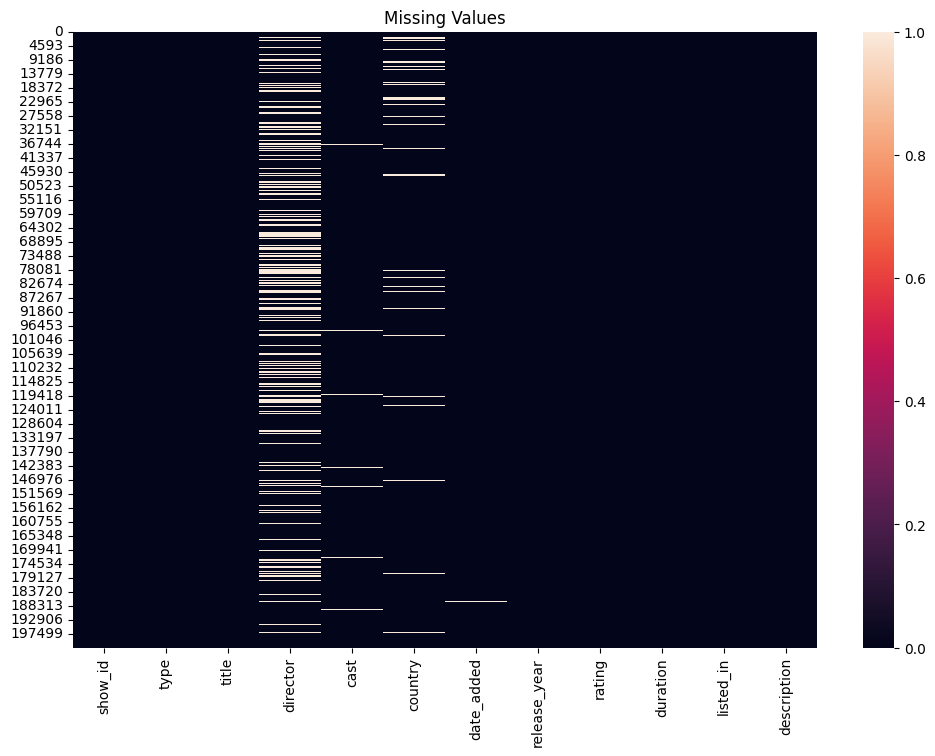

In [176]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.isnull())
plt.title('Missing Values')
plt.show()

In [177]:
df1.isnull().sum().sort_values(ascending=False)

director        50643
country         11897
cast             2149
date_added        158
rating             67
duration            3
show_id             0
type                0
title               0
release_year        0
listed_in           0
description         0
dtype: int64

In [178]:
# checking the pecentage of null values from our data

for i in df.columns:
  null_pct=round((df1[i].isna().sum()/df1.shape[0])*100,2)
  if null_pct > 0:
    print(f'null percentage of {i}  is {null_pct}%')

null percentage of director  is 25.06%
null percentage of cast  is 1.06%
null percentage of country  is 5.89%
null percentage of date_added  is 0.08%
null percentage of rating  is 0.03%


In [179]:
df1.isna().sum().sort_values(ascending=False)

director        50643
country         11897
cast             2149
date_added        158
rating             67
duration            3
show_id             0
type                0
title               0
release_year        0
listed_in           0
description         0
dtype: int64

In [180]:
df1[df1['date_added'].isna()]

show_id     type                                        title director  \
136940   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
136941   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
136942   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
136943   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
136944   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
...        ...      ...                                          ...      ...   
186965   s8183  TV Show                 The Adventures of Figaro Pho      NaN   
186966   s8183  TV Show                 The Adventures of Figaro Pho      NaN   
186967   s8183  TV Show                 The Adventures of Figaro Pho      NaN   
186968   s8183  TV Show                 The Adventures of Figaro Pho      NaN   
186969   s8183  TV Show                 The Adventures of Figaro Pho      NaN   

                          cast         country date_added  release_year  \
136940        Daniel Radcliffe  United Kingdom        NaN          2013   
136941        Daniel Radcliffe  United Kingdom        NaN          2013   
136942        Daniel Radcliffe  United Kingdom        NaN          2013   
136943                Jon Hamm  United Kingdom        NaN          2013   
136944                Jon Hamm  United Kingdom        NaN          2013   
...                        ...             ...        ...           ...   
186965        Charlotte Hamlyn       Australia        NaN          2015   
186966   Stavroula Mountzouris       Australia        NaN          2015   
186967   Stavroula Mountzouris       Australia        NaN          2015   
186968         Aletheia Burney       Australia        NaN          2015   
186969         Aletheia Burney       Australia        NaN          2015   

       rating   duration         listed_in  \
136940  TV-MA  2 Seasons  British TV Shows   
136941  TV-MA  2 Seasons       TV Comedies   
136942  TV-MA  2 Seasons         TV Dramas   
136943  TV-MA  2 Seasons  British TV Shows   
136944  TV-MA  2 Seasons       TV Comedies   
...       ...        ...               ...   
186965  TV-Y7  2 Seasons       TV Comedies   
186966  TV-Y7  2 Seasons          Kids' TV   
186967  TV-Y7  2 Seasons       TV Comedies   
186968  TV-Y7  2 Seasons          Kids' TV   
186969  TV-Y7  2 Seasons       TV Comedies   

                                              description  
136940  Set during the Russian Revolution, this comic ...  
136941  Set during the Russian Revolution, this comic ...  
136942  Set during the Russian Revolution, this comic ...  
136943  Set during the Russian Revolution, this comic ...  
136944  Set during the Russian Revolution, this comic ...  
...                                                   ...  
186965  Imagine your worst fears, then multiply them: ...  
186966  Imagine your worst fears, then multiply them: ...  
186967  Imagine your worst fears, then multiply them: ...  
186968  Imagine your worst fears, then multiply them: ...  
186969  Imagine your worst fears, then multiply them: ...  

[158 rows x 12 columns]

In [181]:
df1

show_id     type                 title         director  \
0           s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1           s2  TV Show         Blood & Water              NaN   
2           s2  TV Show         Blood & Water              NaN   
3           s2  TV Show         Blood & Water              NaN   
4           s2  TV Show         Blood & Water              NaN   
...        ...      ...                   ...              ...   
202060   s8807    Movie                Zubaan      Mozez Singh   
202061   s8807    Movie                Zubaan      Mozez Singh   
202062   s8807    Movie                Zubaan      Mozez Singh   
202063   s8807    Movie                Zubaan      Mozez Singh   
202064   s8807    Movie                Zubaan      Mozez Singh   

                          cast        country          date_added  \
0                          NaN  United States  September 25, 2021   
1                   Ama Qamata   South Africa  September 24, 2021   
2                   Ama Qamata   South Africa  September 24, 2021   
3                   Ama Qamata   South Africa  September 24, 2021   
4                  Khosi Ngema   South Africa  September 24, 2021   
...                        ...            ...                 ...   
202060          Anita Shabdish          India       March 2, 2019   
202061          Anita Shabdish          India       March 2, 2019   
202062   Chittaranjan Tripathy          India       March 2, 2019   
202063   Chittaranjan Tripathy          India       March 2, 2019   
202064   Chittaranjan Tripathy          India       March 2, 2019   

        release_year rating   duration               listed_in  \
0               2020  PG-13     90 min           Documentaries   
1               2021  TV-MA  2 Seasons  International TV Shows   
2               2021  TV-MA  2 Seasons               TV Dramas   
3               2021  TV-MA  2 Seasons            TV Mysteries   
4               2021  TV-MA  2 Seasons  International TV Shows   
...              ...    ...        ...                     ...   
202060          2015  TV-14    111 min    International Movies   
202061          2015  TV-14    111 min        Music & Musicals   
202062          2015  TV-14    111 min                  Dramas   
202063          2015  TV-14    111 min    International Movies   
202064          2015  TV-14    111 min        Music & Musicals   

                                              description  
0       As her father nears the end of his life, filmm...  
1       After crossing paths at a party, a Cape Town t...  
2       After crossing paths at a party, a Cape Town t...  
3       After crossing paths at a party, a Cape Town t...  
4       After crossing paths at a party, a Cape Town t...  
...                                                   ...  
202060  A scrappy but poor boy worms his way into a ty...  
202061  A scrappy but poor boy worms his way into a ty...  
202062  A scrappy but poor boy worms his way into a ty...  
202063  A scrappy but poor boy worms his way into a ty...  
202064  A scrappy but poor boy worms his way into a ty...  

[202065 rows x 12 columns]

In [182]:
df1['date_added']=pd.to_datetime(df1['date_added'],format='%B %d, %Y',errors='coerce')


In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       190168 non-null  object        
 6   date_added    200319 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [184]:
df1['date_added'].fillna(df1['date_added'].mode()[0],inplace=True)

<ipython-input-184-9682559bab0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['date_added'].fillna(df1['date_added'].mode()[0],inplace=True)


In [185]:
for i in df.columns:
  null_pct=round((df1[i].isna().sum()/df1.shape[0])*100,2)
  if null_pct > 0:
    print(f'null percentage of {i}  is {null_pct}%')

null percentage of director  is 25.06%
null percentage of cast  is 1.06%
null percentage of country  is 5.89%
null percentage of rating  is 0.03%


In [186]:
df1['year_added']=df1['date_added'].dt.year

In [187]:
df1

show_id     type                 title         director  \
0           s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1           s2  TV Show         Blood & Water              NaN   
2           s2  TV Show         Blood & Water              NaN   
3           s2  TV Show         Blood & Water              NaN   
4           s2  TV Show         Blood & Water              NaN   
...        ...      ...                   ...              ...   
202060   s8807    Movie                Zubaan      Mozez Singh   
202061   s8807    Movie                Zubaan      Mozez Singh   
202062   s8807    Movie                Zubaan      Mozez Singh   
202063   s8807    Movie                Zubaan      Mozez Singh   
202064   s8807    Movie                Zubaan      Mozez Singh   

                          cast        country date_added  release_year rating  \
0                          NaN  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  
0       As her father nears the end of his life, filmm...        2021  
1       After crossing paths at a party, a Cape Town t...        2021  
2       After crossing paths at a party, a Cape Town t...        2021  
3       After crossing paths at a party, a Cape Town t...        2021  
4       After crossing paths at a party, a Cape Town t...        2021  
...                                                   ...         ...  
202060  A scrappy but poor boy worms his way into a ty...        2019  
202061  A scrappy but poor boy worms his way into a ty...        2019  
202062  A scrappy but poor boy worms his way into a ty...        2019  
202063  A scrappy but poor boy worms his way into a ty...        2019  
202064  A scrappy but poor boy worms his way into a ty...        2019  

[202065 rows x 13 columns]

In [188]:
df1['month_added']=df1['date_added'].dt.month

In [189]:
df1

show_id     type                 title         director  \
0           s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1           s2  TV Show         Blood & Water              NaN   
2           s2  TV Show         Blood & Water              NaN   
3           s2  TV Show         Blood & Water              NaN   
4           s2  TV Show         Blood & Water              NaN   
...        ...      ...                   ...              ...   
202060   s8807    Movie                Zubaan      Mozez Singh   
202061   s8807    Movie                Zubaan      Mozez Singh   
202062   s8807    Movie                Zubaan      Mozez Singh   
202063   s8807    Movie                Zubaan      Mozez Singh   
202064   s8807    Movie                Zubaan      Mozez Singh   

                          cast        country date_added  release_year rating  \
0                          NaN  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[202065 rows x 14 columns]

In [190]:
df1.isna().sum().sort_values(ascending=False)

director        50643
country         11897
cast             2149
rating             67
duration            3
show_id             0
title               0
type                0
release_year        0
date_added          0
listed_in           0
description         0
year_added          0
month_added         0
dtype: int64

In [191]:
df1.dropna(subset='duration',inplace=True)

In [192]:
df1

show_id     type                 title         director  \
0           s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1           s2  TV Show         Blood & Water              NaN   
2           s2  TV Show         Blood & Water              NaN   
3           s2  TV Show         Blood & Water              NaN   
4           s2  TV Show         Blood & Water              NaN   
...        ...      ...                   ...              ...   
202060   s8807    Movie                Zubaan      Mozez Singh   
202061   s8807    Movie                Zubaan      Mozez Singh   
202062   s8807    Movie                Zubaan      Mozez Singh   
202063   s8807    Movie                Zubaan      Mozez Singh   
202064   s8807    Movie                Zubaan      Mozez Singh   

                          cast        country date_added  release_year rating  \
0                          NaN  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[202062 rows x 14 columns]

In [193]:
df1.isna().sum().sort_values(ascending=False)

director        50643
country         11897
cast             2149
rating             67
type                0
show_id             0
title               0
date_added          0
release_year        0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
dtype: int64

In [194]:
df1[df1['cast'].isna()| df1['rating'].isna()]

show_id     type                                title         director  \
0           s1    Movie                 Dick Johnson Is Dead  Kirsten Johnson   
85          s4  TV Show                Jailbirds New Orleans              NaN   
86          s4  TV Show                Jailbirds New Orleans              NaN   
353        s11  TV Show  Vendetta: Truth, Lies and The Mafia              NaN   
354        s11  TV Show  Vendetta: Truth, Lies and The Mafia              NaN   
...        ...      ...                                  ...              ...   
200779   s8757    Movie                            Woodstock    Barak Goodman   
200898   s8764    Movie      WWII: Report from the Aleutians      John Huston   
202006   s8804  TV Show                          Zombie Dumb              NaN   
202007   s8804  TV Show                          Zombie Dumb              NaN   
202008   s8804  TV Show                          Zombie Dumb              NaN   

       cast        country date_added  release_year rating   duration  \
0       NaN  United States 2021-09-25          2020  PG-13     90 min   
85      NaN            NaN 2021-09-24          2021  TV-MA   1 Season   
86      NaN            NaN 2021-09-24          2021  TV-MA   1 Season   
353     NaN            NaN 2021-09-24          2021  TV-MA   1 Season   
354     NaN            NaN 2021-09-24          2021  TV-MA   1 Season   
...     ...            ...        ...           ...    ...        ...   
200779  NaN  United States 2019-08-13          2019  TV-MA     97 min   
200898  NaN  United States 2017-03-31          1943  TV-PG     45 min   
202006  NaN            NaN 2019-07-01          2018  TV-Y7  2 Seasons   
202007  NaN            NaN 2019-07-01          2018  TV-Y7  2 Seasons   
202008  NaN            NaN 2019-07-01          2018  TV-Y7  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
85             Docuseries  Feuds, flirtations and toilet talk go down amo...   
86             Reality TV  Feuds, flirtations and toilet talk go down amo...   
353        Crime TV Shows  Sicily boasts a bold "Anti-Mafia" coalition. B...   
354            Docuseries  Sicily boasts a bold "Anti-Mafia" coalition. B...   
...                   ...                                                ...   
200779   Music & Musicals  For the 50th anniversary of the legendary Wood...   
200898      Documentaries  Filmmaker John Huston narrates this Oscar-nomi...   
202006           Kids' TV  While living alone in a spooky town, a young g...   
202007    Korean TV Shows  While living alone in a spooky town, a young g...   
202008        TV Comedies  While living alone in a spooky town, a young g...   

        year_added  month_added  
0             2021            9  
85            2021            9  
86            2021            9  
353           2021            9  
354           2021            9  
...            ...          ...  
200779        2019            8  
200898        2017            3  
202006        2019            7  
202007        2019            7  
202008        2019            7  

[2216 rows x 14 columns]

In [195]:
df1['country'].fillna('unknown_country',inplace=True)
df1['cast'].fillna('unknown_actors',inplace=True)
df1['director'].fillna('unknown_director',inplace=True)
df1['rating'].fillna('unknown',inplace=True)

<ipython-input-195-e029657c9ace>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['country'].fillna('unknown_country',inplace=True)
<ipython-input-195-e029657c9ace>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [196]:
df1.isna().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [197]:
df1

show_id     type                 title          director  \
0           s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1           s2  TV Show         Blood & Water  unknown_director   
2           s2  TV Show         Blood & Water  unknown_director   
3           s2  TV Show         Blood & Water  unknown_director   
4           s2  TV Show         Blood & Water  unknown_director   
...        ...      ...                   ...               ...   
202060   s8807    Movie                Zubaan       Mozez Singh   
202061   s8807    Movie                Zubaan       Mozez Singh   
202062   s8807    Movie                Zubaan       Mozez Singh   
202063   s8807    Movie                Zubaan       Mozez Singh   
202064   s8807    Movie                Zubaan       Mozez Singh   

                          cast        country date_added  release_year rating  \
0               unknown_actors  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[202062 rows x 14 columns]

In [198]:
df1['rating'].nunique()

15

In [199]:
df1['rating'].value_counts()

rating
TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
unknown        67
Name: count, dtype: int64

In [200]:
rvc=df1['rating'].value_counts().reset_index()

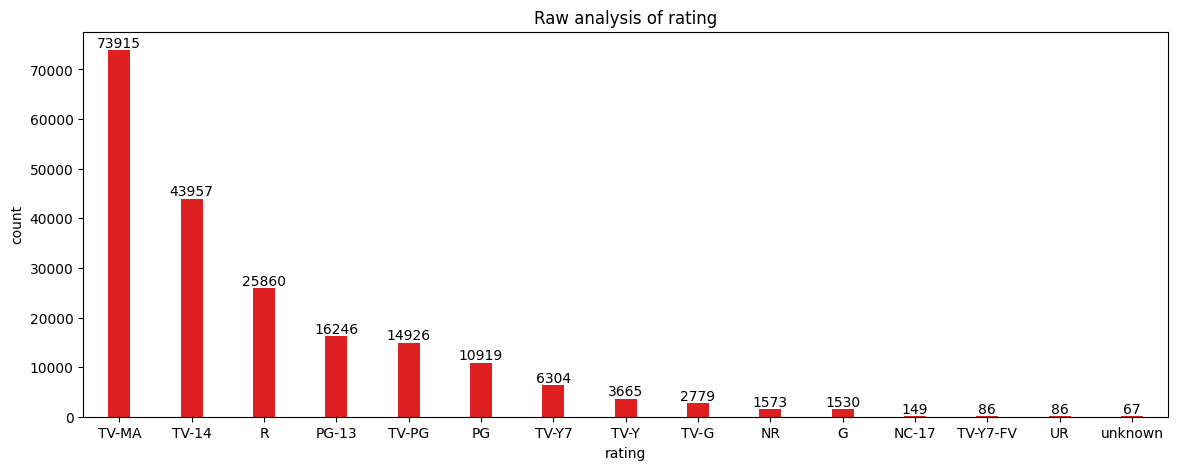

In [201]:
plt.figure(figsize=(14,5))
a=sns.barplot(x='rating',y='count',data=rvc,color='r',width=0.3)
plt.title('Raw analysis of rating')
a.bar_label(a.containers[0])
plt.show()

we will divide the data into movie and tvshows

In [202]:
df1['type'].value_counts()

type
Movie      145914
TV Show     56148
Name: count, dtype: int64

In [203]:
movies_data=df1[df1['type']=='Movie']
tvshows_data=df1[df1['type']=='TV Show']

In [204]:
movies_data.shape

(145914, 14)

In [205]:
tvshows_data.shape

(56148, 14)

In [206]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating duration                 listed_in  \
0       PG-13   90 min             Documentaries   
159        PG   91 min  Children & Family Movies   
160        PG   91 min  Children & Family Movies   
161        PG   91 min  Children & Family Movies   
162        PG   91 min  Children & Family Movies   
...       ...      ...                       ...   
202060  TV-14  111 min      International Movies   
202061  TV-14  111 min          Music & Musicals   
202062  TV-14  111 min                    Dramas   
202063  TV-14  111 min      International Movies   
202064  TV-14  111 min          Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
159     Equestria's divided. But a bright-eyed hero be...        2021   
160     Equestria's divided. But a bright-eyed hero be...        2021   
161     Equestria's divided. But a bright-eyed hero be...        2021   
162     Equestria's divided. But a bright-eyed hero be...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
159               9  
160               9  
161               9  
162               9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[145914 rows x 14 columns]

In [207]:
movies_data['runtime_in_mins']=movies_data['duration'].str.split(" ").str[0]
tvshows_data['no_of _seasons']=tvshows_data['duration'].str.split(" ").str[0]

<ipython-input-207-719fc0b87946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['runtime_in_mins']=movies_data['duration'].str.split(" ").str[0]
<ipython-input-207-719fc0b87946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_data['no_of _seasons']=tvshows_data['duration'].str.split(" ").str[0]


In [208]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating duration                 listed_in  \
0       PG-13   90 min             Documentaries   
159        PG   91 min  Children & Family Movies   
160        PG   91 min  Children & Family Movies   
161        PG   91 min  Children & Family Movies   
162        PG   91 min  Children & Family Movies   
...       ...      ...                       ...   
202060  TV-14  111 min      International Movies   
202061  TV-14  111 min          Music & Musicals   
202062  TV-14  111 min                    Dramas   
202063  TV-14  111 min      International Movies   
202064  TV-14  111 min          Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
159     Equestria's divided. But a bright-eyed hero be...        2021   
160     Equestria's divided. But a bright-eyed hero be...        2021   
161     Equestria's divided. But a bright-eyed hero be...        2021   
162     Equestria's divided. But a bright-eyed hero be...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added runtime_in_mins  
0                 9              90  
159               9              91  
160               9              91  
161               9              91  
162               9              91  
...             ...             ...  
202060            3             111  
202061            3             111  
202062            3             111  
202063            3             111  
202064            3             111  

[145914 rows x 15 columns]

In [209]:
tvshows_data

show_id     type               title          director  \
1           s2  TV Show       Blood & Water  unknown_director   
2           s2  TV Show       Blood & Water  unknown_director   
3           s2  TV Show       Blood & Water  unknown_director   
4           s2  TV Show       Blood & Water  unknown_director   
5           s2  TV Show       Blood & Water  unknown_director   
...        ...      ...                 ...               ...   
201938   s8801  TV Show  Zindagi Gulzar Hai  unknown_director   
201939   s8801  TV Show  Zindagi Gulzar Hai  unknown_director   
202006   s8804  TV Show         Zombie Dumb  unknown_director   
202007   s8804  TV Show         Zombie Dumb  unknown_director   
202008   s8804  TV Show         Zombie Dumb  unknown_director   

                       cast          country date_added  release_year rating  \
1                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
2                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
3                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
4               Khosi Ngema     South Africa 2021-09-24          2021  TV-MA   
5               Khosi Ngema     South Africa 2021-09-24          2021  TV-MA   
...                     ...              ...        ...           ...    ...   
201938   Hina Khawaja Bayat         Pakistan 2016-12-15          2012  TV-PG   
201939   Hina Khawaja Bayat         Pakistan 2016-12-15          2012  TV-PG   
202006       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   
202007       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   
202008       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   

         duration               listed_in  \
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
5       2 Seasons               TV Dramas   
...           ...                     ...   
201938   1 Season       Romantic TV Shows   
201939   1 Season               TV Dramas   
202006  2 Seasons                Kids' TV   
202007  2 Seasons         Korean TV Shows   
202008  2 Seasons             TV Comedies   

                                              description  year_added  \
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
5       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
201938  Strong-willed, middle-class Kashaf and carefre...        2016   
201939  Strong-willed, middle-class Kashaf and carefre...        2016   
202006  While living alone in a spooky town, a young g...        2019   
202007  While living alone in a spooky town, a young g...        2019   
202008  While living alone in a spooky town, a young g...        2019   

        month_added no_of _seasons  
1                 9              2  
2                 9              2  
3                 9              2  
4                 9              2  
5                 9              2  
...             ...            ...  
201938           12              1  
201939           12              1  
202006            7              2  
202007            7              2  
202008            7              2  

[56148 rows x 15 columns]

In [210]:
movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)

<ipython-input-210-22bba223531d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)


In [211]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145914 entries, 0 to 202064
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   show_id          145914 non-null  object        
 1   type             145914 non-null  object        
 2   title            145914 non-null  object        
 3   director         145914 non-null  object        
 4   cast             145914 non-null  object        
 5   country          145914 non-null  object        
 6   date_added       145914 non-null  datetime64[ns]
 7   release_year     145914 non-null  int64         
 8   rating           145914 non-null  object        
 9   duration         145914 non-null  object        
 10  listed_in        145914 non-null  object        
 11  description      145914 non-null  object        
 12  year_added       145914 non-null  int32         
 13  month_added      145914 non-null  int32         
 14  runtime_in_mins  145914 n

In [212]:
tvshows_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56148 entries, 1 to 202008
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         56148 non-null  object        
 1   type            56148 non-null  object        
 2   title           56148 non-null  object        
 3   director        56148 non-null  object        
 4   cast            56148 non-null  object        
 5   country         56148 non-null  object        
 6   date_added      56148 non-null  datetime64[ns]
 7   release_year    56148 non-null  int64         
 8   rating          56148 non-null  object        
 9   duration        56148 non-null  object        
 10  listed_in       56148 non-null  object        
 11  description     56148 non-null  object        
 12  year_added      56148 non-null  int32         
 13  month_added     56148 non-null  int32         
 14  no_of _seasons  56148 non-null  object        
dtypes: dat

In [213]:
tvshows_data['no_of _seasons'] = tvshows_data['no_of _seasons'].astype(int)

<ipython-input-213-df4f5ad39a83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_data['no_of _seasons'] = tvshows_data['no_of _seasons'].astype(int)


In [214]:
tvshows_data

show_id     type               title          director  \
1           s2  TV Show       Blood & Water  unknown_director   
2           s2  TV Show       Blood & Water  unknown_director   
3           s2  TV Show       Blood & Water  unknown_director   
4           s2  TV Show       Blood & Water  unknown_director   
5           s2  TV Show       Blood & Water  unknown_director   
...        ...      ...                 ...               ...   
201938   s8801  TV Show  Zindagi Gulzar Hai  unknown_director   
201939   s8801  TV Show  Zindagi Gulzar Hai  unknown_director   
202006   s8804  TV Show         Zombie Dumb  unknown_director   
202007   s8804  TV Show         Zombie Dumb  unknown_director   
202008   s8804  TV Show         Zombie Dumb  unknown_director   

                       cast          country date_added  release_year rating  \
1                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
2                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
3                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
4               Khosi Ngema     South Africa 2021-09-24          2021  TV-MA   
5               Khosi Ngema     South Africa 2021-09-24          2021  TV-MA   
...                     ...              ...        ...           ...    ...   
201938   Hina Khawaja Bayat         Pakistan 2016-12-15          2012  TV-PG   
201939   Hina Khawaja Bayat         Pakistan 2016-12-15          2012  TV-PG   
202006       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   
202007       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   
202008       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   

         duration               listed_in  \
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
5       2 Seasons               TV Dramas   
...           ...                     ...   
201938   1 Season       Romantic TV Shows   
201939   1 Season               TV Dramas   
202006  2 Seasons                Kids' TV   
202007  2 Seasons         Korean TV Shows   
202008  2 Seasons             TV Comedies   

                                              description  year_added  \
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
5       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
201938  Strong-willed, middle-class Kashaf and carefre...        2016   
201939  Strong-willed, middle-class Kashaf and carefre...        2016   
202006  While living alone in a spooky town, a young g...        2019   
202007  While living alone in a spooky town, a young g...        2019   
202008  While living alone in a spooky town, a young g...        2019   

        month_added  no_of _seasons  
1                 9               2  
2                 9               2  
3                 9               2  
4                 9               2  
5                 9               2  
...             ...             ...  
201938           12               1  
201939           12               1  
202006            7               2  
202007            7               2  
202008            7               2  

[56148 rows x 15 columns]

In [215]:
movies_data.drop(['duration','description'],axis=1,inplace=True)
tvshows_data.drop(['duration','description'],axis=1,inplace=True)

<ipython-input-215-dd47f6b26156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data.drop(['duration','description'],axis=1,inplace=True)
<ipython-input-215-dd47f6b26156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_data.drop(['duration','description'],axis=1,inplace=True)


In [216]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating                 listed_in  year_added  month_added  \
0       PG-13             Documentaries        2021            9   
159        PG  Children & Family Movies        2021            9   
160        PG  Children & Family Movies        2021            9   
161        PG  Children & Family Movies        2021            9   
162        PG  Children & Family Movies        2021            9   
...       ...                       ...         ...          ...   
202060  TV-14      International Movies        2019            3   
202061  TV-14          Music & Musicals        2019            3   
202062  TV-14                    Dramas        2019            3   
202063  TV-14      International Movies        2019            3   
202064  TV-14          Music & Musicals        2019            3   

        runtime_in_mins  
0                    90  
159                  91  
160                  91  
161                  91  
162                  91  
...                 ...  
202060              111  
202061              111  
202062              111  
202063              111  
202064              111  

[145914 rows x 13 columns]

In [217]:
movies_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'year_added', 'month_added',
       'runtime_in_mins'],
      dtype='object')

In [218]:
tvshows_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'year_added', 'month_added',
       'no_of _seasons'],
      dtype='object')

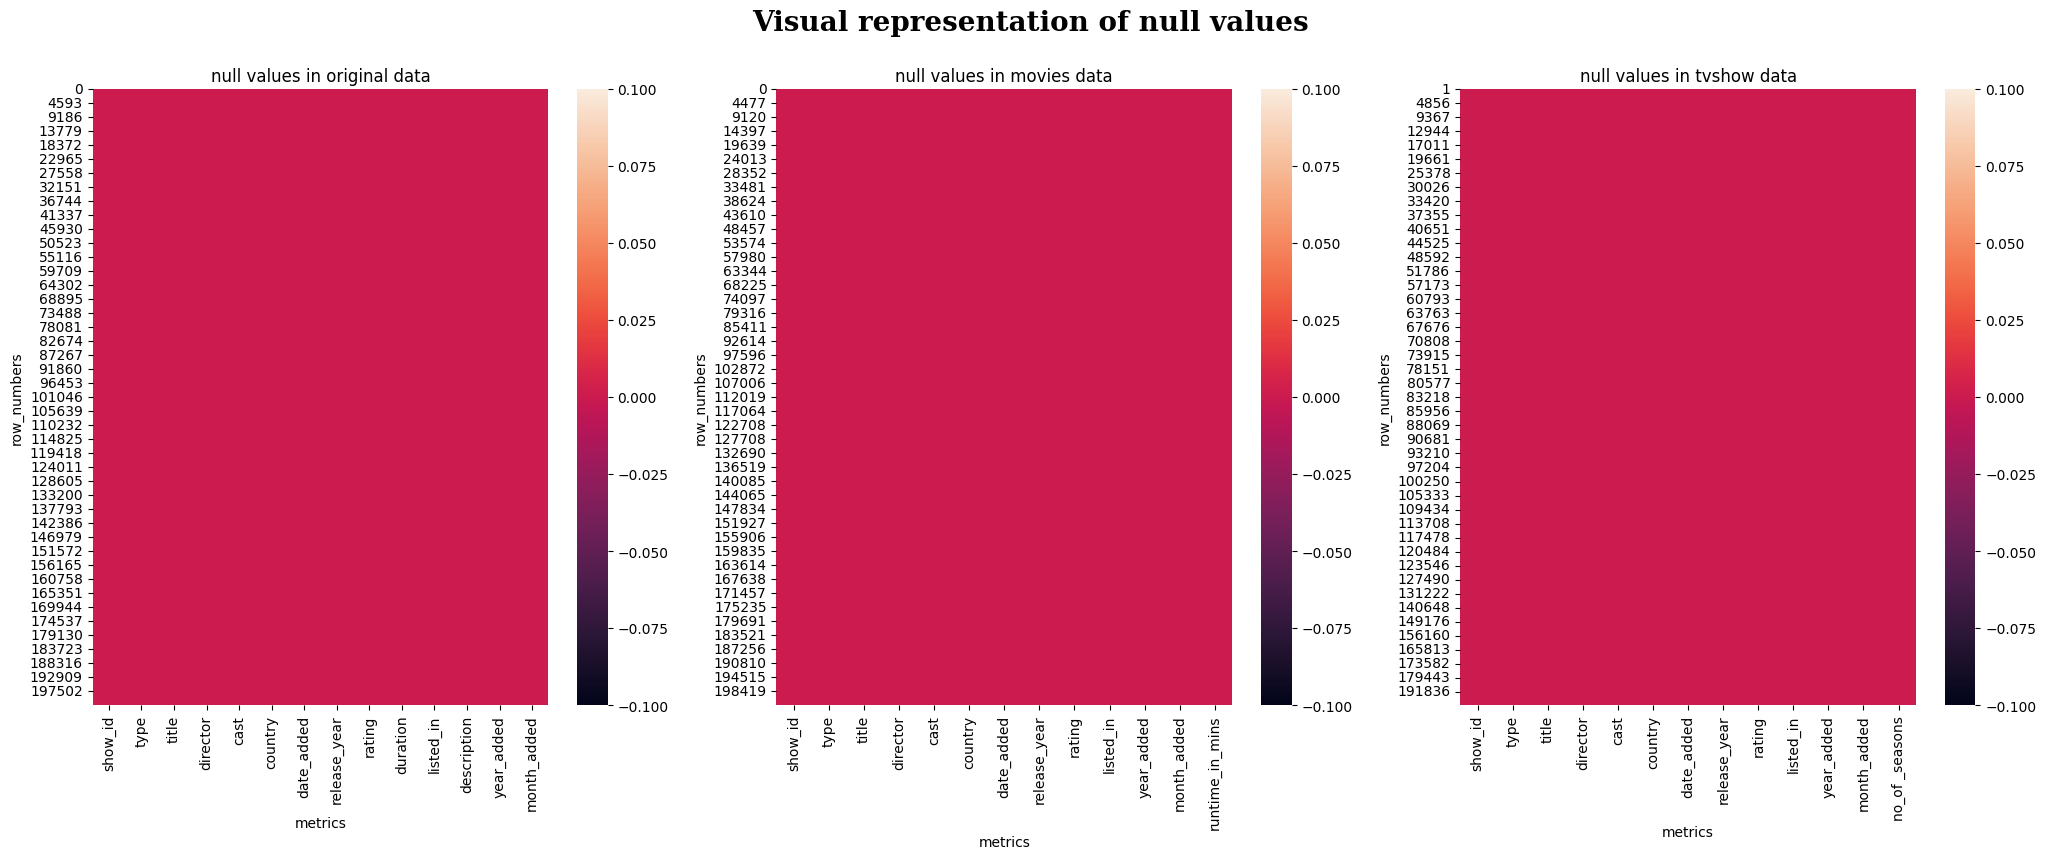

In [219]:
#visual check for nulls

plt.figure(figsize=(25,8)).suptitle('Visual representation of null values',fontsize=20,fontweight="bold",fontfamily='serif')

plt.subplot(1,3,1)
sns.heatmap(df1.isnull())
plt.title('null values in original data')
plt.xlabel('metrics')
plt.ylabel('row_numbers')

plt.subplot(1,3,2)
sns.heatmap(movies_data.isnull())
plt.title('null values in movies data')
plt.xlabel('metrics')
plt.ylabel('row_numbers')

plt.subplot(1,3,3)
sns.heatmap(tvshows_data.isnull())
plt.title('null values in tvshow data')
plt.xlabel('metrics')
plt.ylabel('row_numbers')

plt.show()


#**Insights**  

So the pure red color shows that there are no null values

#EDA(Exploratory Data Analysis)

#Q . How are contents distributed in Netflix Platform ?

In [220]:
pgdf=df1.groupby('type')['show_id'].nunique()
pg=df1.groupby('type')['show_id'].nunique().reset_index()

In [221]:
pgdf

type
Movie      6128
TV Show    2676
Name: show_id, dtype: int64

<ipython-input-222-19c0ae62b938>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y=pg.show_id , data=pg , x=pg.type , palette=['red','#dedede'])


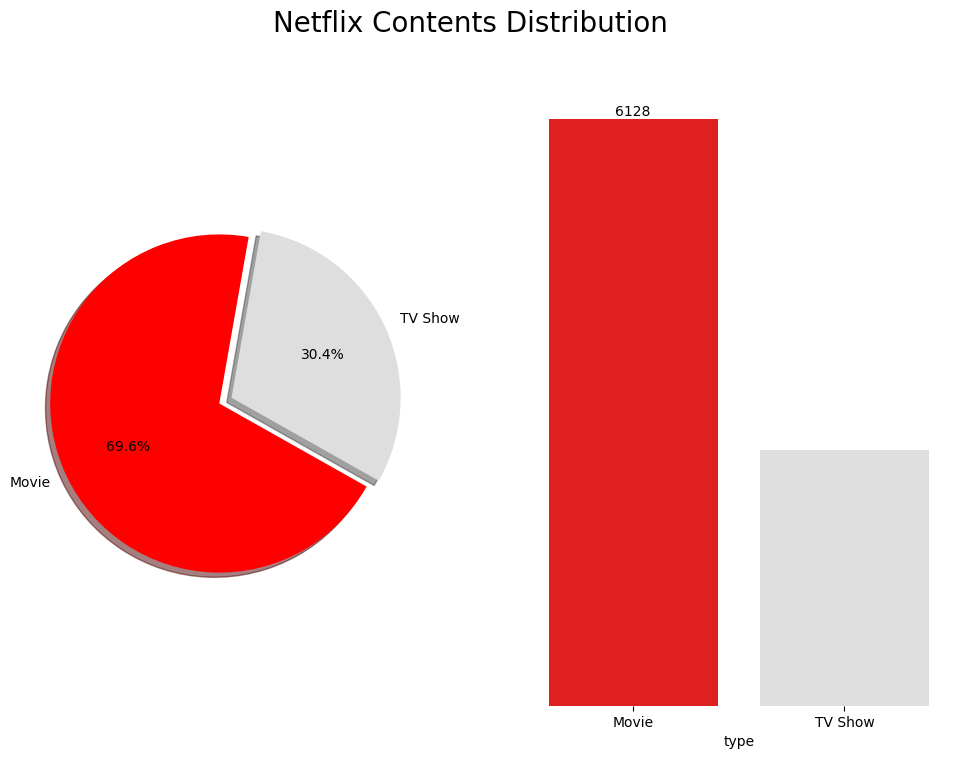

In [222]:
plt.figure(figsize=(12,8))
plt.suptitle("Netflix Contents Distribution",fontsize=20)
plt.style.use('seaborn-v0_8-bright')
plt.subplot(1,2,1)
plt.pie(pgdf,labels=pgdf.index,startangle=80,colors=['red','#dedede'],
        explode=(0.08,0),shadow=True,
        autopct="%1.1f%%")
plt.subplot(1,2,2)
a = sns.barplot(y=pg.show_id , data=pg , x=pg.type , palette=['red','#dedede'])
a.bar_label(a.containers[0], label_type='edge')
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel('')


plt.show()

We can clearly say that 70% of content are movies and rest of them are tvshows

Q. Outliers check

<ipython-input-223-bdc76e0db7d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1,x='type',y='release_year',palette=['red','#dedede'])


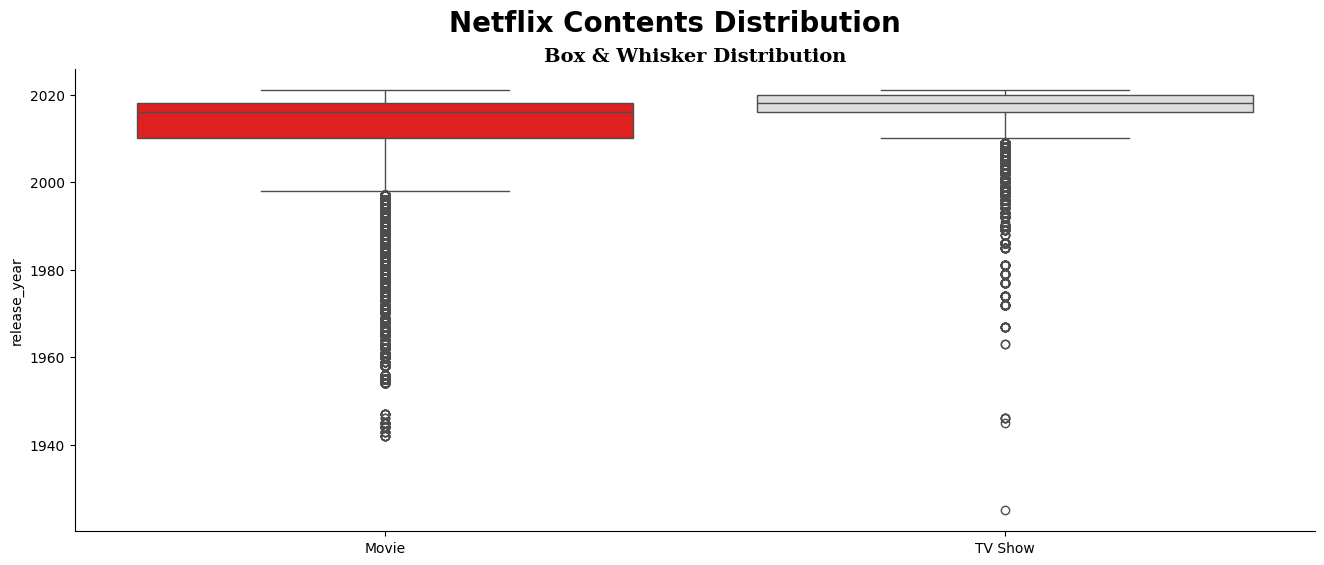

In [223]:
plt.figure(figsize=(16,6))
font = {'weight':'bold',
        'family':'serif'}
plt.suptitle("Netflix Contents Distribution",fontweight='bold',fontsize=20)

plt.style.use('seaborn-v0_8-bright')
sns.boxplot(df1,x='type',y='release_year',palette=['red','#dedede'])
sns.despine()
plt.xlabel('')
plt.title("Box & Whisker Distribution",fontdict=font,fontsize=14)

plt.show()

Q. In which year the maximum content got released?

In [224]:
tt=df1['release_year'].value_counts()[:20]
print(type(tt))
tt

<class 'pandas.core.series.Series'>


release_year
2018    24441
2019    21931
2017    20515
2020    19697
2016    18465
2015    14127
2021    11894
2014     9098
2013     7745
2012     6354
2010     5108
2009     4782
2011     4573
2008     3791
2006     2523
2007     2490
2005     2237
2004     2081
2003     1934
2002     1777
Name: count, dtype: int64

In [225]:
ry_cpt=df1.groupby('release_year')['show_id'].nunique().sort_values(ascending=False)[:20]
ry_cpt

release_year
2018    1147
2017    1031
2019    1030
2020     953
2016     902
2021     592
2015     559
2014     352
2013     288
2012     237
2010     193
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: show_id, dtype: int64

In [226]:
ry_cptt=df1.groupby('release_year')['show_id'].nunique().sort_values(ascending=False)[:20].reset_index()
ry_cptt

release_year  show_id
0           2018     1147
1           2017     1031
2           2019     1030
3           2020      953
4           2016      902
5           2021      592
6           2015      559
7           2014      352
8           2013      288
9           2012      237
10          2010      193
11          2011      185
12          2009      152
13          2008      136
14          2006       96
15          2007       88
16          2005       80
17          2004       64
18          2003       61
19          2002       51

<ipython-input-227-6a28b13b61c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-227-6a28b13b61c2>:4: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


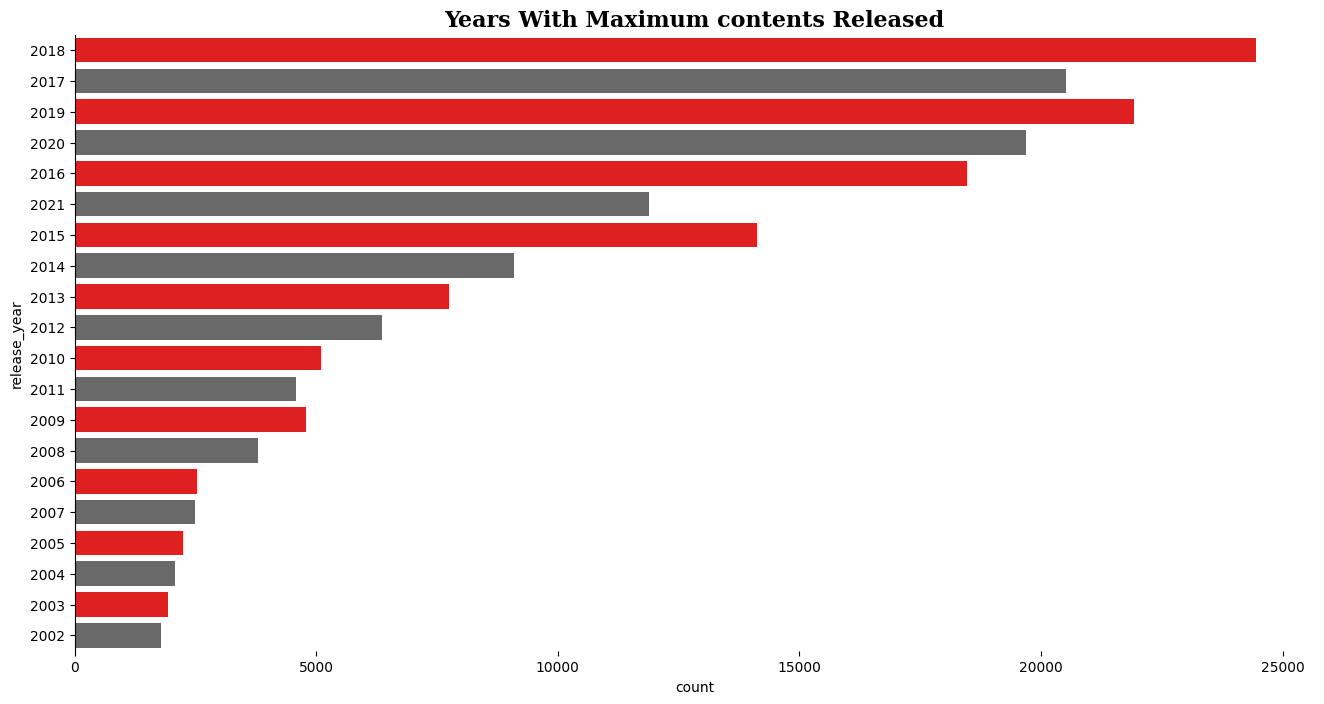

In [227]:
plt.figure(figsize=(16,8))
font = {'weight':'bold',
        'family':'serif'}
sns.countplot(
    order=ry_cpt.index,  # Categorical variable (e.g., years)
    y='release_year',       # Count of shows (ensure 'show_id' is preprocessed for counts)
    data=df1,       # DataFrame containing the data
    palette=['red', 'dimgrey']  # Color palette
)

sns.despine(bottom=True)
plt.title('Years With Maximum contents Released',fontsize=16,fontweight='bold',fontfamily='serif')
plt.show()

<ipython-input-228-cb3e6ffcf762>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(ry_cptt,x=ry_cptt.release_year,y=ry_cptt.show_id,order=ry_cpt.index,palette=['red', 'dimgrey'])
<ipython-input-228-cb3e6ffcf762>:4: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  a=sns.barplot(ry_cptt,x=ry_cptt.release_year,y=ry_cptt.show_id,order=ry_cpt.index,palette=['red', 'dimgrey'])


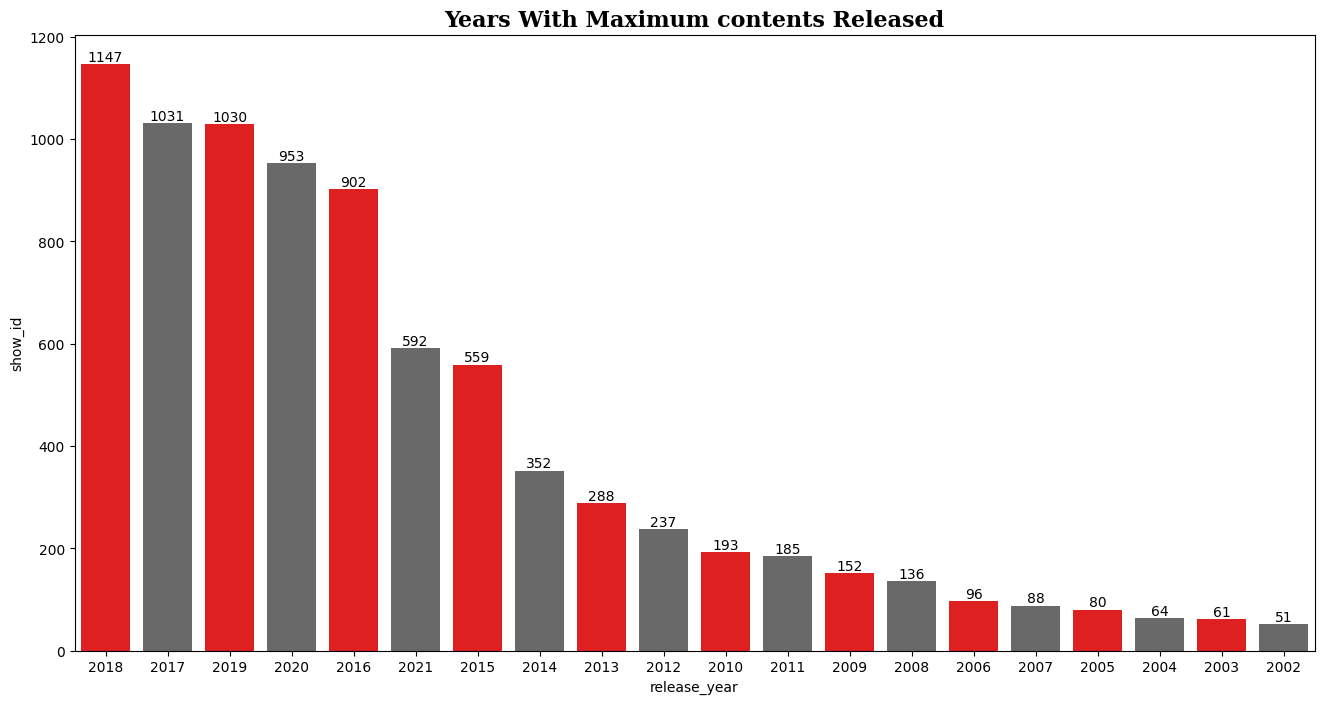

In [228]:
plt.figure(figsize=(16,8))
font = {'weight':'bold',
        'family':'serif'}
a=sns.barplot(ry_cptt,x=ry_cptt.release_year,y=ry_cptt.show_id,order=ry_cpt.index,palette=['red', 'dimgrey'])
for container in a.containers:
    a.bar_label(container)
plt.title('Years With Maximum contents Released',fontsize=16,fontweight='bold',fontfamily='serif')
plt.show()

Q. What are the top 10 countries consumption of movies and tvshows ?

In [229]:
movies_data.head()
movies_data[movies_data['country']==' United States']
def col_cor(cntry):
  if cntry==' United States':
    return 'United States'
  else:
    return cntry


movies_data['country']=movies_data['country'].apply(col_cor)
tvshows_data['country']=tvshows_data['country'].apply(col_cor)
df1['country']=df1['country'].apply(col_cor)



<ipython-input-229-f22b244e46af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['country']=movies_data['country'].apply(col_cor)
<ipython-input-229-f22b244e46af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_data['country']=tvshows_data['country'].apply(col_cor)


In [230]:
movies_data['country'].value_counts()

country
United States      45814
India              20761
unknown_country     6199
United Kingdom      5655
 France             3592
                   ...  
 Botswana              2
 Afghanistan           2
 Nicaragua             1
 Kazakhstan            1
 Uganda                1
Name: count, Length: 187, dtype: int64

In [231]:
mv_d=movies_data.groupby('country')['show_id'].nunique().sort_values(ascending=False)[:11]
mv_d=mv_d[mv_d.index!='unknown_country']
mv_d=mv_d.reset_index()
mv_d

country  show_id
0    United States     2749
1            India      927
2   United Kingdom      382
3           Canada      187
4           France      155
5   United Kingdom      152
6           France      148
7           Canada      132
8            Spain      129
9          Germany      104

In [232]:
tv_d=tvshows_data.groupby('country')['show_id'].nunique().sort_values(ascending=False)[:11]
tv_d=tv_d[tv_d.index!='unknown_country']
tv_d=tv_d.reset_index()
tv_d

country  show_id
0   United States      938
1  United Kingdom      246
2           Japan      174
3     South Korea      164
4          Canada       84
5           India       81
6          Taiwan       70
7          France       64
8       Australia       56
9           Spain       52

<ipython-input-233-7f5fe172af08>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


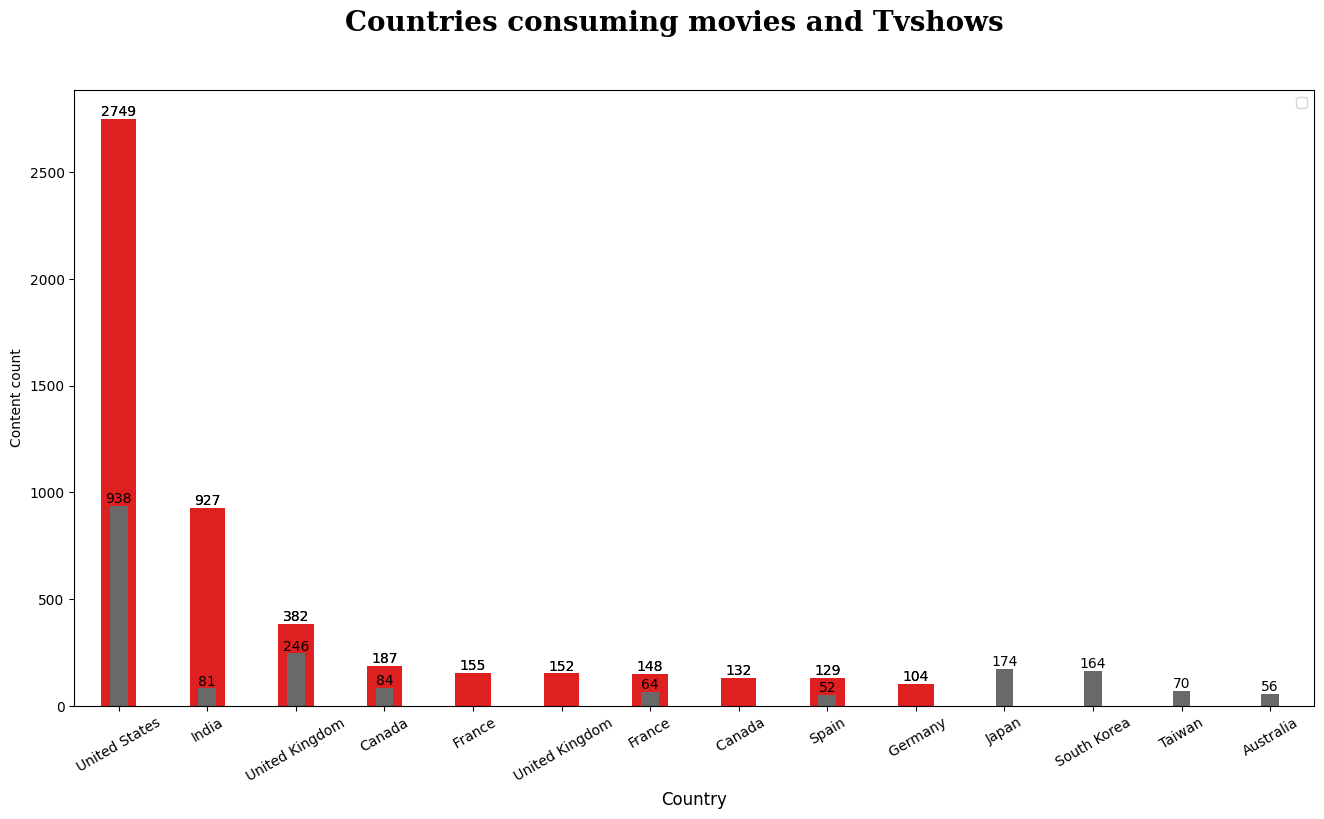

In [233]:
plt.figure(figsize=(16,8))
plt.suptitle("Countries consuming movies and Tvshows",fontweight='bold',fontsize=20,fontfamily='serif')
c1=sns.barplot(mv_d,x=mv_d.country,y=mv_d.show_id,color='red',width=0.4)
for containers in c1.containers:
  c1.bar_label(containers)
plt.xlabel('Country',fontsize=12)
plt.xticks(rotation=30)
plt.ylabel("Content count")
c2=sns.barplot(tv_d,x=tv_d.country,y=tv_d.show_id,color='dimgray',width=0.2)
for containers in c2.containers:
  c2.bar_label(containers)
plt.xlabel('Country',fontsize=12)
plt.xticks(rotation=30)
plt.ylabel("Content count")
plt.legend(loc='upper right')

plt.show()

#Insights:-

The top 5 countries with the highest count of Movies and TV Shows are aiding in recognizing the key players in TV show production and Movies production.


In [234]:
df1

show_id     type                 title          director  \
0           s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1           s2  TV Show         Blood & Water  unknown_director   
2           s2  TV Show         Blood & Water  unknown_director   
3           s2  TV Show         Blood & Water  unknown_director   
4           s2  TV Show         Blood & Water  unknown_director   
...        ...      ...                   ...               ...   
202060   s8807    Movie                Zubaan       Mozez Singh   
202061   s8807    Movie                Zubaan       Mozez Singh   
202062   s8807    Movie                Zubaan       Mozez Singh   
202063   s8807    Movie                Zubaan       Mozez Singh   
202064   s8807    Movie                Zubaan       Mozez Singh   

                          cast        country date_added  release_year rating  \
0               unknown_actors  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[202062 rows x 14 columns]

📌Q. How much contents are added every year in netflix ?

In [235]:
yc=df1.groupby(['type','year_added'])['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)
yc

type  year_added  show_id
11    Movie        2019     1424
12    Movie        2020     1284
10    Movie        2018     1237
13    Movie        2021      993
9     Movie        2017      838
22  TV Show        2020      692
21  TV Show        2019      575
23  TV Show        2021      505
20  TV Show        2018      388
19  TV Show        2017      325
8     Movie        2016      251
18  TV Show        2016      165
7     Movie        2015       56
6     Movie        2014       19
17  TV Show        2015       17
3     Movie        2011       13
5     Movie        2013        6
15  TV Show        2013        4
16  TV Show        2014        4
4     Movie        2012        3
1     Movie        2009        2
2     Movie        2010        1
0     Movie        2008        1
14  TV Show        2008        1

In [236]:
ycm=yc[yc['type']=='Movie']
ycts=yc[yc['type']=='TV Show']

In [237]:
yc.show_id.sum()

np.int64(8804)

In [238]:
print(ycm.show_id.sum())
print(ycts.show_id.sum())

6128
2676


Multivariate analysis type by year added

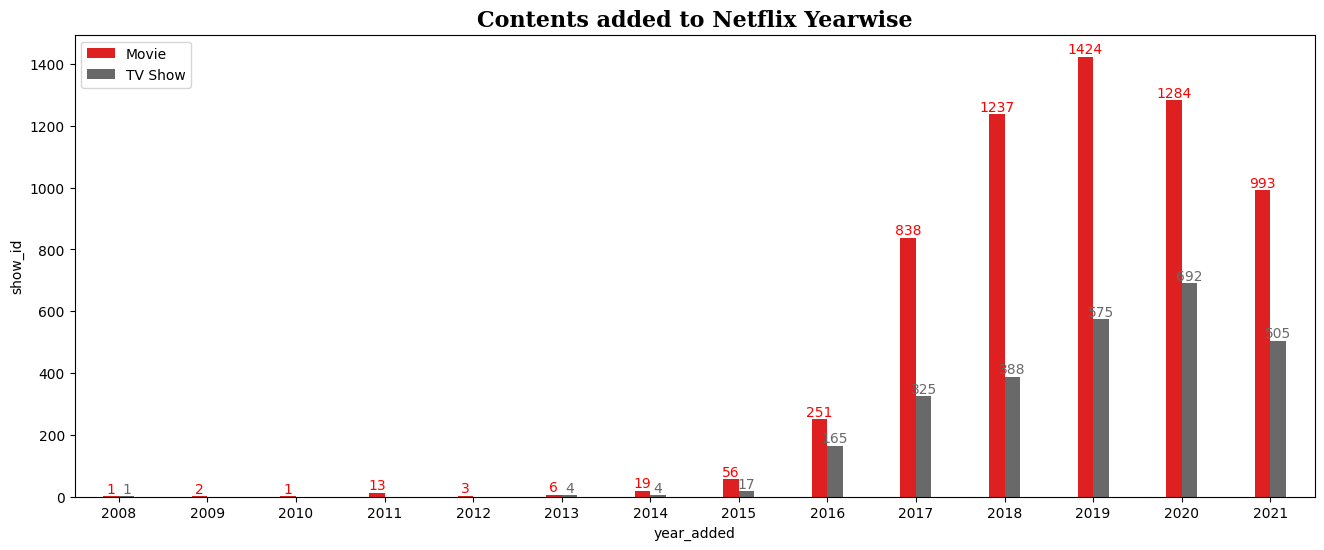

In [239]:
plt.figure(figsize=(16,6))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
c = sns.barplot(data = yc, x = 'year_added' , y = 'show_id' ,
                hue = 'type', palette=['red','dimgrey'] , width=0.35)
plt.title('Contents added to Netflix Yearwise',
          fontsize=16,fontweight="bold",fontfamily='serif')
c.bar_label(c.containers[0], label_type='edge',color='red')
c.bar_label(c.containers[1], label_type='edge',color='dimgray')
plt.legend(loc='upper left')
plt.show()

Insights :
Netflix's content acquisition strategy over time.

The bar plot shows the distribution of content added to Netflix across different years.
There appears to be an increasing trend in the total number of content items added to Netflix over the years.
The bars tend to get taller as you move from left to right, suggesting that Netflix has been continuously expanding its content library.
The variation in bar heights from year to year highlights how Netflix's content strategy has evolved.
Some years show significant spikes, while others have lower counts, indicating variations in content acquisition.

Q. How much contents gets released every year ?

In [240]:
rcm=movies_data.groupby('release_year')['show_id'].nunique().reset_index()
rcts=tvshows_data.groupby('release_year')['show_id'].nunique().reset_index()

In [241]:
rcm

release_year  show_id
0           1942        2
1           1943        3
2           1944        3
3           1945        3
4           1946        1
..           ...      ...
68          2017      766
69          2018      767
70          2019      633
71          2020      517
72          2021      277

[73 rows x 2 columns]

In [242]:
rcts

release_year  show_id
0           1925        1
1           1945        1
2           1946        1
3           1963        1
4           1967        1
5           1972        1
6           1974        1
7           1977        1
8           1979        1
9           1981        1
10          1985        1
11          1986        2
12          1988        2
13          1989        1
14          1990        3
15          1991        1
16          1992        3
17          1993        4
18          1994        2
19          1995        2
20          1996        3
21          1997        4
22          1998        4
23          1999        7
24          2000        4
25          2001        5
26          2002        7
27          2003       10
28          2004        9
29          2005       13
30          2006       14
31          2007       14
32          2008       23
33          2009       34
34          2010       40
35          2011       40
36          2012       64
37          2013       63
38          2014       88
39          2015      162
40          2016      244
41          2017      265
42          2018      380
43          2019      397
44          2020      436
45          2021      315

Univariate analysis

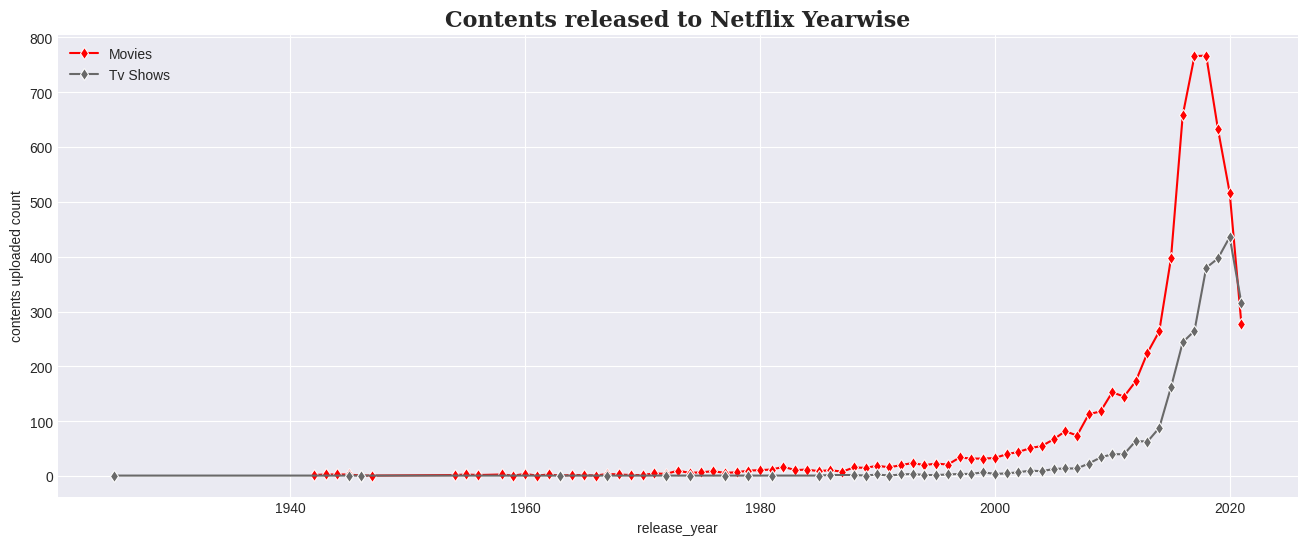

In [243]:
plt.figure(figsize=(16,6))
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')
c1 = sns.lineplot(rcm,x='release_year',y='show_id',color='red',marker='d',label='Movies')
c2=sns.lineplot(rcts,x='release_year',y='show_id',color='dimgray',marker='d',label='Tv Shows')


plt.title('Contents released to Netflix Yearwise',
          fontsize=16,fontweight="bold",fontfamily='serif')
plt.ylabel('contents uploaded count')
plt.legend(loc='upper left')
plt.show()

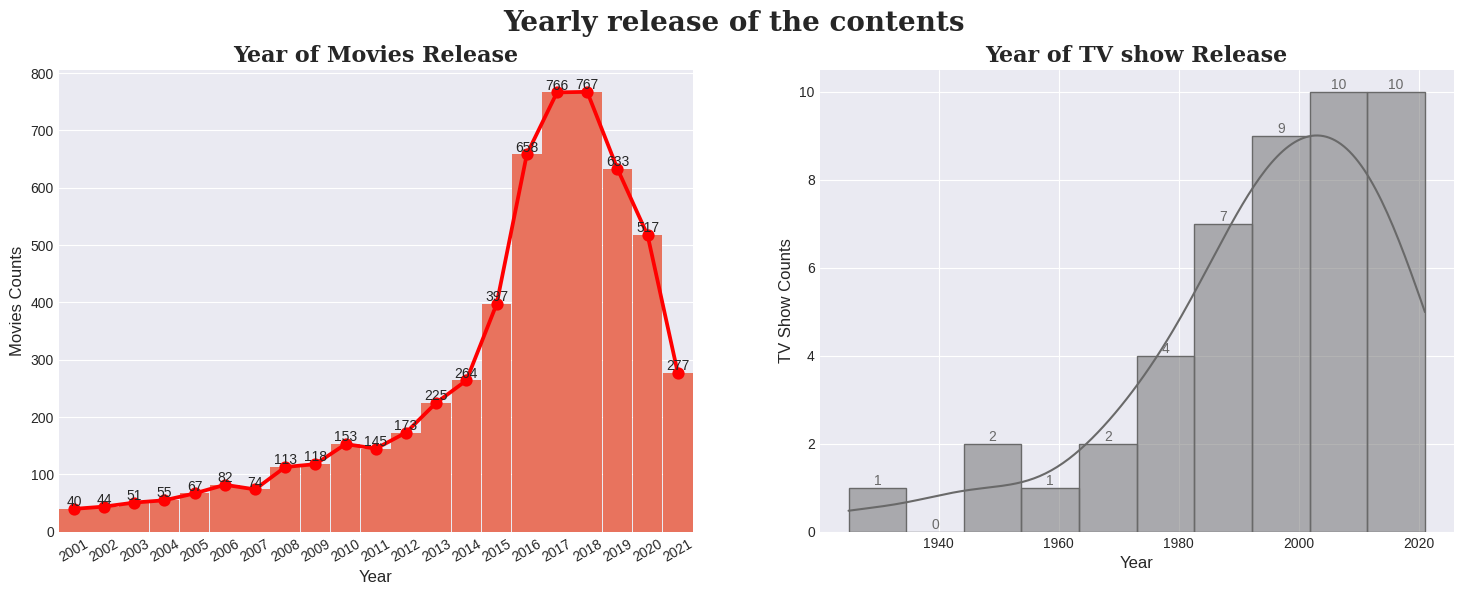

In [244]:
plt.figure(figsize=(18,6))
plt.suptitle('Yearly release of the contents',fontsize=20,fontweight='bold',fontfamily='serif')

plt.style.use('seaborn-v0_8-darkgrid')
plt.subplot(1,2,1)
mr=rcm[rcm['release_year']>2000]
c=sns.barplot(mr,x='release_year',y='show_id',color='tomato',width=0.98)
c.bar_label(c.containers[0])
sns.pointplot(mr,x='release_year',y='show_id',color='r')
plt.xlabel("Year",fontsize=12)
plt.xticks(rotation=30)
plt.ylabel("Movies Counts", fontsize=12)
plt.title("Year of Movies Release", fontsize=16,fontweight="bold",fontfamily='serif')


plt.subplot(1,2,2)
d = sns.histplot(x = rcts.release_year, bins = 10, kde = True,
             color='dimgrey' , edgecolor ='dimgrey')
d.bar_label(d.containers[0], label_type='edge',color='dimgrey')
plt.xlabel('Year',fontsize=12)
plt.ylabel("TV Show Counts", fontsize=12)
plt.title("Year of TV show Release", fontsize=16,fontweight="bold",fontfamily='serif')

plt.show()


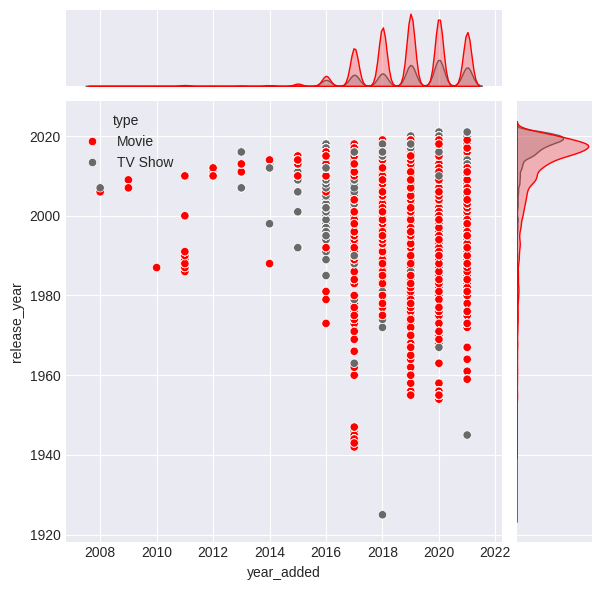

In [245]:
sns.jointplot(df1 , x='year_added' , y='release_year' , hue='type' ,
                      palette=['red','dimgrey'])
plt.show()

Insights :
The plot uses two distinct lines in different colors (red for movies and dimgrey for TV shows) to enable a side-by-side comparison.
The plot reveals that Movies has been more dominant in terms of release counts in any given year and in the recent past audience focus shifts on watching web series.
The dominance of movies and TV shows over the years can indicate changing audience preferences, industry trends and Netflix's strategic decisions.
Netflix has been continuously expanding its content library, offering more choices to its subscribers.

In [246]:
df1

show_id     type                 title          director  \
0           s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1           s2  TV Show         Blood & Water  unknown_director   
2           s2  TV Show         Blood & Water  unknown_director   
3           s2  TV Show         Blood & Water  unknown_director   
4           s2  TV Show         Blood & Water  unknown_director   
...        ...      ...                   ...               ...   
202060   s8807    Movie                Zubaan       Mozez Singh   
202061   s8807    Movie                Zubaan       Mozez Singh   
202062   s8807    Movie                Zubaan       Mozez Singh   
202063   s8807    Movie                Zubaan       Mozez Singh   
202064   s8807    Movie                Zubaan       Mozez Singh   

                          cast        country date_added  release_year rating  \
0               unknown_actors  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[202062 rows x 14 columns]

Q. How the contents genre segregated ?

In [247]:
gmd=movies_data.groupby('listed_in')['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)
gmd

listed_in  show_id
10       International Movies     2624
25                     Dramas     1600
22                   Comedies     1210
18         Action & Adventure      859
24              Documentaries      829
6                      Dramas      827
9          Independent Movies      736
13            Romantic Movies      613
20   Children & Family Movies      605
17                  Thrillers      512
3                    Comedies      464
12           Music & Musicals      357
35            Stand-Up Comedy      334
26              Horror Movies      275
14           Sci-Fi & Fantasy      230
15              Sports Movies      218
28       International Movies      128
11               LGBTQ Movies      101
8               Horror Movies       82
21             Classic Movies       80
7        Faith & Spirituality       65
36                  Thrillers       65
4                 Cult Movies       59
30                     Movies       54
0              Anime Features       50
5               Documentaries       40
2              Classic Movies       36
1    Children & Family Movies       36
19             Anime Features       21
27         Independent Movies       20
31           Music & Musicals       18
33           Sci-Fi & Fantasy       13
23                Cult Movies       12
16            Stand-Up Comedy        9
32            Romantic Movies        3
29               LGBTQ Movies        1
34              Sports Movies        1

In [248]:
gtd=tvshows_data.groupby('listed_in')['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)
gtd

listed_in  show_id
24         International TV Shows      774
13                      TV Dramas      696
3          International TV Shows      577
12                    TV Comedies      461
22                 Crime TV Shows      399
25                       Kids' TV      388
7               Romantic TV Shows      338
20               British TV Shows      253
23                     Docuseries      221
19                   Anime Series      176
2                      Docuseries      174
9       Spanish-Language TV Shows      172
5                 Korean TV Shows      151
6                      Reality TV      135
11          TV Action & Adventure      128
26                     Reality TV      120
31                    TV Comedies      120
15                   TV Mysteries       98
8             Science & Nature TV       92
16            TV Sci-Fi & Fantasy       83
1                  Crime TV Shows       71
18                  Teen TV Shows       69
32                      TV Dramas       67
14                      TV Horror       64
4                        Kids' TV       63
17                   TV Thrillers       57
30          TV Action & Adventure       40
29   Stand-Up Comedy & Talk Shows       34
27              Romantic TV Shows       32
10   Stand-Up Comedy & Talk Shows       22
21              Classic & Cult TV       22
35                       TV Shows       16
33                      TV Horror       11
0               Classic & Cult TV        6
28      Spanish-Language TV Shows        2
34            TV Sci-Fi & Fantasy        1

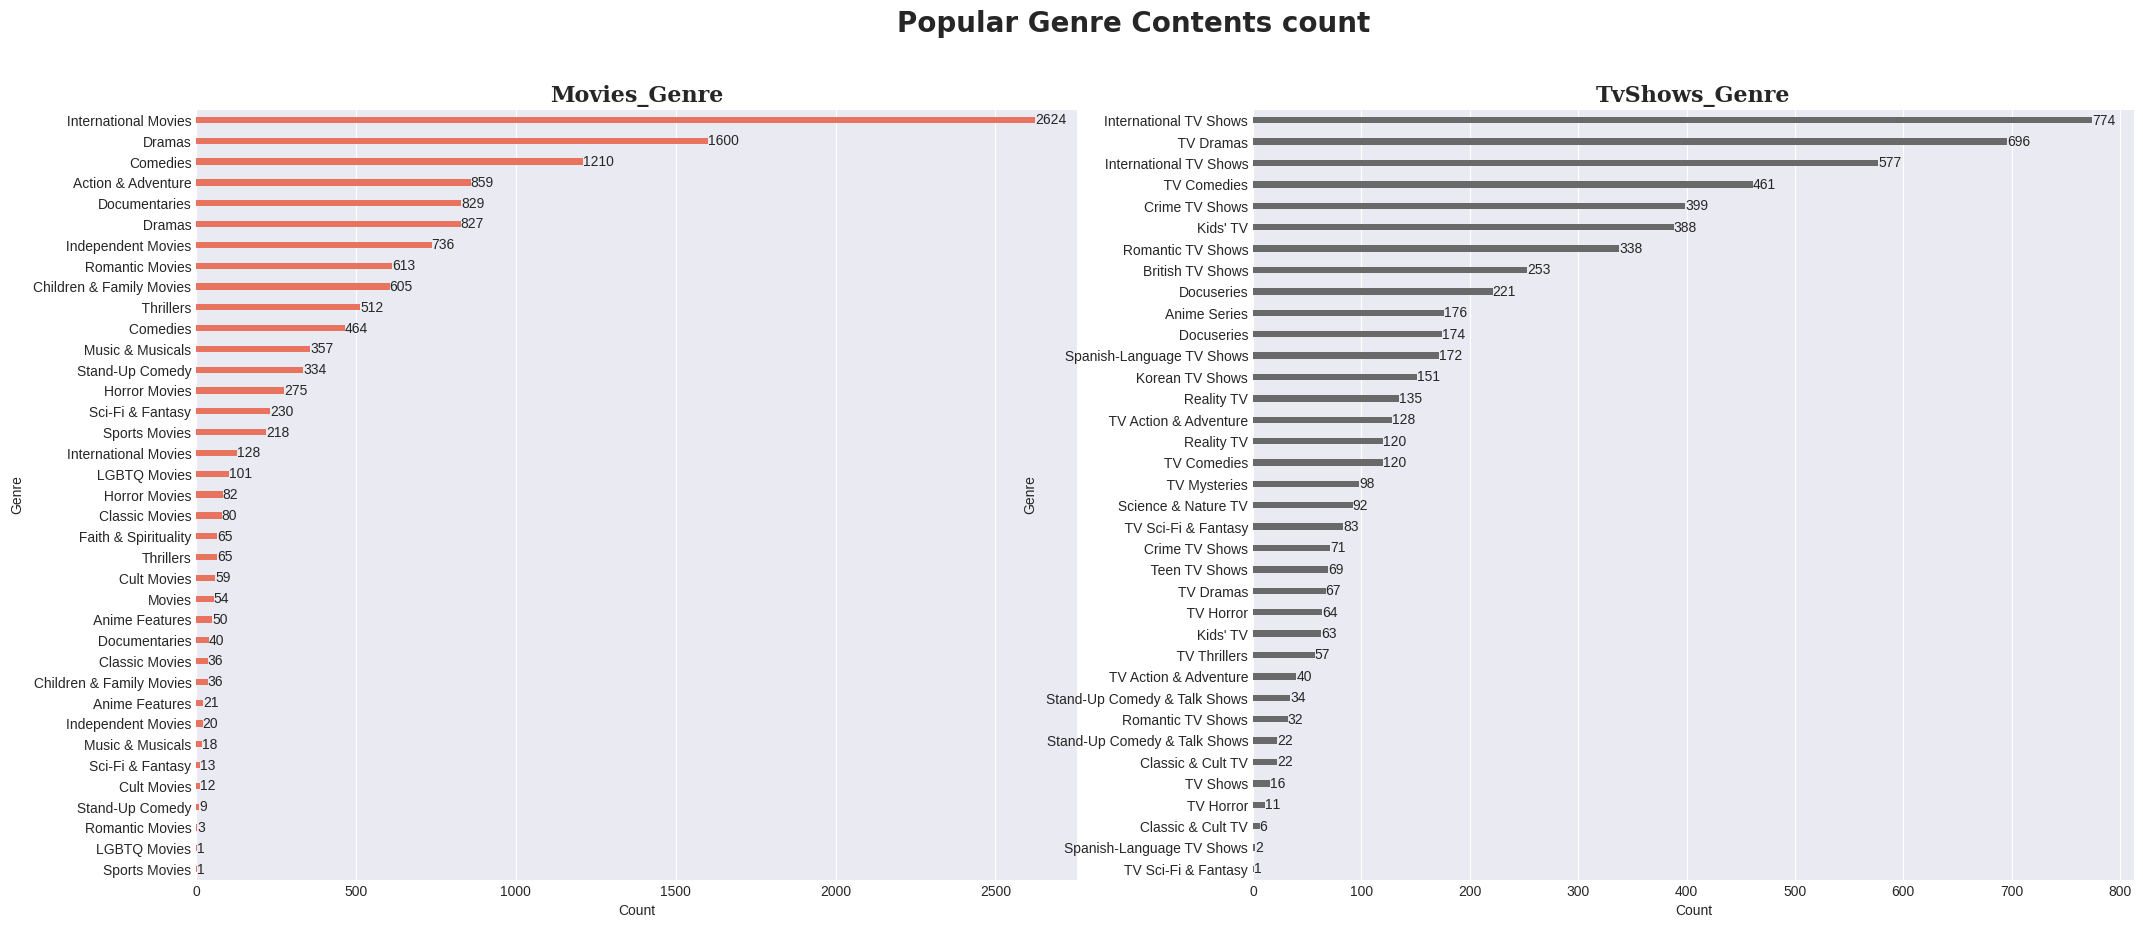

In [249]:
plt.figure(figsize=(25,10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')
plt.suptitle('Popular Genre Contents count',fontsize=20,
             fontweight="bold",fontfamily='cursive')
plt.subplot(1,2,1)
c1=sns.barplot(gmd,x='show_id',y='listed_in',color='tomato',width=0.3)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Movies_Genre',fontsize=16,fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)
for container in c1.containers:
    c1.bar_label(container)

plt.subplot(1,2,2)
c2=sns.barplot(gtd,x='show_id',y='listed_in',color='dimgrey',width=0.3)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('TvShows_Genre',fontsize=16,fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)
for container in c2.containers:
    c2.bar_label(container)

plt.show()






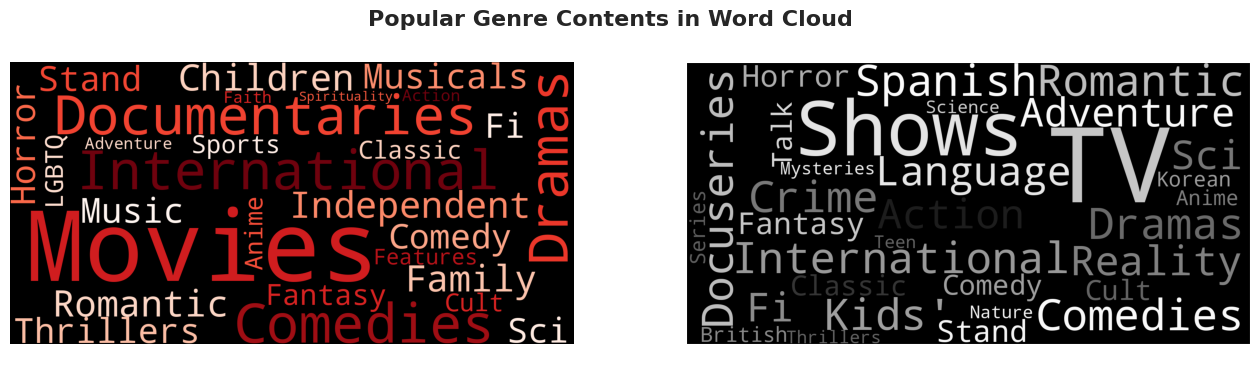

In [250]:
from wordcloud import WordCloud
plt.figure(figsize=(16,4))
plt.suptitle('Popular Genre Contents in Word Cloud',
             fontsize=16,fontweight="bold",fontfamily='fantasy')
plt.style.use('default')
plt.style.use('dark_background')

plt.subplot(1,2,1)
mgwc=WordCloud(width=1600,height=800,background_color='black',colormap='Reds').generate(gmd.listed_in.to_string())
plt.imshow(mgwc)
plt.axis('off')
plt.title('Movies_Genre',fontsize=16,fontweight="bold",fontfamily='serif')

plt.subplot(1,2,2)
tgwc=WordCloud(width=1600,height=800,background_color='black',colormap='Greys').generate(gtd.listed_in.to_string())
plt.imshow(tgwc)
plt.show()

Insights :

The plot illustrates the popularity of various genres in Movies and TV Shows on the platform.

Here, we can see that Hollywood contents , Dramas , Comedies are the Top and Evergreen genres

The plot provides insights into audience preferences, indicating which genres are more prevalent in Movies and TV Shows.

Q. what genre's are more preferred by directors ?

In [251]:
gdm=movies_data.groupby('listed_in')['director'].nunique().reset_index().sort_values('director',ascending=False)
gdm

listed_in  director
10       International Movies      2170
25                     Dramas      1429
22                   Comedies      1057
24              Documentaries       840
9          Independent Movies       765
6                      Dramas       759
18         Action & Adventure       715
20   Children & Family Movies       536
13            Romantic Movies       531
17                  Thrillers       487
3                    Comedies       424
12           Music & Musicals       333
26              Horror Movies       268
14           Sci-Fi & Fantasy       243
15              Sports Movies       226
35            Stand-Up Comedy       189
28       International Movies       119
11               LGBTQ Movies       105
8               Horror Movies        84
36                  Thrillers        63
7        Faith & Spirituality        63
21             Classic Movies        62
4                 Cult Movies        60
0              Anime Features        48
1    Children & Family Movies        36
30                     Movies        36
2              Classic Movies        35
5               Documentaries        34
19             Anime Features        34
27         Independent Movies        24
31           Music & Musicals        21
33           Sci-Fi & Fantasy        15
23                Cult Movies        13
16            Stand-Up Comedy        11
32            Romantic Movies         3
29               LGBTQ Movies         1
34              Sports Movies         1

In [252]:
gdt=tvshows_data.groupby('listed_in')['director'].nunique().reset_index().sort_values('director',ascending=False)
gdt

listed_in  director
24         International TV Shows        92
13                      TV Dramas        90
3          International TV Shows        74
22                 Crime TV Shows        70
12                    TV Comedies        47
23                     Docuseries        39
2                      Docuseries        39
35                       TV Shows        30
7               Romantic TV Shows        30
20               British TV Shows        26
9       Spanish-Language TV Shows        21
15                   TV Mysteries        17
25                       Kids' TV        16
11          TV Action & Adventure        16
5                 Korean TV Shows        13
1                  Crime TV Shows        12
19                   Anime Series        12
14                      TV Horror        11
29   Stand-Up Comedy & Talk Shows        10
17                   TV Thrillers        10
31                    TV Comedies         8
16            TV Sci-Fi & Fantasy         6
10   Stand-Up Comedy & Talk Shows         6
6                      Reality TV         6
8             Science & Nature TV         5
4                        Kids' TV         5
18                  Teen TV Shows         4
0               Classic & Cult TV         3
32                      TV Dramas         3
30          TV Action & Adventure         3
21              Classic & Cult TV         3
26                     Reality TV         2
27              Romantic TV Shows         2
33                      TV Horror         2
28      Spanish-Language TV Shows         1
34            TV Sci-Fi & Fantasy         1

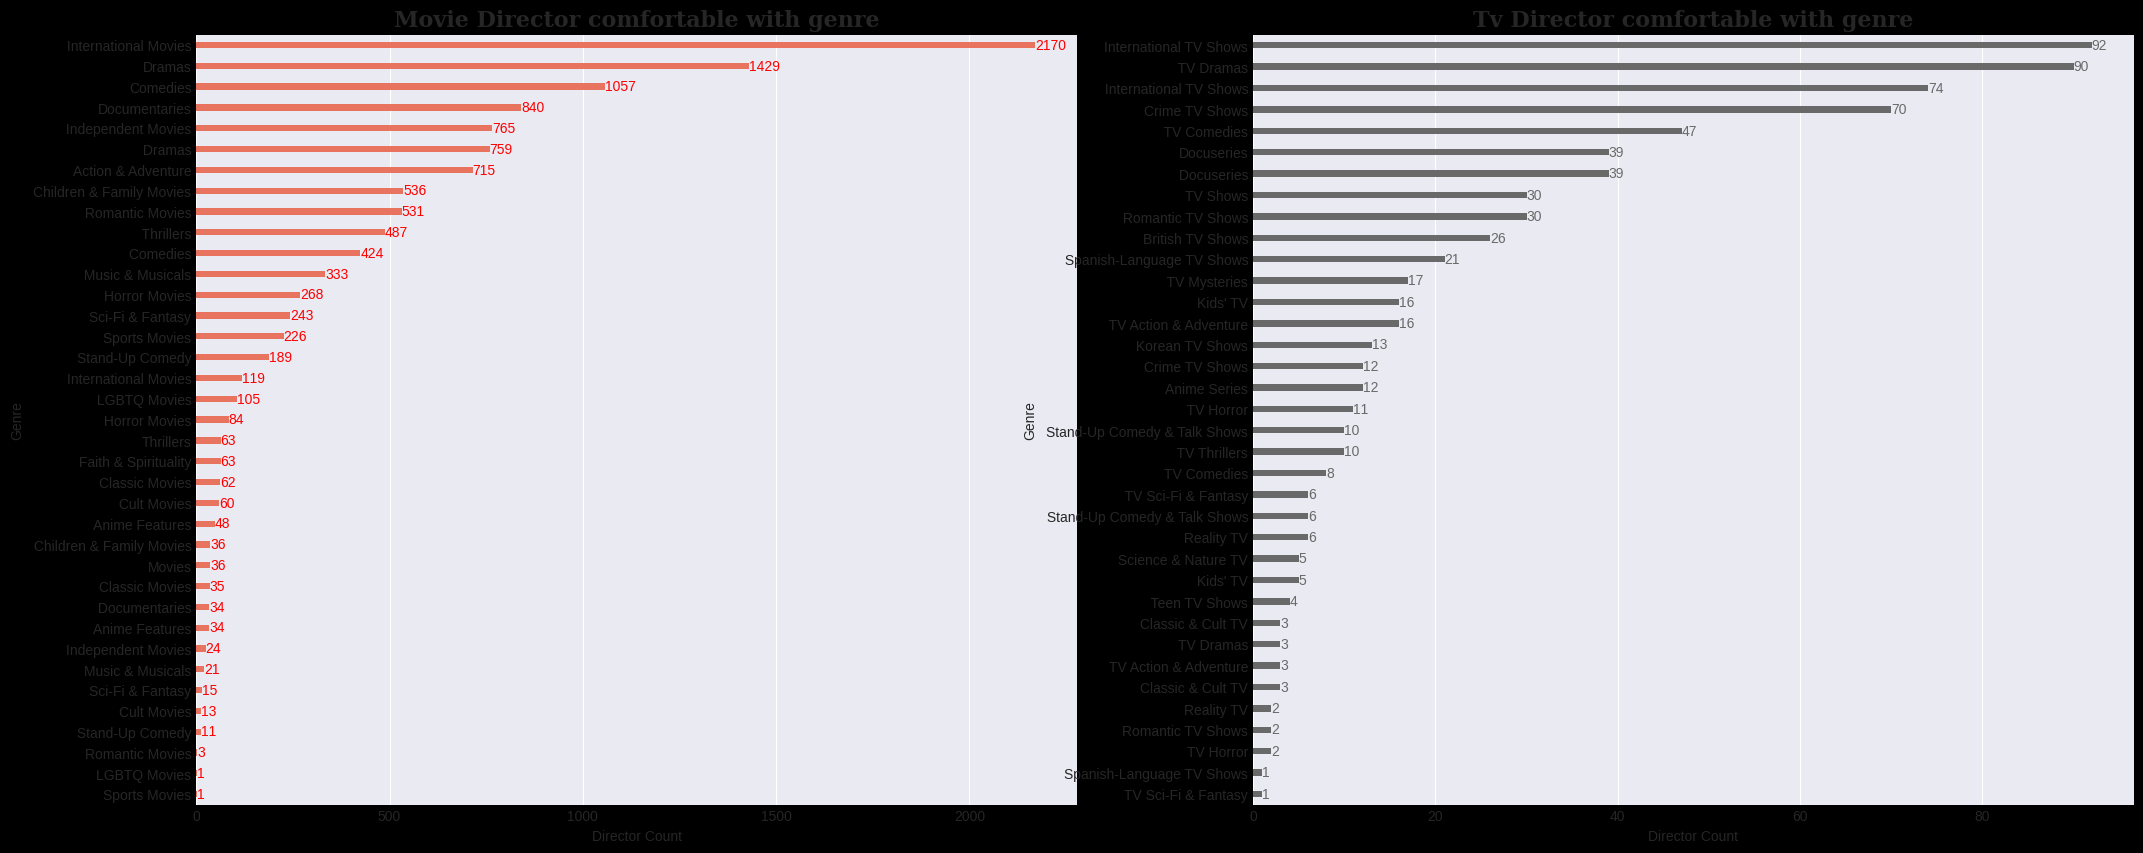

In [253]:
plt.figure(figsize=(25,10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')

plt.subplot(1,2,1)
c1=sns.barplot(gdm,y='listed_in',x='director',color='tomato',width=0.3)
plt.title('Movie Director comfortable with genre',fontsize=16,fontweight="bold",fontfamily='serif')
plt.ylabel('Genre')
plt.xlabel('Director Count')
sns.despine(left=True,bottom=True,trim=True)
c1.bar_label(c1.containers[0],color='r')

plt.subplot(1,2,2)
c2=sns.barplot(gdt,y='listed_in',x='director',color='dimgrey',width=0.3)
plt.title('Tv Director comfortable with genre',fontsize=16,fontweight="bold",fontfamily='serif')
plt.ylabel('Genre')
plt.xlabel('Director Count')
sns.despine(left=True,bottom=True,trim=True)
c2.bar_label(c2.containers[0],color='dimgrey')

plt.show()

Insights:

The diversity of genre that the directors are more comfortable indicates that Netflix has content on all genres in its library.

The top genres with the most directors are International Movies, Dramas, Comedies, Documentaries, Independent Movies, and Action & Adventure.

Q. What are genres more preferred in each country ?

In [254]:
cgdm=movies_data.groupby(['country','listed_in'])['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)
cgdm['rank']=cgdm.groupby('country')['show_id'].rank(ascending=False, method='dense')
cgdm=cgdm[cgdm['rank']<=1]
cgdm



country              listed_in  show_id  rank
1020            India   International Movies      807   1.0
1533    United States                 Dramas      547   1.0
1579  unknown_country   International Movies      195   1.0
1485   United Kingdom   International Movies      121   1.0
933            France   International Movies      115   1.0
...               ...                    ...      ...   ...
6         Afghanistan   International Movies        1   1.0
7         Afghanistan          Documentaries        1   1.0
8             Albania   International Movies        1   1.0
9             Albania                 Dramas        1   1.0
15             Angola   International Movies        1   1.0

[287 rows x 4 columns]

In [255]:
cgdt=tvshows_data.groupby(['country','listed_in'])['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)
cgdt['rank']=cgdt.groupby('country')['show_id'].rank(ascending=False, method='dense')
cgdt=cgdt[cgdt['rank']<=1]
cgdt

country                listed_in  show_id  rank
767   United Kingdom         British TV Shows      216   1.0
801    United States                 Kids' TV      202   1.0
837  unknown_country   International TV Shows      159   1.0
536            Japan             Anime Series      136   1.0
669      South Korea          Korean TV Shows      131   1.0
..               ...                      ...      ...   ...
275     West Germany   International TV Shows        1   1.0
276     West Germany                TV Dramas        1   1.0
316          Austria           Crime TV Shows        1   1.0
314          Austria   International TV Shows        1   1.0
315          Austria                TV Dramas        1   1.0

[195 rows x 4 columns]

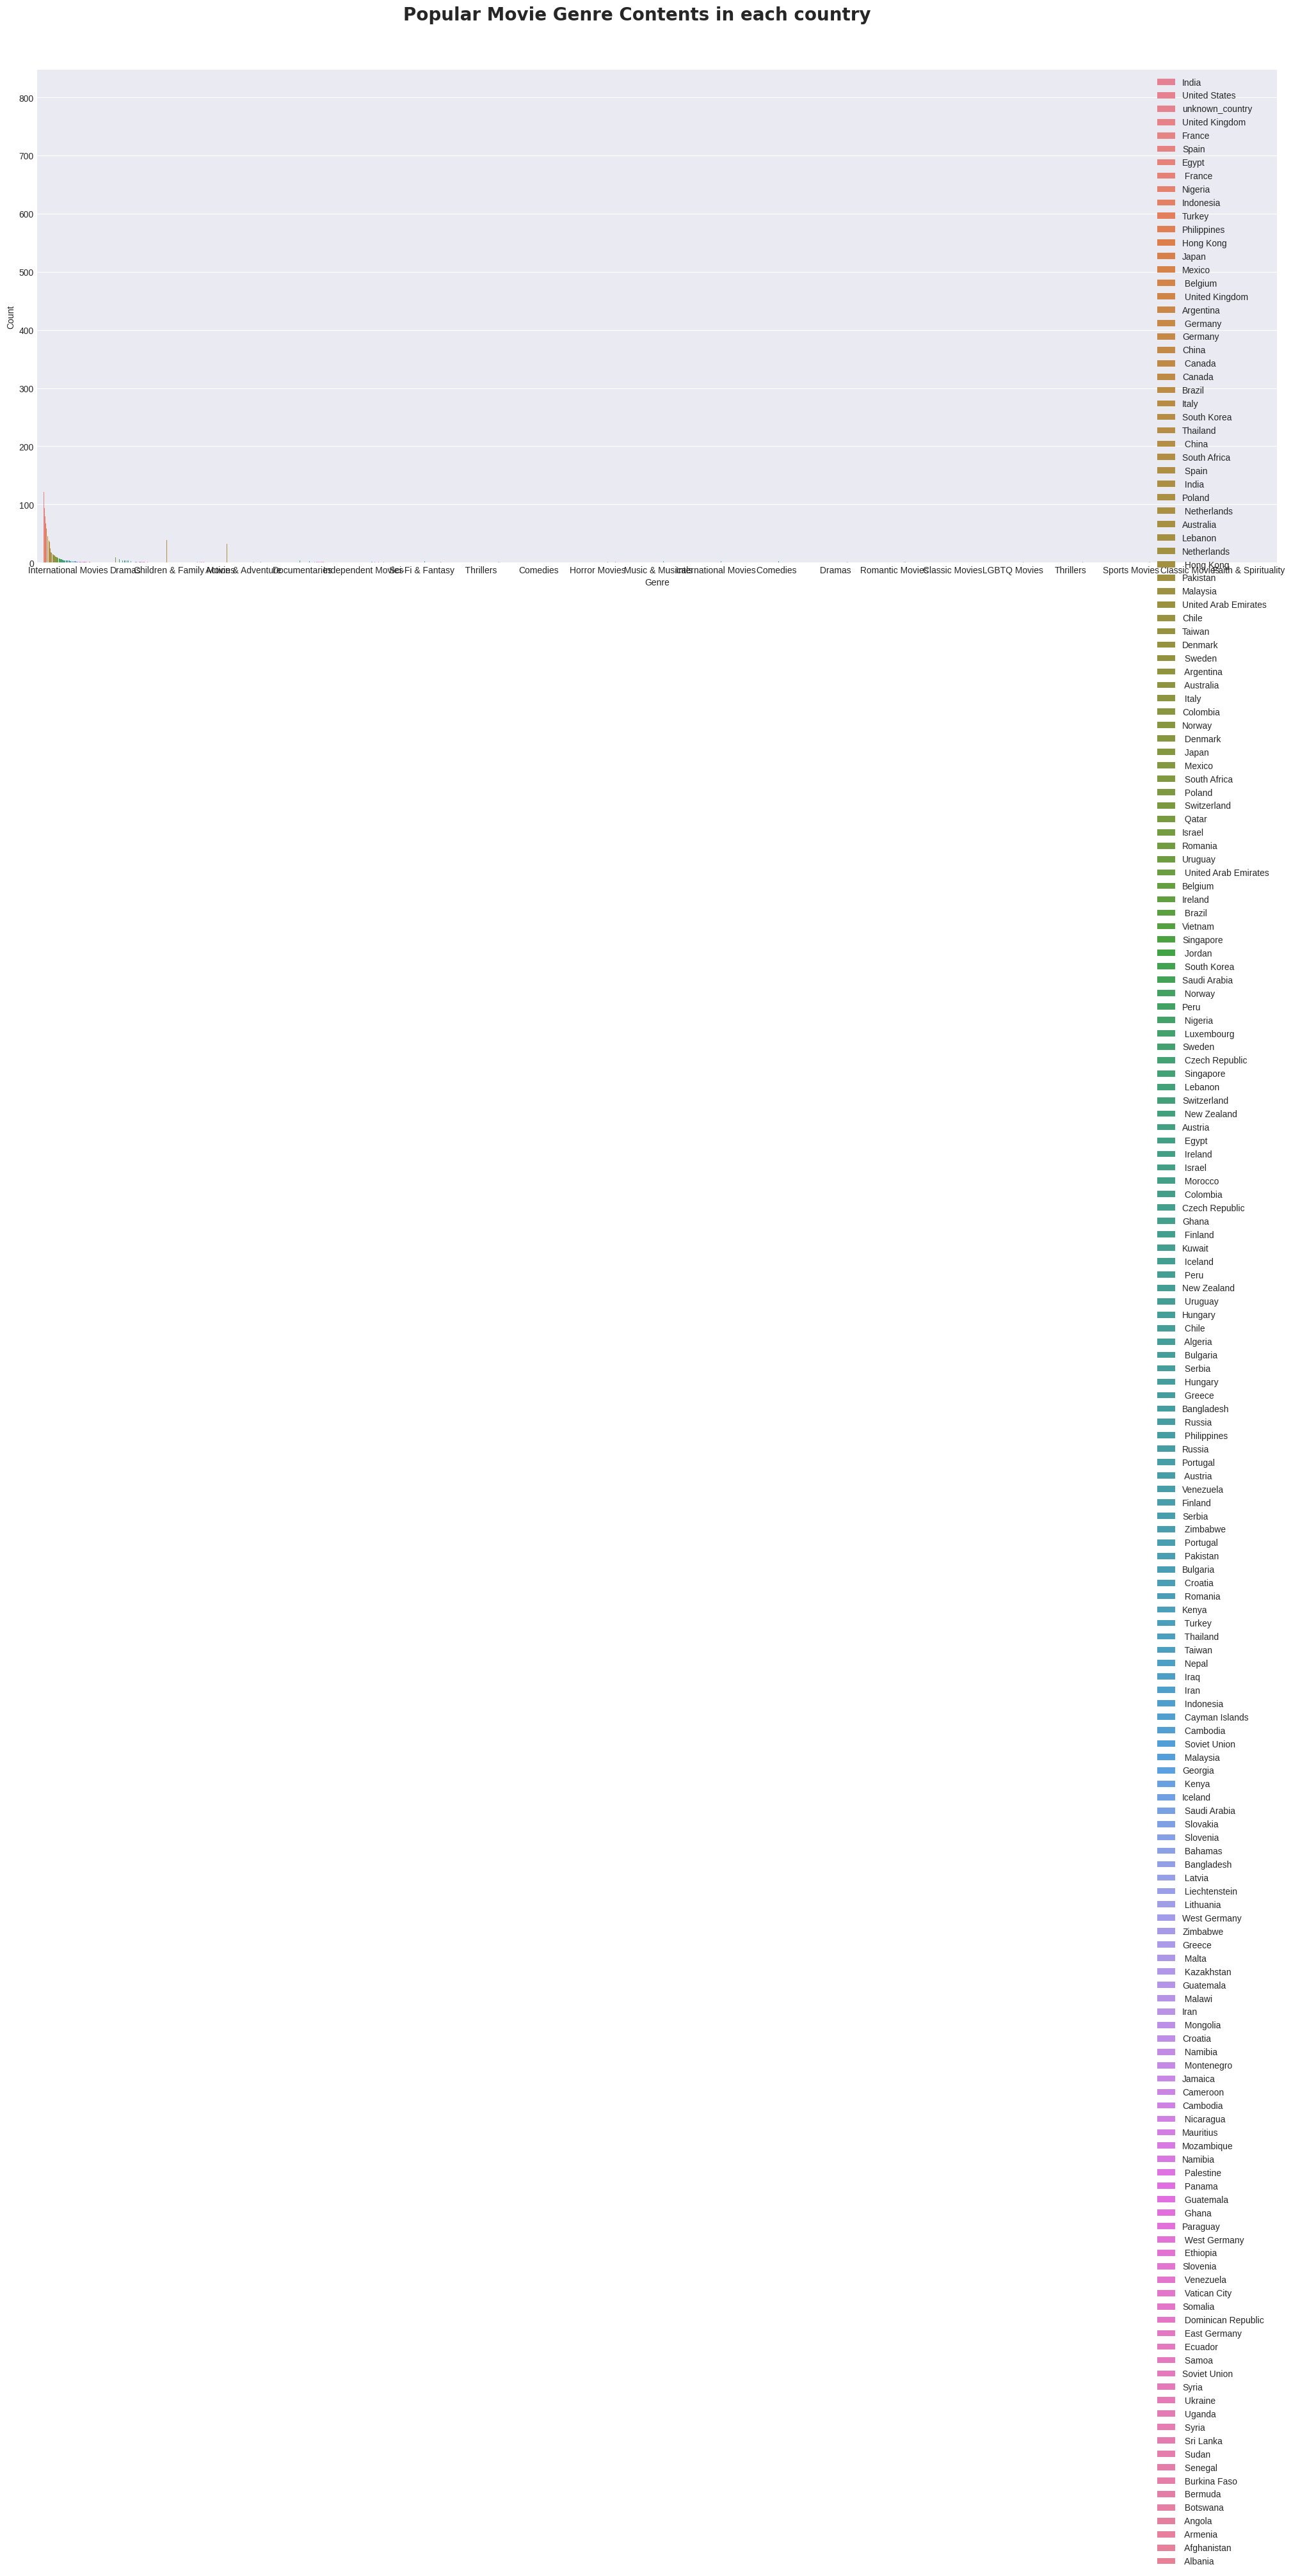

In [256]:
plt.figure(figsize=(25,10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')
plt.suptitle('Popular Movie Genre Contents in each country',fontsize=20,
             fontweight="bold",fontfamily='fantasy')
sns.barplot(cgdm,x='listed_in',y='show_id',hue='country')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


Q. How are contents distributed based on Runtime & Seasons ?

In [257]:
rdm=movies_data.groupby('runtime_in_mins')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
rdm

runtime_in_mins  show_id
84                90      152
88                94      146
87                93      146
91                97      146
85                91      144
..               ...      ...
200              233        1
201              237        1
202              253        1
203              273        1
204              312        1

[205 rows x 2 columns]

In [258]:
tvshows_data

show_id     type               title          director  \
1           s2  TV Show       Blood & Water  unknown_director   
2           s2  TV Show       Blood & Water  unknown_director   
3           s2  TV Show       Blood & Water  unknown_director   
4           s2  TV Show       Blood & Water  unknown_director   
5           s2  TV Show       Blood & Water  unknown_director   
...        ...      ...                 ...               ...   
201938   s8801  TV Show  Zindagi Gulzar Hai  unknown_director   
201939   s8801  TV Show  Zindagi Gulzar Hai  unknown_director   
202006   s8804  TV Show         Zombie Dumb  unknown_director   
202007   s8804  TV Show         Zombie Dumb  unknown_director   
202008   s8804  TV Show         Zombie Dumb  unknown_director   

                       cast          country date_added  release_year rating  \
1                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
2                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
3                Ama Qamata     South Africa 2021-09-24          2021  TV-MA   
4               Khosi Ngema     South Africa 2021-09-24          2021  TV-MA   
5               Khosi Ngema     South Africa 2021-09-24          2021  TV-MA   
...                     ...              ...        ...           ...    ...   
201938   Hina Khawaja Bayat         Pakistan 2016-12-15          2012  TV-PG   
201939   Hina Khawaja Bayat         Pakistan 2016-12-15          2012  TV-PG   
202006       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   
202007       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   
202008       unknown_actors  unknown_country 2019-07-01          2018  TV-Y7   

                     listed_in  year_added  month_added  no_of _seasons  
1       International TV Shows        2021            9               2  
2                    TV Dramas        2021            9               2  
3                 TV Mysteries        2021            9               2  
4       International TV Shows        2021            9               2  
5                    TV Dramas        2021            9               2  
...                        ...         ...          ...             ...  
201938       Romantic TV Shows        2016           12               1  
201939               TV Dramas        2016           12               1  
202006                Kids' TV        2019            7               2  
202007         Korean TV Shows        2019            7               2  
202008             TV Comedies        2019            7               2  

[56148 rows x 13 columns]

In [259]:
rdt=tvshows_data.groupby('no_of _seasons')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
rdt

no_of _seasons  show_id
0                1     1793
1                2      425
2                3      199
3                4       95
4                5       65
5                6       33
6                7       23
7                8       17
8                9        9
9               10        7
12              13        3
10              11        2
11              12        2
13              15        2
14              17        1

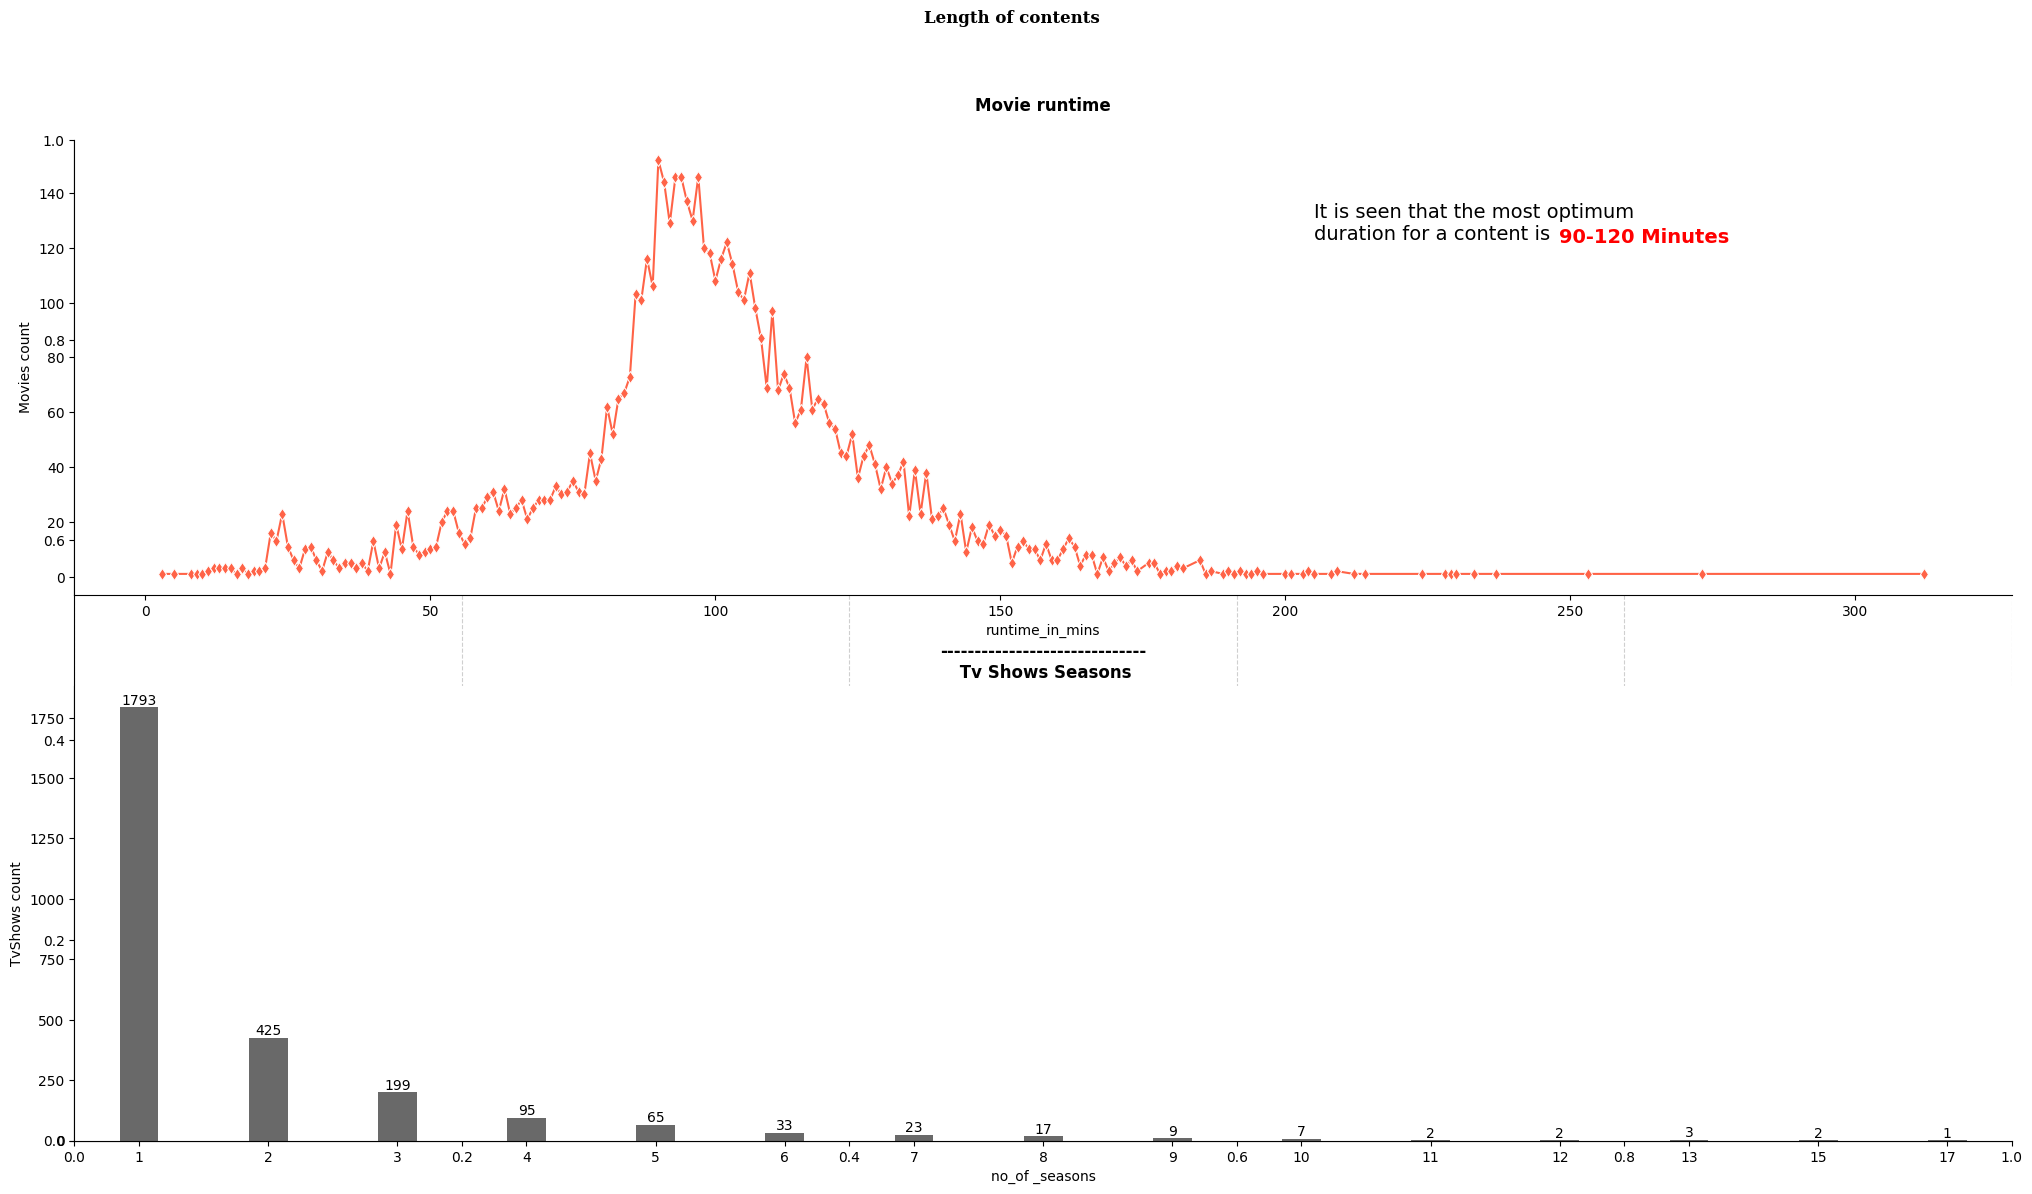

In [260]:
plt.figure(figsize=(25,13 ))
plt.style.use('default')
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Length of contents',fontsize=12,fontweight="bold",fontfamily='serif')
plt.subplot(2,1,1)
sns.lineplot(rdm,x='runtime_in_mins',y='show_id',color='tomato',marker='d')
sns.despine()
plt.title('Movie runtime\n' ,fontsize=12,fontweight="bold")
plt.ylabel('Movies count')
plt.text(205,123,'It is seen that the most optimum\nduration for a content is',
         fontsize=14,fontfamily='sans-serif')
plt.text(248,122,'90-120 Minutes',color='r',
         fontsize=14,fontfamily='fantasy',fontweight='bold')
plt.subplot(2,1,2)
a=sns.barplot(rdt , y='show_id' , x='no_of _seasons' , color='dimgrey' , width=0.3)
sns.despine()
plt.title('------------------------------\n Tv Shows Seasons',
          fontsize=12,fontweight="bold")
plt.ylabel('TvShows count')
for container in a.containers:
    a.bar_label(container)
plt.show()


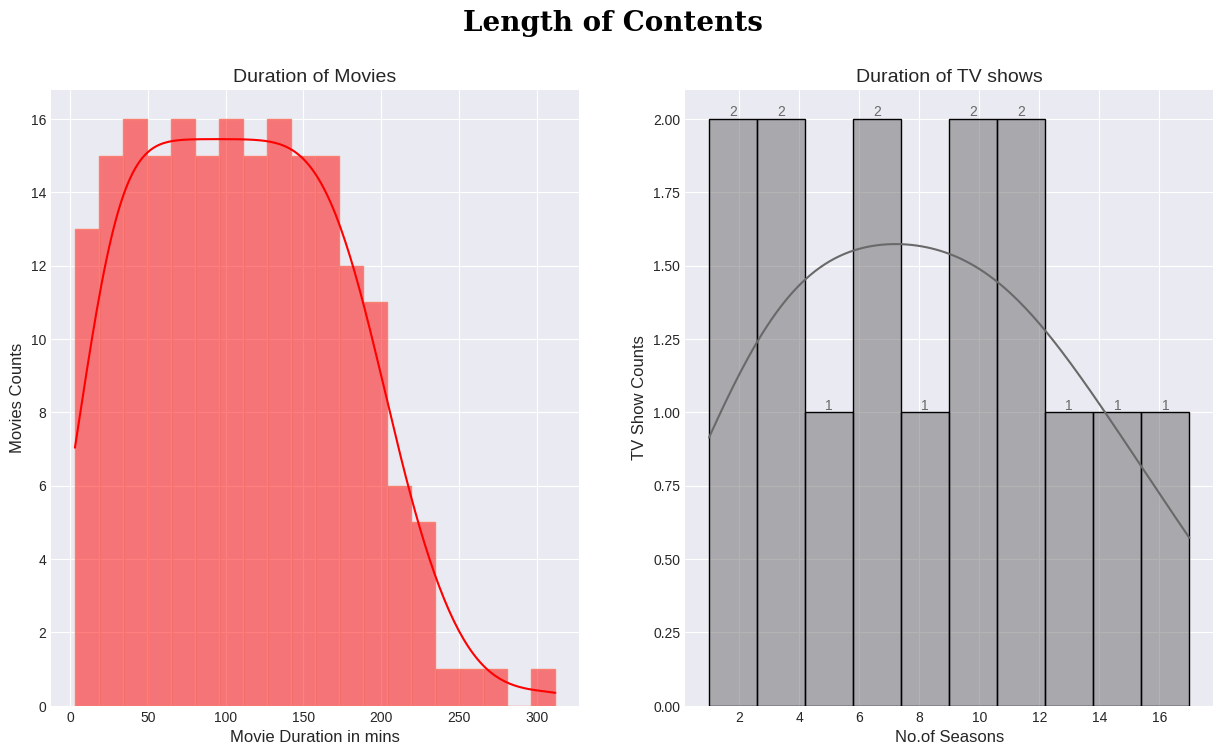

In [261]:
plt.figure(figsize=(15,8))
plt.suptitle('Length of Contents',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')

plt.subplot(1,2,1)
sns.histplot(data=rdm,x ='runtime_in_mins', bins = 20, color='red',
            kde = True, edgecolor = 'salmon')
plt.xlabel("Movie Duration in mins",fontsize=12)
plt.ylabel("Movies Counts", fontsize=12)
plt.title("Duration of Movies", fontsize=14)

plt.subplot(1,2,2)
b = sns.histplot(x = rdt['no_of _seasons'], bins = 10, kde = True,
             color='dimgrey' , edgecolor ='k')
b.bar_label(b.containers[0], label_type='edge',color='dimgrey')
plt.xlabel('No.of Seasons',fontsize=12)
plt.ylabel("TV Show Counts", fontsize=12)
plt.title("Duration of TV shows", fontsize=14)

plt.show()

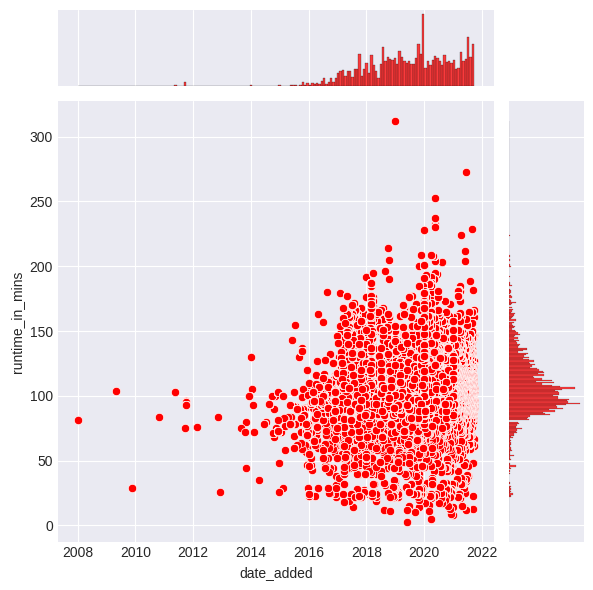

In [262]:
sns.jointplot(movies_data , x='date_added' , y='runtime_in_mins' , color='red')

plt.show()

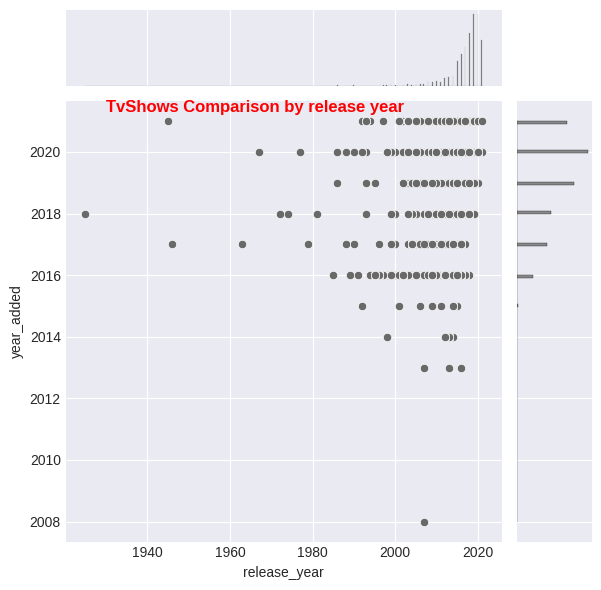

In [263]:
sns.jointplot(tvshows_data , x='release_year' , y='year_added' , color='dimgrey')
plt.text(1930,2021.3,'TvShows Comparison by release year',color='red',fontsize=12,fontweight='bold')
plt.show()

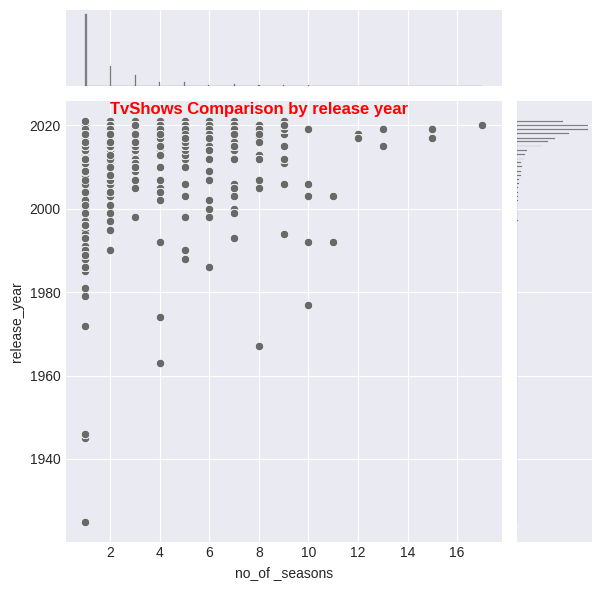

In [264]:
sns.jointplot(tvshows_data , y='release_year' , x='no_of _seasons' , color='dimgrey')
plt.text(2,2022.8,'TvShows Comparison by release year',
             color='red',fontsize=12,fontweight='bold')
plt.show()

Insights :

The majority of movies appear to have a runtime around 90-120 minutes .

This is evident from the peak in the red line plot having highlighted the maximum value (maximum movie count) using a large silver square marker

In the TV shows, there are a higher number of TV shows with a smaller number of seasons (e.g., 1-3 seasons), and the counts gradually decrease as the number of seasons increases.

Q. What are the ratings given for the contents uploaded on netflix ?

In [265]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating                 listed_in  year_added  month_added  \
0       PG-13             Documentaries        2021            9   
159        PG  Children & Family Movies        2021            9   
160        PG  Children & Family Movies        2021            9   
161        PG  Children & Family Movies        2021            9   
162        PG  Children & Family Movies        2021            9   
...       ...                       ...         ...          ...   
202060  TV-14      International Movies        2019            3   
202061  TV-14          Music & Musicals        2019            3   
202062  TV-14                    Dramas        2019            3   
202063  TV-14      International Movies        2019            3   
202064  TV-14          Music & Musicals        2019            3   

        runtime_in_mins  
0                    90  
159                  91  
160                  91  
161                  91  
162                  91  
...                 ...  
202060              111  
202061              111  
202062              111  
202063              111  
202064              111  

[145914 rows x 13 columns]

In [266]:
movies_data['rating'].nunique()

15

In [267]:
rm=movies_data.groupby('rating')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
rm

rating  show_id
8      TV-MA     2062
6      TV-14     1427
5          R      797
9      TV-PG      540
4      PG-13      490
3         PG      287
11     TV-Y7      139
10      TV-Y      131
7       TV-G      126
2         NR       75
0          G       41
12  TV-Y7-FV        5
1      NC-17        3
13        UR        3
14   unknown        2

In [268]:
tm=tvshows_data.groupby('rating')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
tm

rating  show_id
4     TV-MA     1145
2     TV-14      733
5     TV-PG      323
7     TV-Y7      195
6      TV-Y      176
3      TV-G       94
0        NR        5
1         R        2
9   unknown        2
8  TV-Y7-FV        1

<ipython-input-269-765f1a56aba0>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


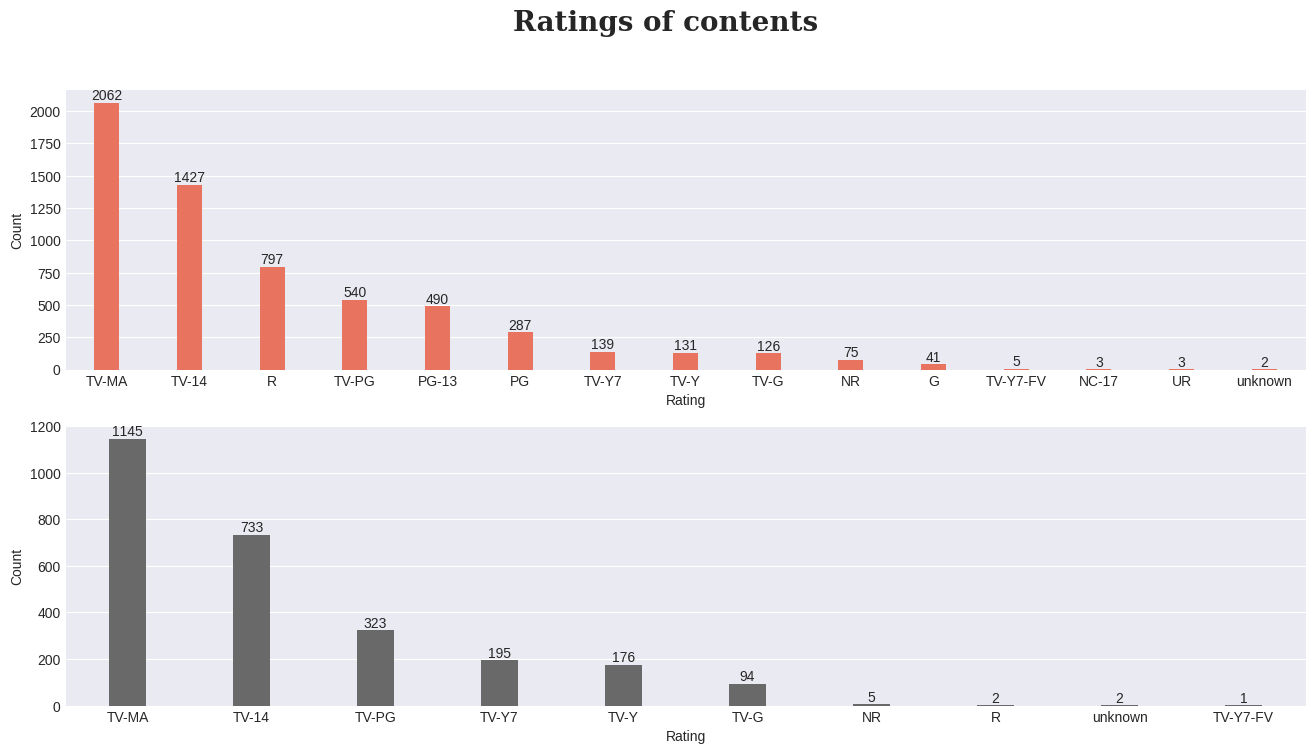

In [269]:
plt.figure(figsize=(16,8))
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')
plt.suptitle('Ratings of contents',fontsize=20,
             fontweight="bold",fontfamily='serif')
plt.subplot(2,1,1)
c1=sns.barplot(rm,x='rating',y='show_id',color='tomato',width=0.3)
plt.xlabel('Rating')
plt.ylabel('Count')

for container in c1.containers:
    c1.bar_label(container)
plt.subplot(2,1,2)

c2=sns.barplot(tm,x='rating',y='show_id',color='dimgrey',width=0.3)
plt.xlabel('Rating')
plt.ylabel('Count')
for container in c2.containers:
    c2.bar_label(container)
plt.legend(loc='upper right')

plt.show()



Insights :
MOVIES

The most common content rating is "TV-MA," with a total of 2,062 contents , typically associated with content intended for mature audiences.
"TV-14" is the second most common rating, with 1,427 content count indicating content suitable for viewers aged 14 and older.
"Restricted: R - Under 17 requires accompanying parent or adult guardian" is the third most common rating, with 797 titles.

TV SHOWS

The "TV-MA" rating with 1,145 titles suggests that a significant portion of the content is intended for mature audiences.
"TV-14" is the second most common rating, with 733 titles indicates that contents are for viewers aged 14 and older.
"TV-PG" - parental guidance is recommended stands third with 323 contents in Tv programs.

Q. Diversify the actors with more contents ?

In [270]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating                 listed_in  year_added  month_added  \
0       PG-13             Documentaries        2021            9   
159        PG  Children & Family Movies        2021            9   
160        PG  Children & Family Movies        2021            9   
161        PG  Children & Family Movies        2021            9   
162        PG  Children & Family Movies        2021            9   
...       ...                       ...         ...          ...   
202060  TV-14      International Movies        2019            3   
202061  TV-14          Music & Musicals        2019            3   
202062  TV-14                    Dramas        2019            3   
202063  TV-14      International Movies        2019            3   
202064  TV-14          Music & Musicals        2019            3   

        runtime_in_mins  
0                    90  
159                  91  
160                  91  
161                  91  
162                  91  
...                 ...  
202060              111  
202061              111  
202062              111  
202063              111  
202064              111  

[145914 rows x 13 columns]

In [271]:
movies_cast=movies_data.groupby('cast')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
movies_cast=movies_cast[movies_cast['cast']!='unknown_actors'][:20]
movies_cast

cast  show_id
1946         Anupam Kher       38
19235       Rupa Bhimani       27
16781            Om Puri       27
27290     Shah Rukh Khan       26
17025       Paresh Rawal       25
3109         Boman Irani       25
11219      Julie Tejwani       24
24247       Akshay Kumar       23
18089        Rajesh Kava       21
24181       Adam Sandler       20
24332   Amitabh Bachchan       20
15977   Naseeruddin Shah       20
11508     Kareena Kapoor       20
10211     Jigna Bhardwaj       19
23644     Yashpal Sharma       18
8109      Gulshan Grover       18
2305              Asrani       17
1409       Andrea Libman       17
10533        John Cleese       17
24243         Ajay Devgn       16

In [272]:
movies_cast.shape

(20, 2)

In [273]:
tv_cast=tvshows_data.groupby('cast')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
tv_cast=movies_cast[movies_cast['cast']!='unknown_actors'][:20]
tv_cast

cast  show_id
1946         Anupam Kher       38
19235       Rupa Bhimani       27
16781            Om Puri       27
27290     Shah Rukh Khan       26
17025       Paresh Rawal       25
3109         Boman Irani       25
11219      Julie Tejwani       24
24247       Akshay Kumar       23
18089        Rajesh Kava       21
24181       Adam Sandler       20
24332   Amitabh Bachchan       20
15977   Naseeruddin Shah       20
11508     Kareena Kapoor       20
10211     Jigna Bhardwaj       19
23644     Yashpal Sharma       18
8109      Gulshan Grover       18
2305              Asrani       17
1409       Andrea Libman       17
10533        John Cleese       17
24243         Ajay Devgn       16

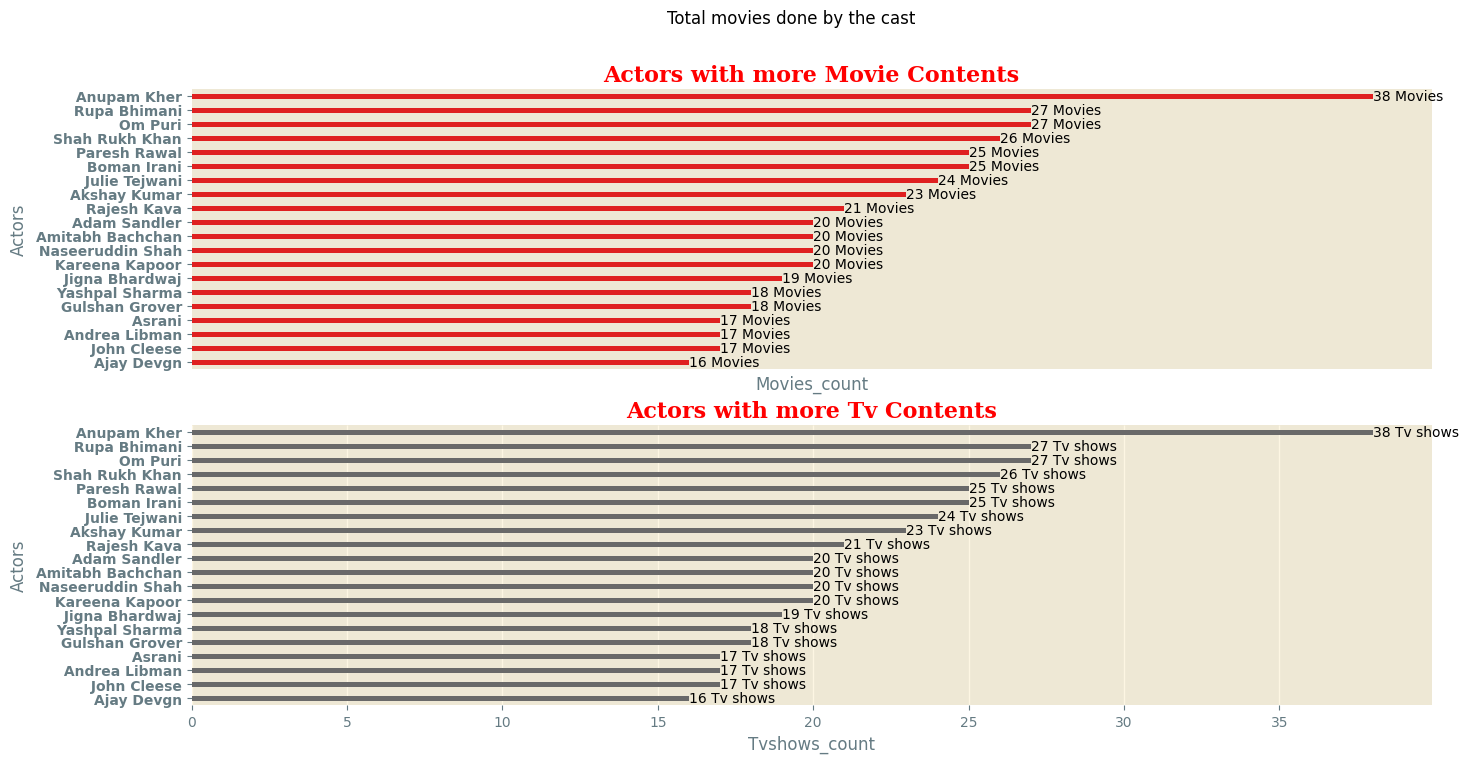

In [274]:
plt.figure(figsize=(16,8))
plt.style.use('default')
plt.style.use('Solarize_Light2')
plt.suptitle('Total movies done by the cast')
plt.subplot(2,1,1)
c1=sns.barplot(movies_cast,x='show_id',y='cast',color='red',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.xlabel('Movies_count',fontsize=12)
plt.ylabel('Actors')
plt.yticks(fontweight='bold')
plt.xticks([])
plt.title('Actors with more Movie Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='r')
for container in c1.containers:
    c1.bar_label(container, label_type='edge', fmt='%d Movies')

plt.subplot(2,1,2)

c2=sns.barplot(tv_cast,x='show_id',y='cast',color='dimgrey',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.xlabel('Tvshows_count',fontsize=12)
plt.ylabel('Actors')
plt.yticks(fontweight='bold')
plt.title('Actors with more Tv Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='r')
for container in c2.containers:
    c2.bar_label(container, label_type='edge', fmt='%d Tv shows')


plt.show()


Movies

Anupam Kher has appeared in the most movies (42) followed by Shah Rukh Khan follows closely with 35 movies, establishing himself as a prominent figure in the industry.

Naseeruddin Shah, Om Puri, and Akshay Kumar all have 30 movies, indicating their significant presence in the film industry.

Several actors and actresses, including Paresh Rawal, Julie Tejwani, Amitabh Bachchan, Rupa Bhimani, and Boman Irani, have been featured in a substantial number of movies (ranging from 27 to 28),

The list includes actors from different film industries and countries. For instance, Samuel L. Jackson and Nicolas Cage are prominent actors from
Hollywood, while others are from the Indian film industry.
This diversity in the list reflects the global nature of the entertainment industry.

TvShows

Takahiro Sakurai stands out as the Voice actor with the highest count of shows (25), indicating a prolific career in the field.

Yuki Kaji, Junichi Suwabe, Daisuke Ono, and Ai Kayano all have significant counts, ranging from 17 to 19 titles, demonstrating their prominence in the acting industry.

Both Japanese voice actors (seiyuu) and international actors like David Attenborough and Vincent Tong are recognized for their work in different contexts and markets.

Many of the voice actors listed are well-known and popular among anime and animation enthusiasts.

Q. How much contents are being delivered by directors to content library?

In [275]:
dm=movies_data.groupby('director')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
dm=dm[1:20]
dm

director  show_id
3817        Rajiv Chilaka       22
3864          Raúl Campos       18
234             Jan Suter       18
4428          Suhas Kadav       16
2308            Jay Karas       15
3066         Marcus Raboy       15
1289  Cathy Garcia-Molina       13
3134      Martin Scorsese       12
4839      Youssef Chahine       12
2305          Jay Chapman       12
4406     Steven Spielberg       11
1684     Don Michael Paul       10
4850       Yılmaz Erdoğan        9
1559         David Dhawan        9
4251      Shannon Hartman        9
2835          Lance Bangs        8
4652          Troy Miller        8
3976     Robert Rodriguez        8
2506           Johnnie To        8

In [276]:
tm=tvshows_data.groupby('director')['show_id'].nunique().reset_index().sort_values('show_id',ascending=False)
tm=tm[1:20]
tm

director  show_id
187               Ken Burns        3
86      Alastair Fothergill        3
173           Joe Berlinger        2
153             Hsu Fu-chun        2
255         Rob Seidenglanz        2
24    Gautham Vasudev Menon        2
155          Iginio Straffi        2
265             Shin Won-ho        2
183              Jung-ah Im        2
272             Stan Lathan        2
203             Luis Alfaro        1
202   Luis Alberto Restrepo        1
201           Lee Yoon-jung        1
200      Lee Toland Krieger        1
199            Lee Kyoungmi        1
198            Lee Eung-bok        1
197       Laurent Bouzereau        1
196            Lars Kaalund        1
195             Lai Chun-yu        1

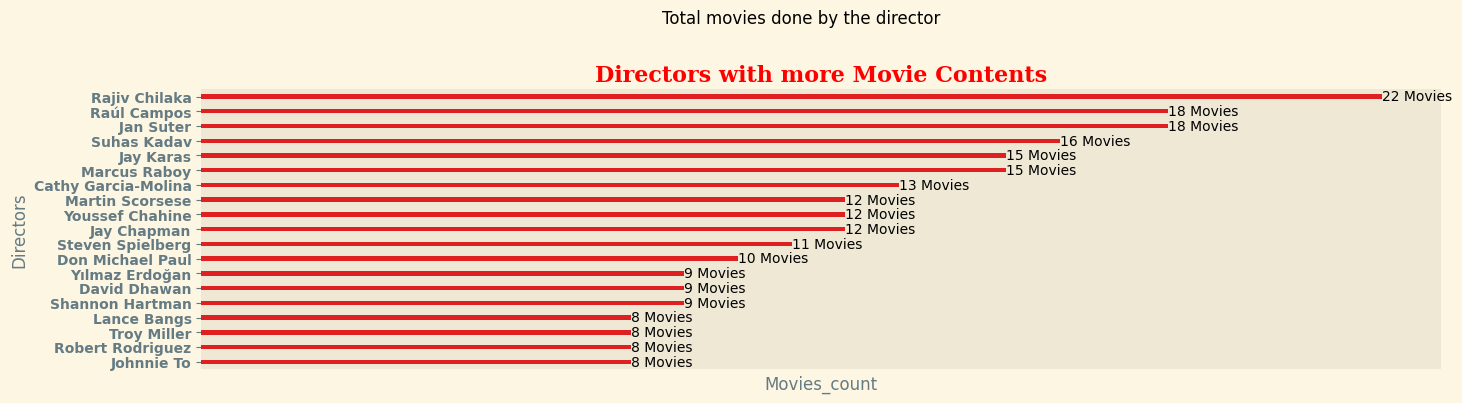

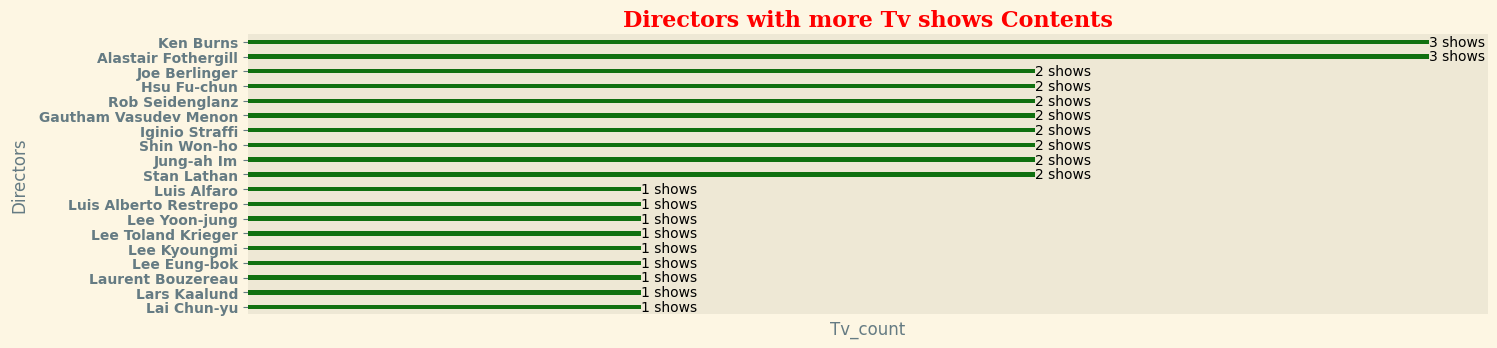

In [277]:
plt.figure(figsize=(16,8))
plt.style.use('default')
plt.style.use('Solarize_Light2')
plt.suptitle('Total movies done by the director')
plt.subplot(2,1,1)
c1=sns.barplot(dm,x='show_id',y='director',color='red',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.xlabel('Movies_count',fontsize=12)
plt.ylabel('Directors')
plt.yticks(fontweight='bold')
plt.xticks([])
plt.title('Directors with more Movie Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='r')
for container in c1.containers:
    c1.bar_label(container, label_type='edge', fmt='%d Movies')

plt.figure(figsize=(16,8))
plt.style.use('default')
plt.style.use('Solarize_Light2')
plt.subplot(2,1,1)
c2=sns.barplot(tm,x='show_id',y='director',color='g',width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.xlabel('Tv_count',fontsize=12)
plt.ylabel('Directors')
plt.yticks(fontweight='bold')
plt.xticks([])
plt.title('Directors with more Tv shows Contents',
          fontsize=16,fontweight="bold",fontfamily='serif',color='r')
for container in c2.containers:
    c2.bar_label(container, label_type='edge', fmt='%d shows')

plt.show()

Q. Who is the Actor-Directors worked with each other the most ?

In [278]:
ad=df1[['cast','director','type','show_id']]
ad=ad.loc[(ad['cast']!='unknown_actors')]
ad=ad.loc[ad['director']!='unknown_directors']
ad=ad.drop_duplicates().reset_index(drop=True)
ad


cast          director     type show_id
0                  Ama Qamata  unknown_director  TV Show      s2
1                 Khosi Ngema  unknown_director  TV Show      s2
2               Gail Mabalane  unknown_director  TV Show      s2
3              Thabang Molaba  unknown_director  TV Show      s2
4            Dillon Windvogel  unknown_director  TV Show      s2
...                       ...               ...      ...     ...
69842        Manish Chaudhary       Mozez Singh    Movie   s8807
69843            Meghna Malik       Mozez Singh    Movie   s8807
69844           Malkeet Rauni       Mozez Singh    Movie   s8807
69845          Anita Shabdish       Mozez Singh    Movie   s8807
69846   Chittaranjan Tripathy       Mozez Singh    Movie   s8807

[69847 rows x 4 columns]

In [279]:
nad = ad.groupby(['cast','director','type'])[['show_id']].nunique()
new_ad = nad.reset_index().sort_values(by='show_id',ascending=False)
new_ad['ad_pair'] = new_ad['cast']+'-'+new_ad['director']
new_ad

cast            director     type  show_id  \
49936    Takahiro Sakurai    unknown_director  TV Show       23   
25706       Julie Tejwani       Rajiv Chilaka    Movie       19   
41741         Rajesh Kava       Rajiv Chilaka    Movie       19   
44354        Rupa Bhimani       Rajiv Chilaka    Movie       18   
23211      Jigna Bhardwaj       Rajiv Chilaka    Movie       18   
...                   ...                 ...      ...      ...   
21870         Janyse Jaud    unknown_director  TV Show        1   
21871   Jaqueline Fleming     Michael Winnick    Movie        1   
21872       Jaran Ngamdee       Bin Bunluerit    Movie        1   
21873    Jared Abrahamson   Christopher Smith    Movie        1   
21858       January Jones  Jaume Collet-Serra    Movie        1   

                                   ad_pair  
49936    Takahiro Sakurai-unknown_director  
25706          Julie Tejwani-Rajiv Chilaka  
41741            Rajesh Kava-Rajiv Chilaka  
44354           Rupa Bhimani-Rajiv Chilaka  
23211         Jigna Bhardwaj-Rajiv Chilaka  
...                                    ...  
21870         Janyse Jaud-unknown_director  
21871    Jaqueline Fleming-Michael Winnick  
21872          Jaran Ngamdee-Bin Bunluerit  
21873   Jared Abrahamson-Christopher Smith  
21858     January Jones-Jaume Collet-Serra  

[63571 rows x 5 columns]

In [280]:
mad = new_ad[new_ad.type=='Movie']
tvad = new_ad[new_ad.type=='TV Show']

In [281]:
mad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46936 entries, 25706 to 21858
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      46936 non-null  object
 1   director  46936 non-null  object
 2   type      46936 non-null  object
 3   show_id   46936 non-null  int64 
 4   ad_pair   46936 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [282]:
mad = mad[['ad_pair','show_id']]
mad

ad_pair  show_id
25706          Julie Tejwani-Rajiv Chilaka       19
41741            Rajesh Kava-Rajiv Chilaka       19
44354           Rupa Bhimani-Rajiv Chilaka       18
23211         Jigna Bhardwaj-Rajiv Chilaka       18
63160           Vatsal Dubey-Rajiv Chilaka       16
...                                    ...      ...
21869                  Janyse Jaud-Sam Liu        1
21871    Jaqueline Fleming-Michael Winnick        1
21872          Jaran Ngamdee-Bin Bunluerit        1
21873   Jared Abrahamson-Christopher Smith        1
21858     January Jones-Jaume Collet-Serra        1

[46936 rows x 2 columns]

In [283]:
tvad = tvad[['ad_pair','show_id']]
tvad

ad_pair  show_id
49936       Takahiro Sakurai-unknown_director       23
25868         Junichi Suwabe-unknown_director       16
54844              Yuki Kaji-unknown_director       16
998                Ai Kayano-unknown_director       15
11178            Daisuke Ono-unknown_director       13
...                                       ...      ...
21904       Jarred Blakiston-unknown_director        1
21853         Janni Goslinga-unknown_director        1
21854        Jannik Schümann-unknown_director        1
21867   Janya Thanasawangkun-unknown_director        1
21870            Janyse Jaud-unknown_director        1

[16635 rows x 2 columns]

In [284]:
fmad = mad[:25].set_index('ad_pair')
ftvad = tvad[:25].set_index('ad_pair')

In [285]:
fmad

show_id
ad_pair                                    
 Julie Tejwani-Rajiv Chilaka             19
 Rajesh Kava-Rajiv Chilaka               19
 Rupa Bhimani-Rajiv Chilaka              18
 Jigna Bhardwaj-Rajiv Chilaka            18
Vatsal Dubey-Rajiv Chilaka               16
 Mousam-Rajiv Chilaka                    13
 Swapnil-Rajiv Chilaka                   13
 Fortune Feimster-unknown_director       11
David Spade-unknown_director             11
 London Hughes-unknown_director          10
Saurav Chakraborty-Suhas Kadav            8
 Kumiko Watanabe-Toshiya Shinohara        7
 Tamannaah Bhatia-S.S. Rajamouli          7
 Sathyaraj-S.S. Rajamouli                 7
Kappei Yamaguchi-Toshiya Shinohara        7
 Anushka Shetty-S.S. Rajamouli            7
Prabhas-S.S. Rajamouli                    7
 Nassar-S.S. Rajamouli                    7
 Houko Kuwashima-Toshiya Shinohara        7
 Satsuki Yukino-Toshiya Shinohara         7
 Koji Tsujitani-Toshiya Shinohara         7
 Rana Daggubati-S.S. Rajamouli            7
 Ramya Krishnan-S.S. Rajamouli            7
 Anupam Kher-David Dhawan                 6
Yılmaz Erdoğan-Yılmaz Erdoğan             6

In [286]:
ftvad

show_id
ad_pair                                            
 Takahiro Sakurai-unknown_director               23
 Junichi Suwabe-unknown_director                 16
 Yuki Kaji-unknown_director                      16
 Ai Kayano-unknown_director                      15
 Daisuke Ono-unknown_director                    13
 Yuichi Nakamura-unknown_director                13
 Yoshimasa Hosoya-unknown_director               13
 Takehito Koyasu-unknown_director                12
 Jun Fukuyama-unknown_director                   11
 Nobuhiko Okamoto-unknown_director               11
 Katsuyuki Konishi-unknown_director              11
David Attenborough-unknown_director              11
 Tomokazu Sugita-unknown_director                11
 Vincent Tong-unknown_director                   11
 Kana Hanazawa-unknown_director                  11
 Hiroshi Kamiya-unknown_director                 10
 Sayaka Ohara-unknown_director                   10
 Miyuki Sawashiro-unknown_director               10
 Yoko Hikasa-unknown_director                    10
 Mamoru Miyano-unknown_director                  10
 Kevin Michael Richardson-unknown_director        9
 Kari Wahlgren-unknown_director                   9
 Kenjiro Tsuda-unknown_director                   9
 Kohsuke Toriumi-unknown_director                 9
 Grey Griffin-unknown_director                    9

<ipython-input-287-94afc8dc8b8b>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a1.annotate((str(fmad.show_id[i])+' times'), (fmad.show_id[i]+0.47,i+0.5),
<ipython-input-287-94afc8dc8b8b>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ftvad.show_id[i]>1:
<ipython-input-287-94afc8dc8b8b>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a2.annotate((str(ftvad.show_id[i])+' times'), (ftvad.show_id[i]+0.07,i+0.2),


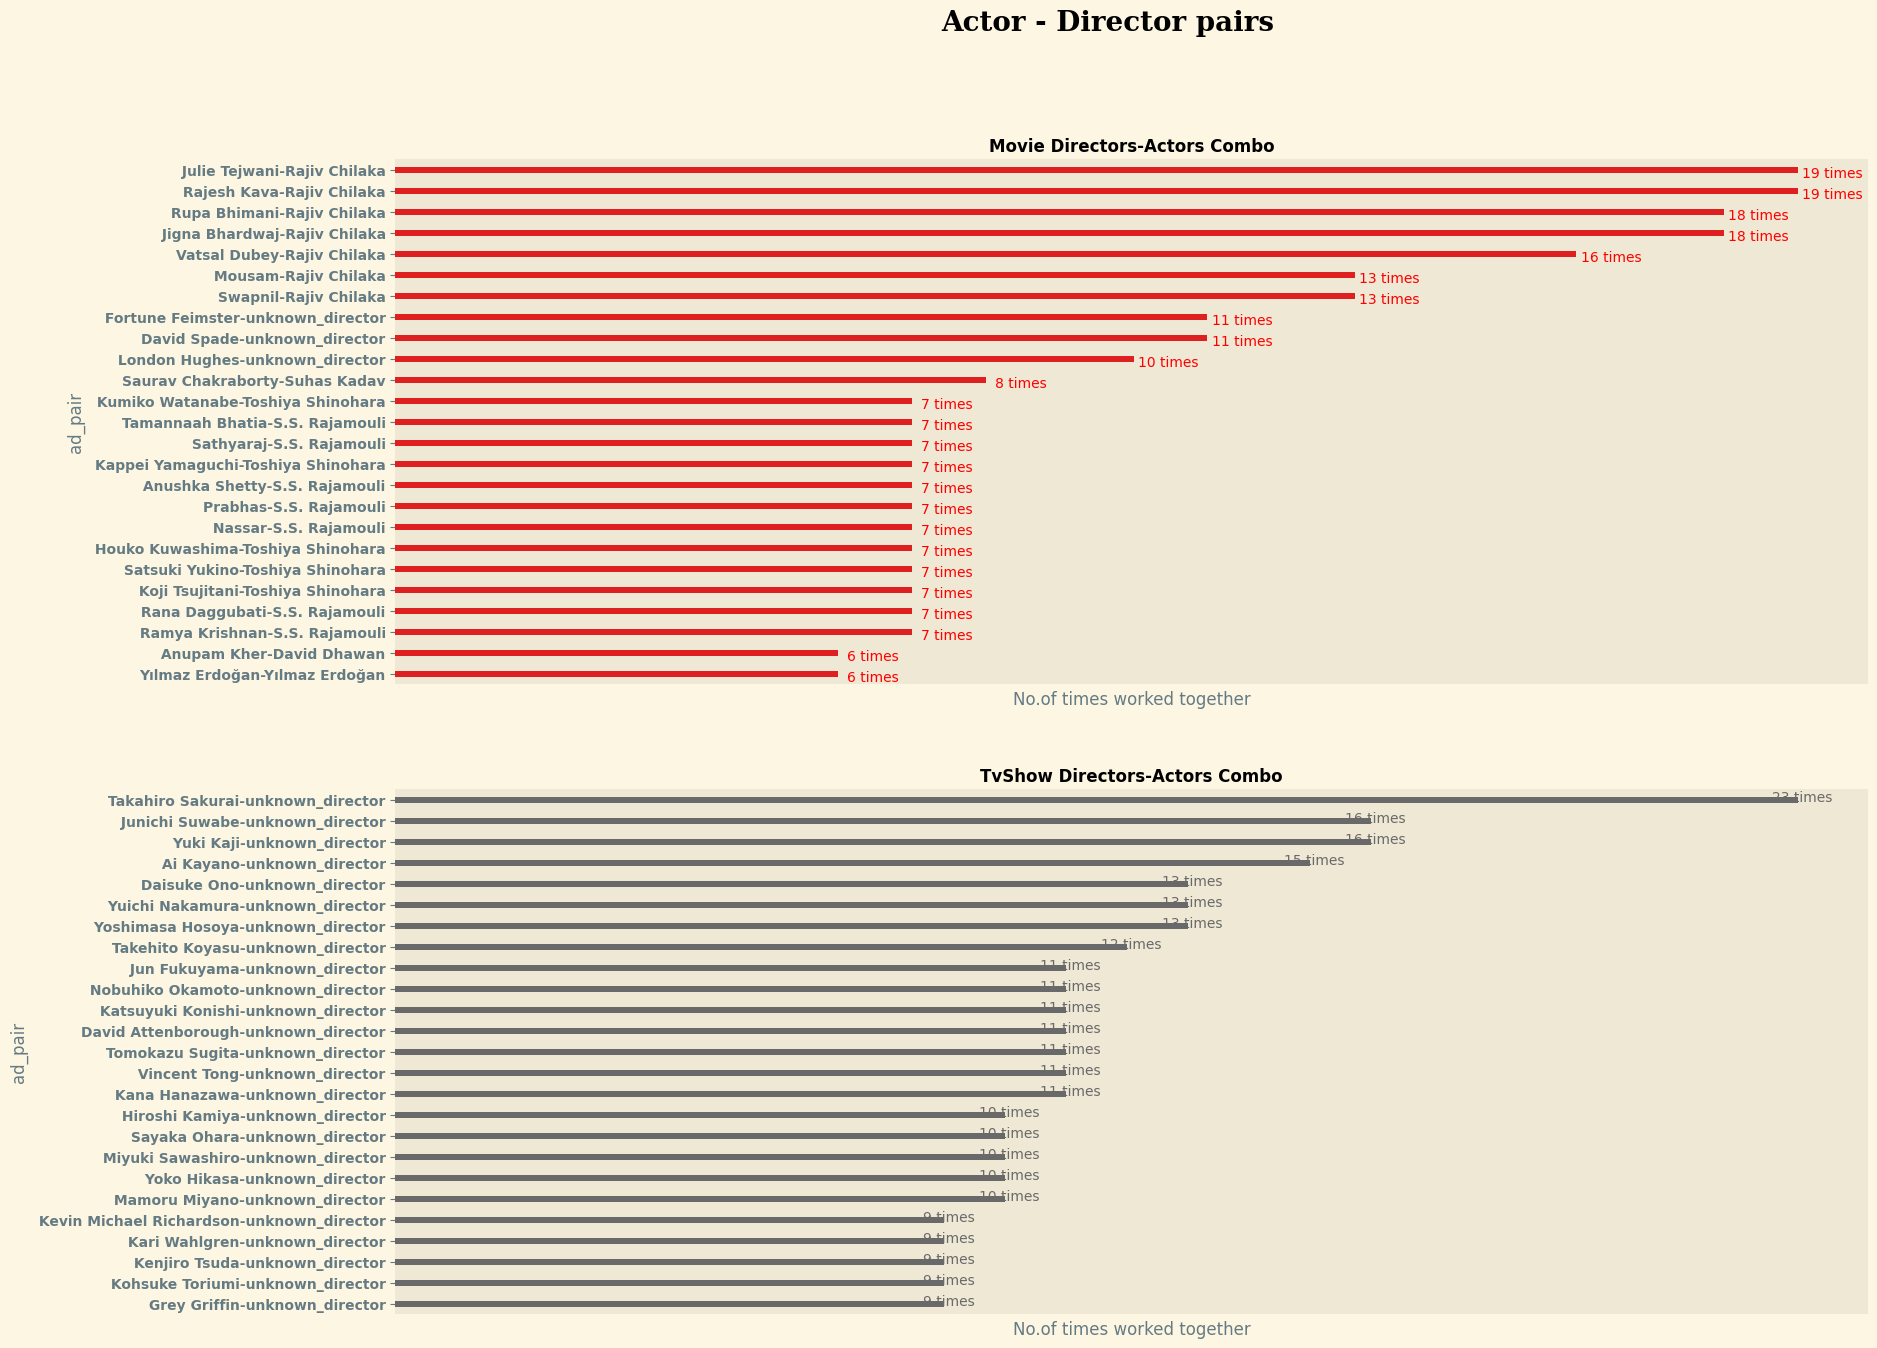

In [287]:
plt.figure(figsize=(19, 15))
plt.suptitle('Actor - Director pairs',fontsize=20,
                 fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('Solarize_Light2')

plt.subplot(2,1,1)
a1 = sns.barplot(y=fmad.index, x=fmad.show_id, color='red',width=0.3)
plt.title('Movie Directors-Actors Combo',fontsize=12,fontweight="bold")
sns.despine(left=True,bottom=True,trim=True)
plt.yticks(fontweight='bold')
plt.xticks([])
plt.xlabel('No.of times worked together')
for i in range(25):
    a1.annotate((str(fmad.show_id[i])+' times'), (fmad.show_id[i]+0.47,i+0.5),
                ha='center' , va='bottom' , color='red')

plt.subplot(2,1,2)
a2 = sns.barplot(ftvad , y=ftvad.index, x=ftvad.show_id, color='dimgrey',width=0.3)
plt.title('TvShow Directors-Actors Combo',fontsize=12,fontweight="bold")
sns.despine(left=True,bottom=True,trim=True)
plt.yticks(fontweight='bold')
plt.xticks([])
plt.xlabel('No.of times worked together')
for i in range(25):
    if ftvad.show_id[i]>1:
        a2.annotate((str(ftvad.show_id[i])+' times'), (ftvad.show_id[i]+0.07,i+0.2),
                ha='center' , va='bottom' , color='dimgrey')
    else:
        a2.annotate((str(ftvad.show_id[i])+' time'), (ftvad.show_id[i]+0.07,i+0.3),
                ha='center' , va='bottom' , color='dimgrey')

plt.show()

Insights :
Rajiv Chilaka,SS.Rajamouli&Gautam vasudev Menon are the most comfortable directors to work with and has the high number repeat rate by which we can interpret that they are success combo to repeat both contentwise and financial profit yielding.
similary David attenborough-Alister Fothergill and Houko Kuwashima-Toshiya Shinohara are repeat combos and yet they are successful repeat combos.

Q. What is the best time to launch a movie?

In [288]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating                 listed_in  year_added  month_added  \
0       PG-13             Documentaries        2021            9   
159        PG  Children & Family Movies        2021            9   
160        PG  Children & Family Movies        2021            9   
161        PG  Children & Family Movies        2021            9   
162        PG  Children & Family Movies        2021            9   
...       ...                       ...         ...          ...   
202060  TV-14      International Movies        2019            3   
202061  TV-14          Music & Musicals        2019            3   
202062  TV-14                    Dramas        2019            3   
202063  TV-14      International Movies        2019            3   
202064  TV-14          Music & Musicals        2019            3   

        runtime_in_mins  
0                    90  
159                  91  
160                  91  
161                  91  
162                  91  
...                 ...  
202060              111  
202061              111  
202062              111  
202063              111  
202064              111  

[145914 rows x 13 columns]

In [289]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145914 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   show_id          145914 non-null  object        
 1   type             145914 non-null  object        
 2   title            145914 non-null  object        
 3   director         145914 non-null  object        
 4   cast             145914 non-null  object        
 5   country          145914 non-null  object        
 6   date_added       145914 non-null  datetime64[ns]
 7   release_year     145914 non-null  int64         
 8   rating           145914 non-null  object        
 9   listed_in        145914 non-null  object        
 10  year_added       145914 non-null  int32         
 11  month_added      145914 non-null  int32         
 12  runtime_in_mins  145914 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
memory usage: 14.5+ MB


In [290]:
lm=movies_data[['show_id','title','date_added']].reset_index(drop=True)
lm

show_id                             title date_added
0           s1              Dick Johnson Is Dead 2021-09-25
1           s7  My Little Pony: A New Generation 2021-09-24
2           s7  My Little Pony: A New Generation 2021-09-24
3           s7  My Little Pony: A New Generation 2021-09-24
4           s7  My Little Pony: A New Generation 2021-09-24
...        ...                               ...        ...
145909   s8807                            Zubaan 2019-03-02
145910   s8807                            Zubaan 2019-03-02
145911   s8807                            Zubaan 2019-03-02
145912   s8807                            Zubaan 2019-03-02
145913   s8807                            Zubaan 2019-03-02

[145914 rows x 3 columns]

In [291]:
lm['date_added']=pd.to_datetime(lm['date_added'])
lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145914 entries, 0 to 145913
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   show_id     145914 non-null  object        
 1   title       145914 non-null  object        
 2   date_added  145914 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 3.3+ MB


In [292]:
lm['week_uploaded']=lm['date_added'].dt.isocalendar().week
lm['weekday']=lm['date_added'].dt.strftime('%A')
lm['month_uploaded']=lm['date_added'].dt.strftime('%B')
lm

show_id                             title date_added  week_uploaded  \
0           s1              Dick Johnson Is Dead 2021-09-25             38   
1           s7  My Little Pony: A New Generation 2021-09-24             38   
2           s7  My Little Pony: A New Generation 2021-09-24             38   
3           s7  My Little Pony: A New Generation 2021-09-24             38   
4           s7  My Little Pony: A New Generation 2021-09-24             38   
...        ...                               ...        ...            ...   
145909   s8807                            Zubaan 2019-03-02              9   
145910   s8807                            Zubaan 2019-03-02              9   
145911   s8807                            Zubaan 2019-03-02              9   
145912   s8807                            Zubaan 2019-03-02              9   
145913   s8807                            Zubaan 2019-03-02              9   

         weekday month_uploaded  
0       Saturday      September  
1         Friday      September  
2         Friday      September  
3         Friday      September  
4         Friday      September  
...          ...            ...  
145909  Saturday          March  
145910  Saturday          March  
145911  Saturday          March  
145912  Saturday          March  
145913  Saturday          March  

[145914 rows x 6 columns]

In [293]:
lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145914 entries, 0 to 145913
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         145914 non-null  object        
 1   title           145914 non-null  object        
 2   date_added      145914 non-null  datetime64[ns]
 3   week_uploaded   145914 non-null  UInt32        
 4   weekday         145914 non-null  object        
 5   month_uploaded  145914 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), object(4)
memory usage: 6.3+ MB


In [294]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
lm['month_uploaded']=pd.Categorical(lm['month_uploaded'], categories=month_order,ordered=True)
lm

show_id                             title date_added  week_uploaded  \
0           s1              Dick Johnson Is Dead 2021-09-25             38   
1           s7  My Little Pony: A New Generation 2021-09-24             38   
2           s7  My Little Pony: A New Generation 2021-09-24             38   
3           s7  My Little Pony: A New Generation 2021-09-24             38   
4           s7  My Little Pony: A New Generation 2021-09-24             38   
...        ...                               ...        ...            ...   
145909   s8807                            Zubaan 2019-03-02              9   
145910   s8807                            Zubaan 2019-03-02              9   
145911   s8807                            Zubaan 2019-03-02              9   
145912   s8807                            Zubaan 2019-03-02              9   
145913   s8807                            Zubaan 2019-03-02              9   

         weekday month_uploaded  
0       Saturday      September  
1         Friday      September  
2         Friday      September  
3         Friday      September  
4         Friday      September  
...          ...            ...  
145909  Saturday          March  
145910  Saturday          March  
145911  Saturday          March  
145912  Saturday          March  
145913  Saturday          March  

[145914 rows x 6 columns]

In [295]:
week_movie_release=lm.groupby('week_uploaded')['show_id'].nunique().reset_index().sort_values('week_uploaded',ascending=True)
week_movie_release

week_uploaded  show_id
0               1      316
1               2       78
2               3       81
3               4       56
4               5      135
5               6       64
6               7      106
7               8       72
8               9      207
9              10      107
10             11      115
11             12       67
12             13      174
13             14      123
14             15      100
15             16      124
16             17      109
17             18      173
18             19       73
19             20       85
20             21       76
21             22      146
22             23      112
23             24       89
24             25      101
25             26      195
26             27      154
27             28       89
28             29       94
29             30      116
30             31      185
31             32       73
32             33      104
33             34      102
34             35      189
35             36       97
36             37      113
37             38       88
38             39      111
39             40      215
40             41       84
41             42       90
42             43       88
43             44      243
44             45       61
45             46       83
46             47       85
47             48      139
48             49       95
49             50      119
50             51       86
51             52       80
52             53       61

In [296]:
monthly_movie_release=lm.groupby('month_uploaded')['show_id'].nunique().reset_index().sort_values('month_uploaded',ascending=True)
monthly_movie_release

<ipython-input-296-5378d18b7ac9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_movie_release=lm.groupby('month_uploaded')['show_id'].nunique().reset_index().sort_values('month_uploaded',ascending=True)


month_uploaded  show_id
0         January      546
1        February      382
2           March      529
3           April      549
4             May      439
5            June      492
6            July      565
7          August      518
8       September      518
9         October      545
10       November      498
11       December      547

In [297]:
lm

show_id                             title date_added  week_uploaded  \
0           s1              Dick Johnson Is Dead 2021-09-25             38   
1           s7  My Little Pony: A New Generation 2021-09-24             38   
2           s7  My Little Pony: A New Generation 2021-09-24             38   
3           s7  My Little Pony: A New Generation 2021-09-24             38   
4           s7  My Little Pony: A New Generation 2021-09-24             38   
...        ...                               ...        ...            ...   
145909   s8807                            Zubaan 2019-03-02              9   
145910   s8807                            Zubaan 2019-03-02              9   
145911   s8807                            Zubaan 2019-03-02              9   
145912   s8807                            Zubaan 2019-03-02              9   
145913   s8807                            Zubaan 2019-03-02              9   

         weekday month_uploaded  
0       Saturday      September  
1         Friday      September  
2         Friday      September  
3         Friday      September  
4         Friday      September  
...          ...            ...  
145909  Saturday          March  
145910  Saturday          March  
145911  Saturday          March  
145912  Saturday          March  
145913  Saturday          March  

[145914 rows x 6 columns]

In [298]:
lm_pivot=lm.pivot_table(index='month_uploaded',columns='weekday',values='show_id',aggfunc=pd.Series.nunique)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday','Sunday']
lm_pivot=lm_pivot[day_order]
lm_pivot

<ipython-input-298-eea61dc9ba56>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  lm_pivot=lm.pivot_table(index='month_uploaded',columns='weekday',values='show_id',aggfunc=pd.Series.nunique)


weekday         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month_uploaded                                                                
January             86       84        139        44     134        26      33
February            27       38         74        60     124        31      28
March               33       55         52       152     176        26      35
April               59       62         90        74     145        66      53
May                 54       81         47        70     111        56      20
June                43       53         92       109     112        62      21
July                63       50         65       132     117        45      93
August              45       67         83       119     103        46      55
September           36       70        109        68     129        59      47
October            101      107         39        57     119        50      72
November            30       47         80       110     168        29      34
December            50      137         36        58     127        61      78

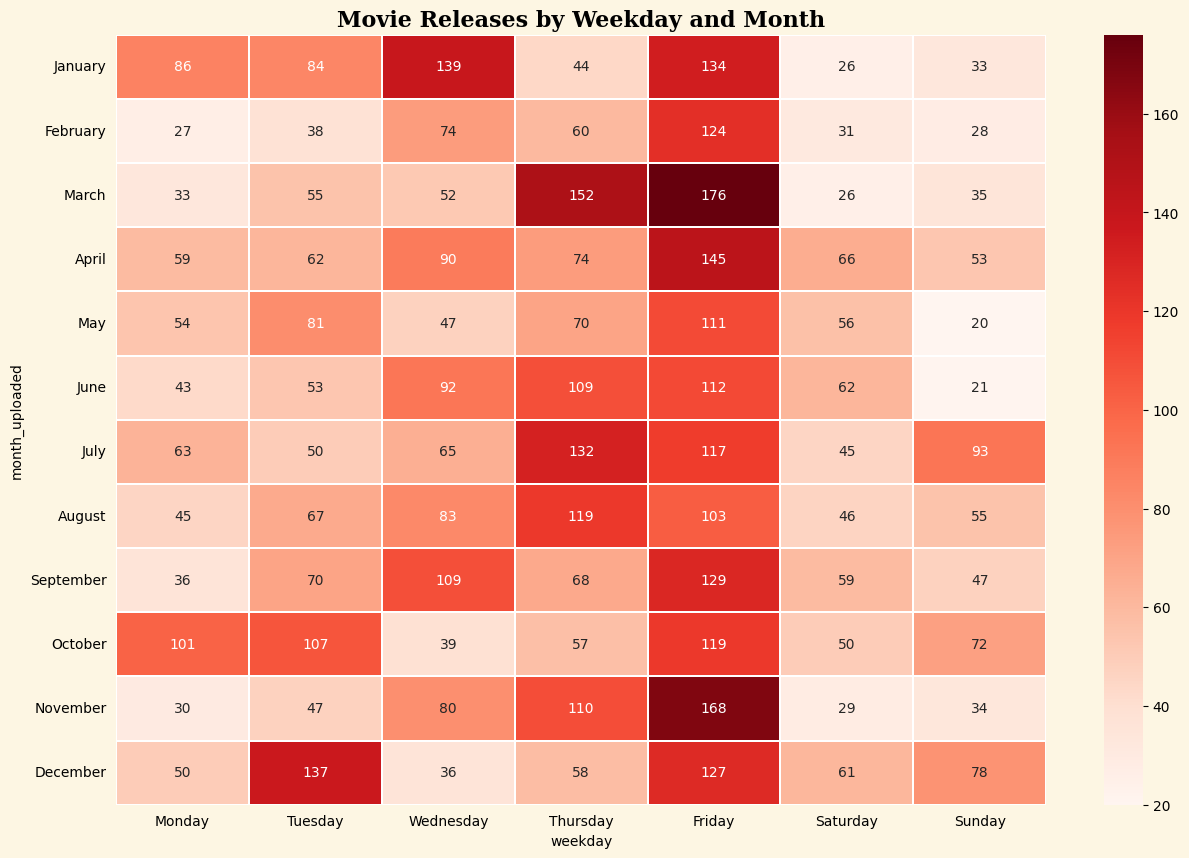

In [299]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(lm_pivot,annot=True,cmap='Reds',fmt='d' , linewidth=0.1)
plt.title("Movie Releases by Weekday and Month",
              fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

Q. What is the best time to launch a Tvshow ?

In [300]:
lt=tvshows_data[['date_added','show_id','title']]
lt=clt.reset_index(drop=True)
lt

date_added show_id               title
0     2021-09-24      s2       Blood & Water
1     2021-09-24      s2       Blood & Water
2     2021-09-24      s2       Blood & Water
3     2021-09-24      s2       Blood & Water
4     2021-09-24      s2       Blood & Water
...          ...     ...                 ...
56143 2016-12-15   s8801  Zindagi Gulzar Hai
56144 2016-12-15   s8801  Zindagi Gulzar Hai
56145 2019-07-01   s8804         Zombie Dumb
56146 2019-07-01   s8804         Zombie Dumb
56147 2019-07-01   s8804         Zombie Dumb

[56148 rows x 3 columns]

In [301]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56148 entries, 0 to 56147
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_added  56148 non-null  datetime64[ns]
 1   show_id     56148 non-null  object        
 2   title       56148 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ MB


In [302]:
lt['week_uploaded']=lt['date_added'].dt.isocalendar().week
lt['weekday']=lt['date_added'].dt.strftime('%A')
lt['month_uploaded']=lt['date_added'].dt.strftime('%B')
lt

date_added show_id               title  week_uploaded   weekday  \
0     2021-09-24      s2       Blood & Water             38    Friday   
1     2021-09-24      s2       Blood & Water             38    Friday   
2     2021-09-24      s2       Blood & Water             38    Friday   
3     2021-09-24      s2       Blood & Water             38    Friday   
4     2021-09-24      s2       Blood & Water             38    Friday   
...          ...     ...                 ...            ...       ...   
56143 2016-12-15   s8801  Zindagi Gulzar Hai             50  Thursday   
56144 2016-12-15   s8801  Zindagi Gulzar Hai             50  Thursday   
56145 2019-07-01   s8804         Zombie Dumb             27    Monday   
56146 2019-07-01   s8804         Zombie Dumb             27    Monday   
56147 2019-07-01   s8804         Zombie Dumb             27    Monday   

      month_uploaded  
0          September  
1          September  
2          September  
3          September  
4          September  
...              ...  
56143       December  
56144       December  
56145           July  
56146           July  
56147           July  

[56148 rows x 6 columns]

In [303]:
lt['month_uploaded']=pd.Categorical(lt['month_uploaded'], categories=month_order,ordered=True)
lt

date_added show_id               title  week_uploaded   weekday  \
0     2021-09-24      s2       Blood & Water             38    Friday   
1     2021-09-24      s2       Blood & Water             38    Friday   
2     2021-09-24      s2       Blood & Water             38    Friday   
3     2021-09-24      s2       Blood & Water             38    Friday   
4     2021-09-24      s2       Blood & Water             38    Friday   
...          ...     ...                 ...            ...       ...   
56143 2016-12-15   s8801  Zindagi Gulzar Hai             50  Thursday   
56144 2016-12-15   s8801  Zindagi Gulzar Hai             50  Thursday   
56145 2019-07-01   s8804         Zombie Dumb             27    Monday   
56146 2019-07-01   s8804         Zombie Dumb             27    Monday   
56147 2019-07-01   s8804         Zombie Dumb             27    Monday   

      month_uploaded  
0          September  
1          September  
2          September  
3          September  
4          September  
...              ...  
56143       December  
56144       December  
56145           July  
56146           July  
56147           July  

[56148 rows x 6 columns]

In [304]:
week_Tvs_release=lt.groupby('week_uploaded')['show_id'].nunique().reset_index().sort_values('week_uploaded',ascending=True)
week_Tvs_release

week_uploaded  show_id
0               1      150
1               2       26
2               3       31
3               4       31
4               5       68
5               6       33
6               7       41
7               8       37
8               9       46
9              10       28
10             11       46
11             12       40
12             13       73
13             14       48
14             15       50
15             16       34
16             17       45
17             18       60
18             19       43
19             20       44
20             21       39
21             22       56
22             23       39
23             24       75
24             25       42
25             26       69
26             27       85
27             28       40
28             29       44
29             30       43
30             31       79
31             32       49
32             33       47
33             34       40
34             35       73
35             36       44
36             37       67
37             38       50
38             39       55
39             40       69
40             41       31
41             42       45
42             43       28
43             44       67
44             45       36
45             46       51
46             47       35
47             48       56
48             49       44
49             50       65
50             51       48
51             52       50
52             53       41

In [305]:
monthly_Tvs_release=lt.groupby('month_uploaded')['show_id'].nunique().reset_index().sort_values('month_uploaded',ascending=True)
monthly_Tvs_release

<ipython-input-305-4be0fce6b8c8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_Tvs_release=lt.groupby('month_uploaded')['show_id'].nunique().reset_index().sort_values('month_uploaded',ascending=True)


month_uploaded  show_id
0         January      279
1        February      175
2           March      205
3           April      209
4             May      187
5            June      232
6            July      254
7          August      230
8       September      246
9         October      210
10       November      199
11       December      250

In [306]:
lt_pivot=lt.pivot_table(index='month_uploaded',columns='weekday',values='show_id',aggfunc=pd.Series.nunique)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday','Sunday']
lt_pivot=lt_pivot[day_order]
lt_pivot

<ipython-input-306-1037b45f7df0>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  lt_pivot=lt.pivot_table(index='month_uploaded',columns='weekday',values='show_id',aggfunc=pd.Series.nunique)


weekday         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month_uploaded                                                                
January             13       19        128        19      85         5      10
February            20       13         28        27      63        17       7
March               11       25         32        22      88        16      11
April               20       20         38        38      58        21      14
May                 21       26         25        15      74        17       9
June                22       16         35        29      77        47       6
July                22       50         32        29      82        29      10
August              23       41         30        26      80        18      12
September           13       29         44        34      87        15      24
October             19       25         21        35      64        26      20
November             6       29         27        21      85        11      20
December            27       37         28        39      67        24      28

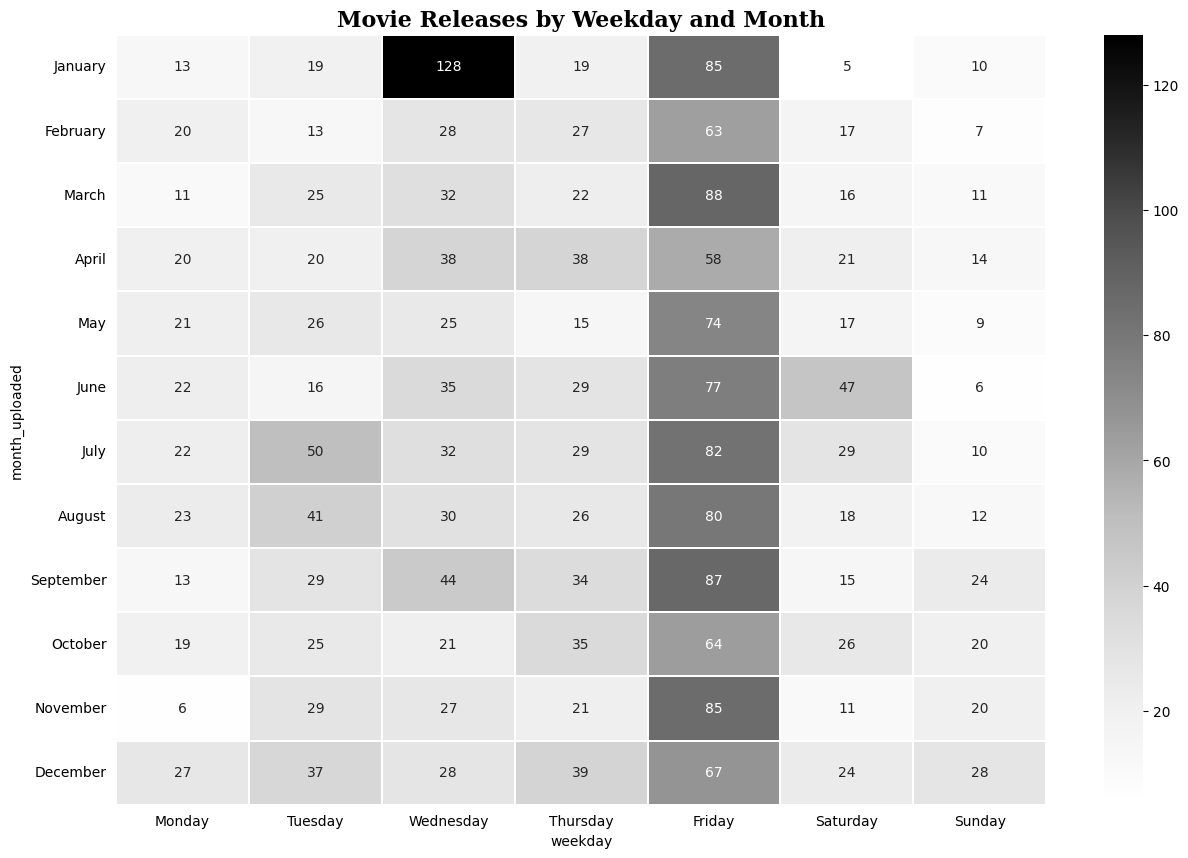

In [307]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(lt_pivot,annot=True,cmap='Greys',fmt='d' , linewidth=0.1)
plt.title("Movie Releases by Weekday and Month",
              fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

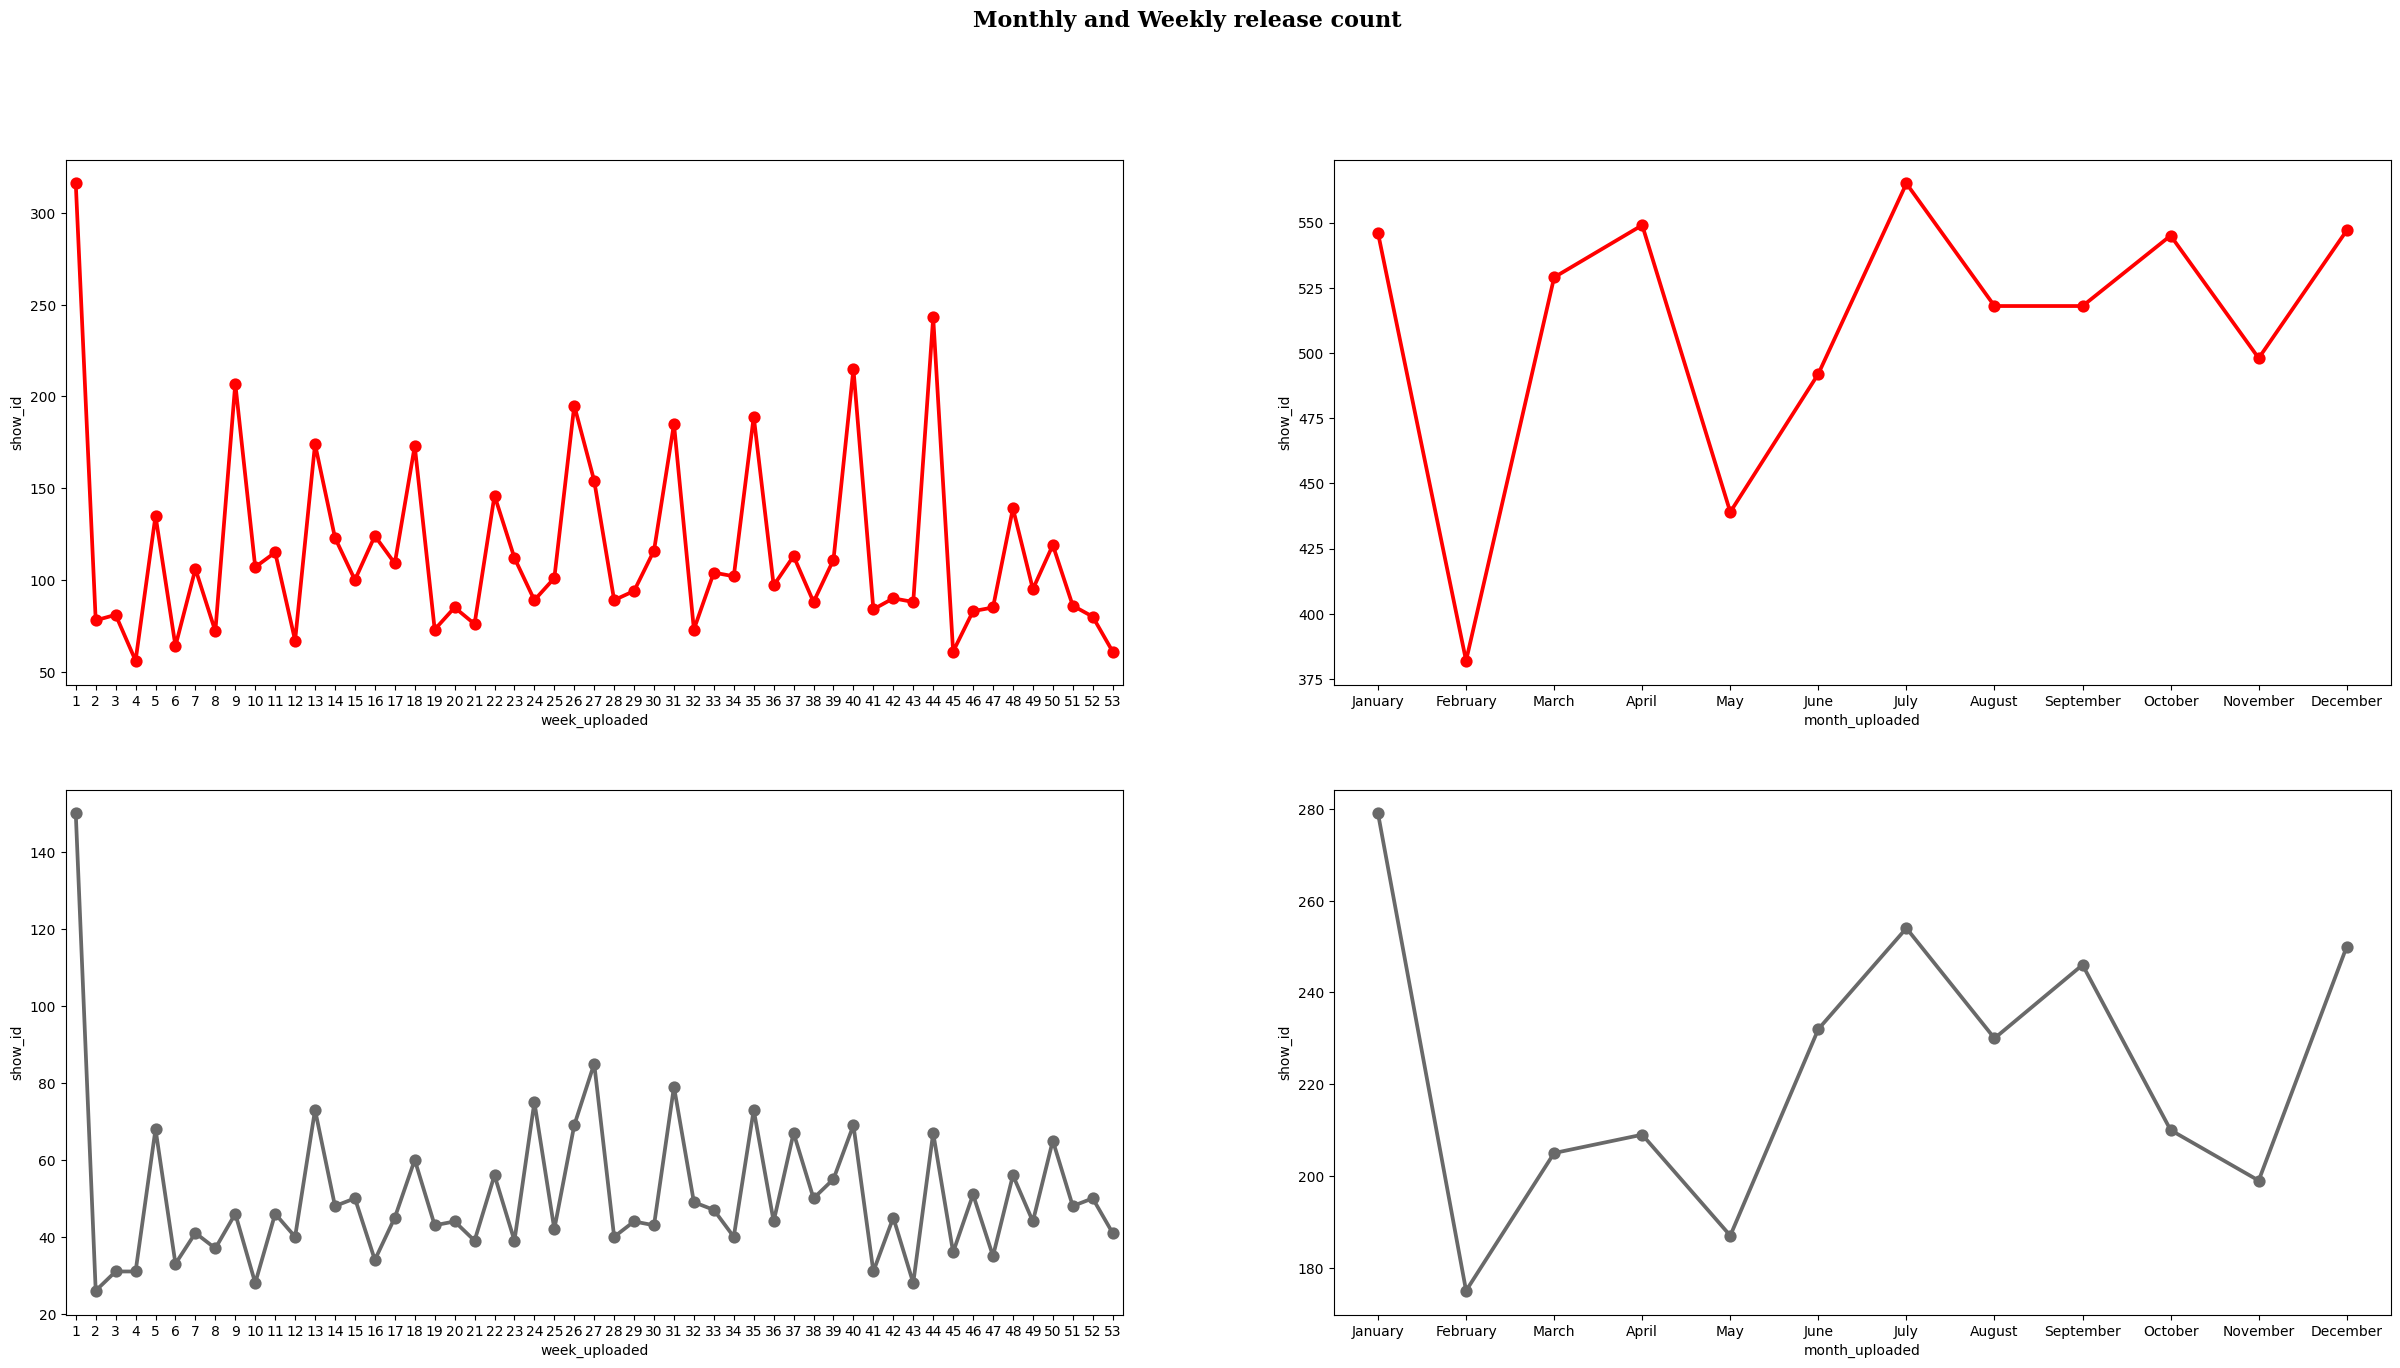

In [308]:
plt.figure(figsize=(30, 15))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
plt.suptitle("Monthly and Weekly release count ",fontsize=16,fontweight='bold',fontfamily='serif')

plt.subplot(2,2,1)
sns.pointplot(week_movie_release,x='week_uploaded',y='show_id',color='red')

plt.subplot(2,2,2)
sns.pointplot(monthly_movie_release,x='month_uploaded',y='show_id',color='red')

plt.subplot(2,2,3)
sns.pointplot(week_Tvs_release,x='week_uploaded',y='show_id',color='dimgrey')

plt.subplot(2,2,4)
sns.pointplot(monthly_Tvs_release,x='month_uploaded',y='show_id',color='dimgrey')

plt.show()


Insights :

The best time to launch the Movie is on weekends FRIDAY,SATURDAY&SUNDAY.
similary , Releasing on the occassional festivities would attract more audiences.
December,January haas very high amount of releases because of the festivities and occasions.
December month weeks like 50,51,52,53,1 are having the number collated. Hence the downfall in the december month weeks.

Q. Find After how many days the contents will be added to Netflix after the release date?

In [309]:
df1

show_id     type                 title          director  \
0           s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1           s2  TV Show         Blood & Water  unknown_director   
2           s2  TV Show         Blood & Water  unknown_director   
3           s2  TV Show         Blood & Water  unknown_director   
4           s2  TV Show         Blood & Water  unknown_director   
...        ...      ...                   ...               ...   
202060   s8807    Movie                Zubaan       Mozez Singh   
202061   s8807    Movie                Zubaan       Mozez Singh   
202062   s8807    Movie                Zubaan       Mozez Singh   
202063   s8807    Movie                Zubaan       Mozez Singh   
202064   s8807    Movie                Zubaan       Mozez Singh   

                          cast        country date_added  release_year rating  \
0               unknown_actors  United States 2021-09-25          2020  PG-13   
1                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
2                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
3                   Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
4                  Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                        ...            ...        ...           ...    ...   
202060          Anita Shabdish          India 2019-03-02          2015  TV-14   
202061          Anita Shabdish          India 2019-03-02          2015  TV-14   
202062   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202063   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
202064   Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

         duration               listed_in  \
0          90 min           Documentaries   
1       2 Seasons  International TV Shows   
2       2 Seasons               TV Dramas   
3       2 Seasons            TV Mysteries   
4       2 Seasons  International TV Shows   
...           ...                     ...   
202060    111 min    International Movies   
202061    111 min        Music & Musicals   
202062    111 min                  Dramas   
202063    111 min    International Movies   
202064    111 min        Music & Musicals   

                                              description  year_added  \
0       As her father nears the end of his life, filmm...        2021   
1       After crossing paths at a party, a Cape Town t...        2021   
2       After crossing paths at a party, a Cape Town t...        2021   
3       After crossing paths at a party, a Cape Town t...        2021   
4       After crossing paths at a party, a Cape Town t...        2021   
...                                                   ...         ...   
202060  A scrappy but poor boy worms his way into a ty...        2019   
202061  A scrappy but poor boy worms his way into a ty...        2019   
202062  A scrappy but poor boy worms his way into a ty...        2019   
202063  A scrappy but poor boy worms his way into a ty...        2019   
202064  A scrappy but poor boy worms his way into a ty...        2019   

        month_added  
0                 9  
1                 9  
2                 9  
3                 9  
4                 9  
...             ...  
202060            3  
202061            3  
202062            3  
202063            3  
202064            3  

[202062 rows x 14 columns]

In [310]:
fd=movies_data[['show_id','title','date_added','release_year']].drop_duplicates().reset_index(drop=True)
fd


show_id                             title date_added  release_year
0         s1              Dick Johnson Is Dead 2021-09-25          2020
1         s7  My Little Pony: A New Generation 2021-09-24          2021
2         s8                           Sankofa 2021-09-24          1993
3        s10                      The Starling 2021-09-24          2021
4        s13                      Je Suis Karl 2021-09-23          2021
...      ...                               ...        ...           ...
6123   s8802                           Zinzana 2016-03-09          2015
6124   s8803                            Zodiac 2019-11-20          2007
6125   s8805                        Zombieland 2019-11-01          2009
6126   s8806                              Zoom 2020-01-11          2006
6127   s8807                            Zubaan 2019-03-02          2015

[6128 rows x 4 columns]

In [311]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6128 non-null   object        
 1   title         6128 non-null   object        
 2   date_added    6128 non-null   datetime64[ns]
 3   release_year  6128 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 191.6+ KB


In [312]:
fd['date_added']=fd['date_added'].dt.year
fd['diff']=fd['date_added']-fd['release_year']
fd

show_id                             title  date_added  release_year  diff
0         s1              Dick Johnson Is Dead        2021          2020     1
1         s7  My Little Pony: A New Generation        2021          2021     0
2         s8                           Sankofa        2021          1993    28
3        s10                      The Starling        2021          2021     0
4        s13                      Je Suis Karl        2021          2021     0
...      ...                               ...         ...           ...   ...
6123   s8802                           Zinzana        2016          2015     1
6124   s8803                            Zodiac        2019          2007    12
6125   s8805                        Zombieland        2019          2009    10
6126   s8806                              Zoom        2020          2006    14
6127   s8807                            Zubaan        2019          2015     4

[6128 rows x 5 columns]

In [313]:
print(fd['diff'].mean())

5.72943864229765


On average the movie are added in platform within a year or max 6 years.

In [314]:
print(fd['diff'].median())

2.0


In [315]:
filtered_tvd = tvshows_data[['show_id','title','release_year','year_added']].drop_duplicates()

In [316]:

filtered_tvd.tail()

show_id               title  release_year  year_added
201783   s8796     Yu-Gi-Oh! Arc-V          2015        2018
201803   s8797          Yunus Emre          2016        2017
201839   s8798           Zak Storm          2016        2018
201913   s8801  Zindagi Gulzar Hai          2012        2016
202006   s8804         Zombie Dumb          2018        2019

In [317]:
filtered_tvd['time_diff_in_yrs']=filtered_tvd['year_added']-filtered_tvd['release_year']

In [318]:
filtered_tvd['time_diff_in_yrs'].mode()[0]

np.int64(0)

Insights:


Time difference is ZERO indicating that the contents are added to the netflix library within the same year.
The contents are added to the Netflix OTT platform within some months or days of release.
Now a days , as per aggrements the new content will be uploaded in OTT platforms within 24 hours after aired on Television.

In [319]:
ftv = filtered_tvd.groupby(['time_diff_in_yrs'])[['title']].agg(numbers_released = ('title','count'))
# .agg(numbers_released = ('title','count'))

In [320]:
rtv = ftv.sort_values(by='numbers_released',ascending=False)

In [321]:
rtv

numbers_released
time_diff_in_yrs                  
 0                            1360
 1                             381
 2                             223
 3                             153
 4                             109
 5                              80
 6                              75
 7                              50
 8                              44
 9                              33
 10                             21
 11                             17
 15                             13
 14                             13
 13                             12
-1                              10
 12                             10
 16                              8
 17                              8
 18                              7
 27                              5
 21                              5
 19                              5
 20                              4
 22                              3
 25                              2
 28                              2
 24                              2
 29                              2
-2                               1
-3                               1
 23                              1
 26                              1
 30                              1
 31                              1
 32                              1
 33                              1
 34                              1
 37                              1
 38                              1
 43                              1
 44                              1
 46                              1
 53                              1
 54                              1
 71                              1
 76                              1
 93                              1

In [322]:
rtv = rtv.reset_index()
rtv[(rtv.time_diff_in_yrs==-1)|(rtv.time_diff_in_yrs==-2)|(rtv.time_diff_in_yrs==-3)]

time_diff_in_yrs  numbers_released
15                -1                10
29                -2                 1
30                -3                 1

Q. Whats the shortest and longest duration of contents ?

In [323]:
movies_data

show_id   type                             title         director  \
0           s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
159         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
160         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
161         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
162         s7  Movie  My Little Pony: A New Generation    Robert Cullen   
...        ...    ...                               ...              ...   
202060   s8807  Movie                            Zubaan      Mozez Singh   
202061   s8807  Movie                            Zubaan      Mozez Singh   
202062   s8807  Movie                            Zubaan      Mozez Singh   
202063   s8807  Movie                            Zubaan      Mozez Singh   
202064   s8807  Movie                            Zubaan      Mozez Singh   

                          cast          country date_added  release_year  \
0               unknown_actors    United States 2021-09-25          2020   
159            Vanessa Hudgens  unknown_country 2021-09-24          2021   
160               Kimiko Glenn  unknown_country 2021-09-24          2021   
161              James Marsden  unknown_country 2021-09-24          2021   
162               Sofia Carson  unknown_country 2021-09-24          2021   
...                        ...              ...        ...           ...   
202060          Anita Shabdish            India 2019-03-02          2015   
202061          Anita Shabdish            India 2019-03-02          2015   
202062   Chittaranjan Tripathy            India 2019-03-02          2015   
202063   Chittaranjan Tripathy            India 2019-03-02          2015   
202064   Chittaranjan Tripathy            India 2019-03-02          2015   

       rating                 listed_in  year_added  month_added  \
0       PG-13             Documentaries        2021            9   
159        PG  Children & Family Movies        2021            9   
160        PG  Children & Family Movies        2021            9   
161        PG  Children & Family Movies        2021            9   
162        PG  Children & Family Movies        2021            9   
...       ...                       ...         ...          ...   
202060  TV-14      International Movies        2019            3   
202061  TV-14          Music & Musicals        2019            3   
202062  TV-14                    Dramas        2019            3   
202063  TV-14      International Movies        2019            3   
202064  TV-14          Music & Musicals        2019            3   

        runtime_in_mins  
0                    90  
159                  91  
160                  91  
161                  91  
162                  91  
...                 ...  
202060              111  
202061              111  
202062              111  
202063              111  
202064              111  

[145914 rows x 13 columns]

In [326]:
#Shortest Movie

Shortest_movie=movies_data.loc[movies_data['runtime_in_mins']==np.min(movies_data['runtime_in_mins'])][['title','runtime_in_mins']].drop_duplicates()
Shortest_movie

title  runtime_in_mins
90031  Silent                3

In [328]:
#Longest movie
longest_movie=movies_data.loc[movies_data['runtime_in_mins']==np.max(movies_data['runtime_in_mins'])][['title','runtime_in_mins']].drop_duplicates()
longest_movie


title  runtime_in_mins
99381  Black Mirror: Bandersnatch              312

 Find how are the contents added to Netflix library (uploading rate)?

In [329]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145914 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   show_id          145914 non-null  object        
 1   type             145914 non-null  object        
 2   title            145914 non-null  object        
 3   director         145914 non-null  object        
 4   cast             145914 non-null  object        
 5   country          145914 non-null  object        
 6   date_added       145914 non-null  datetime64[ns]
 7   release_year     145914 non-null  int64         
 8   rating           145914 non-null  object        
 9   listed_in        145914 non-null  object        
 10  year_added       145914 non-null  int32         
 11  month_added      145914 non-null  int32         
 12  runtime_in_mins  145914 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
memory usage: 14.5+ MB


In [333]:
md=movies_data[['show_id','title','date_added']]
md.sample()

show_id  title date_added
129195   s5662  Barry 2016-12-16

In [335]:
md=md.drop_duplicates(subset='title',)
md.shape

(6128, 3)

In [336]:
md['year_added']=md['date_added'].dt.year
md

show_id                             title date_added  year_added
0           s1              Dick Johnson Is Dead 2021-09-25        2021
159         s7  My Little Pony: A New Generation 2021-09-24        2021
179         s8                           Sankofa 2021-09-24        2021
331        s10                      The Starling 2021-09-24        2021
431        s13                      Je Suis Karl 2021-09-23        2021
...        ...                               ...        ...         ...
201940   s8802                           Zinzana 2016-03-09        2016
201976   s8803                            Zodiac 2019-11-20        2019
202009   s8805                        Zombieland 2019-11-01        2019
202023   s8806                              Zoom 2020-01-11        2020
202041   s8807                            Zubaan 2019-03-02        2019

[6128 rows x 4 columns]

In [337]:
md['month_added']=md['date_added'].dt.month_name()
md

show_id                             title date_added  year_added  \
0           s1              Dick Johnson Is Dead 2021-09-25        2021   
159         s7  My Little Pony: A New Generation 2021-09-24        2021   
179         s8                           Sankofa 2021-09-24        2021   
331        s10                      The Starling 2021-09-24        2021   
431        s13                      Je Suis Karl 2021-09-23        2021   
...        ...                               ...        ...         ...   
201940   s8802                           Zinzana 2016-03-09        2016   
201976   s8803                            Zodiac 2019-11-20        2019   
202009   s8805                        Zombieland 2019-11-01        2019   
202023   s8806                              Zoom 2020-01-11        2020   
202041   s8807                            Zubaan 2019-03-02        2019   

       month_added  
0        September  
159      September  
179      September  
331      September  
431      September  
...            ...  
201940       March  
201976    November  
202009    November  
202023     January  
202041       March  

[6128 rows x 5 columns]

In [340]:
dt=md.groupby(['year_added'])['month_added'].value_counts().unstack()
dt


month_added  April  August  December  February  January   July   June  March  \
year_added                                                                     
2008           NaN     NaN       NaN       NaN      1.0    NaN    NaN    NaN   
2009           NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN   
2010           NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN   
2011           NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN   
2012           NaN     NaN       1.0       1.0      NaN    NaN    NaN    NaN   
2013           NaN     NaN       2.0       NaN      NaN    NaN    NaN    NaN   
2014           1.0     1.0       5.0       1.0      2.0    1.0    1.0    NaN   
2015           1.0     2.0      14.0       3.0      1.0    5.0    4.0    3.0   
2016          14.0    22.0      52.0       9.0     15.0   19.0   11.0   14.0   
2017          65.0    77.0      80.0      65.0     58.0   45.0   65.0   87.0   
2018          87.0   130.0     124.0      63.0    105.0  125.0   50.0  138.0   
2019         119.0    87.0     168.0     103.0    116.0   98.0  122.0  119.0   
2020         127.0    82.0     101.0      72.0    152.0  103.0  115.0   93.0   
2021         135.0   117.0       NaN      65.0     96.0  169.0  124.0   75.0   

month_added    May  November  October  September  
year_added                                        
2008           NaN       NaN      NaN        NaN  
2009           1.0       1.0      NaN        NaN  
2010           NaN       1.0      NaN        NaN  
2011           1.0       NaN     11.0        1.0  
2012           NaN       1.0      NaN        NaN  
2013           NaN       2.0      1.0        1.0  
2014           NaN       2.0      4.0        1.0  
2015           5.0       2.0     10.0        6.0  
2016           9.0      26.0     32.0       28.0  
2017          63.0      55.0     97.0       81.0  
2018          70.0     118.0    146.0       81.0  
2019          91.0     187.0    128.0       86.0  
2020         105.0     103.0    116.0      115.0  
2021          94.0       NaN      NaN      118.0

In [341]:
month_order=['January', 'February', 'March', 'April', 'May',
               'June', 'July','August', 'September',
               'October', 'November', 'December']
dt=dt[month_order]
dt

month_added  January  February  March  April    May   June   July  August  \
year_added                                                                  
2008             1.0       NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2009             NaN       NaN    NaN    NaN    1.0    NaN    NaN     NaN   
2010             NaN       NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2011             NaN       NaN    NaN    NaN    1.0    NaN    NaN     NaN   
2012             NaN       1.0    NaN    NaN    NaN    NaN    NaN     NaN   
2013             NaN       NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2014             2.0       1.0    NaN    1.0    NaN    1.0    1.0     1.0   
2015             1.0       3.0    3.0    1.0    5.0    4.0    5.0     2.0   
2016            15.0       9.0   14.0   14.0    9.0   11.0   19.0    22.0   
2017            58.0      65.0   87.0   65.0   63.0   65.0   45.0    77.0   
2018           105.0      63.0  138.0   87.0   70.0   50.0  125.0   130.0   
2019           116.0     103.0  119.0  119.0   91.0  122.0   98.0    87.0   
2020           152.0      72.0   93.0  127.0  105.0  115.0  103.0    82.0   
2021            96.0      65.0   75.0  135.0   94.0  124.0  169.0   117.0   

month_added  September  October  November  December  
year_added                                           
2008               NaN      NaN       NaN       NaN  
2009               NaN      NaN       1.0       NaN  
2010               NaN      NaN       1.0       NaN  
2011               1.0     11.0       NaN       NaN  
2012               NaN      NaN       1.0       1.0  
2013               1.0      1.0       2.0       2.0  
2014               1.0      4.0       2.0       5.0  
2015               6.0     10.0       2.0      14.0  
2016              28.0     32.0      26.0      52.0  
2017              81.0     97.0      55.0      80.0  
2018              81.0    146.0     118.0     124.0  
2019              86.0    128.0     187.0     168.0  
2020             115.0    116.0     103.0     101.0  
2021             118.0      NaN       NaN       NaN

In [342]:
dt=dt.fillna(0)

In [343]:
dt

month_added  January  February  March  April    May   June   July  August  \
year_added                                                                  
2008             1.0       0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2009             0.0       0.0    0.0    0.0    1.0    0.0    0.0     0.0   
2010             0.0       0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2011             0.0       0.0    0.0    0.0    1.0    0.0    0.0     0.0   
2012             0.0       1.0    0.0    0.0    0.0    0.0    0.0     0.0   
2013             0.0       0.0    0.0    0.0    0.0    0.0    0.0     0.0   
2014             2.0       1.0    0.0    1.0    0.0    1.0    1.0     1.0   
2015             1.0       3.0    3.0    1.0    5.0    4.0    5.0     2.0   
2016            15.0       9.0   14.0   14.0    9.0   11.0   19.0    22.0   
2017            58.0      65.0   87.0   65.0   63.0   65.0   45.0    77.0   
2018           105.0      63.0  138.0   87.0   70.0   50.0  125.0   130.0   
2019           116.0     103.0  119.0  119.0   91.0  122.0   98.0    87.0   
2020           152.0      72.0   93.0  127.0  105.0  115.0  103.0    82.0   
2021            96.0      65.0   75.0  135.0   94.0  124.0  169.0   117.0   

month_added  September  October  November  December  
year_added                                           
2008               0.0      0.0       0.0       0.0  
2009               0.0      0.0       1.0       0.0  
2010               0.0      0.0       1.0       0.0  
2011               1.0     11.0       0.0       0.0  
2012               0.0      0.0       1.0       1.0  
2013               1.0      1.0       2.0       2.0  
2014               1.0      4.0       2.0       5.0  
2015               6.0     10.0       2.0      14.0  
2016              28.0     32.0      26.0      52.0  
2017              81.0     97.0      55.0      80.0  
2018              81.0    146.0     118.0     124.0  
2019              86.0    128.0     187.0     168.0  
2020             115.0    116.0     103.0     101.0  
2021             118.0      0.0       0.0       0.0

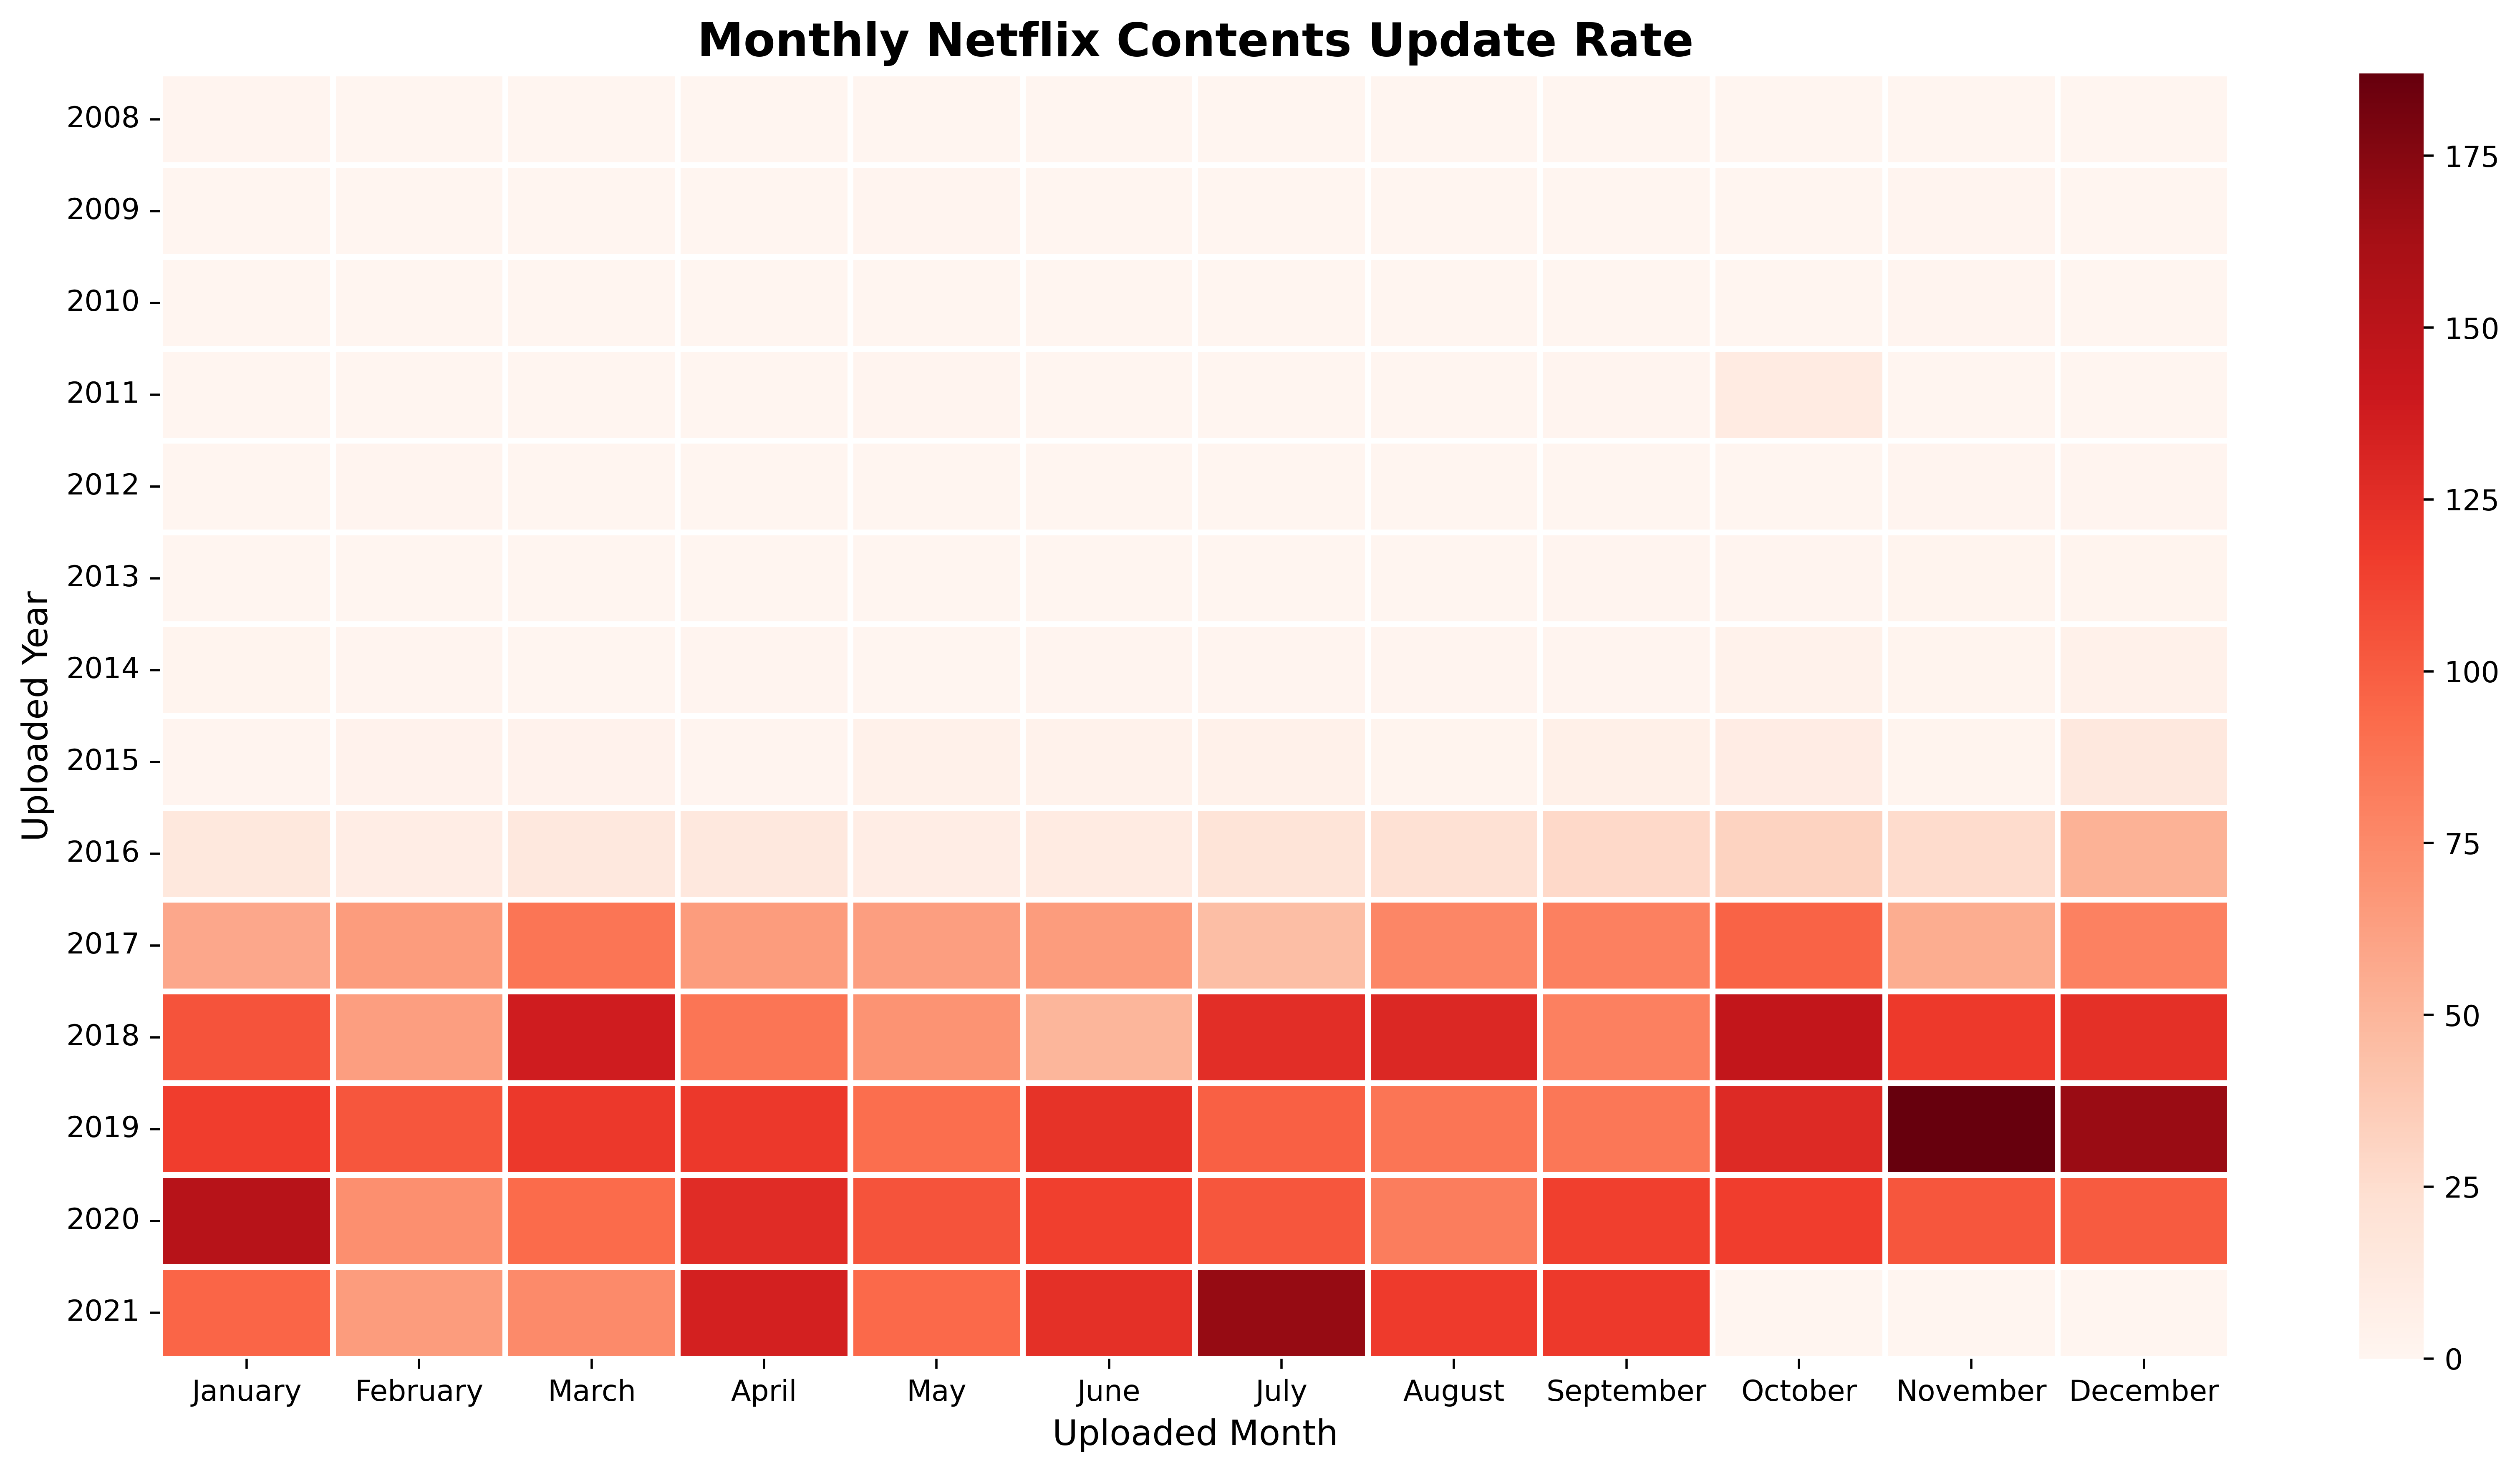

In [344]:
plt.figure(figsize=(16,8) , dpi=500)
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(dt, cmap='Reds', edgecolors='beige', linewidths=2)
plt.title('Monthly Netflix Contents Update Rate',
          fontsize=16, fontfamily='calibri', fontweight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.xlabel('Uploaded Month',fontsize=12)
plt.ylabel('Uploaded Year',fontsize=12)
plt.show()

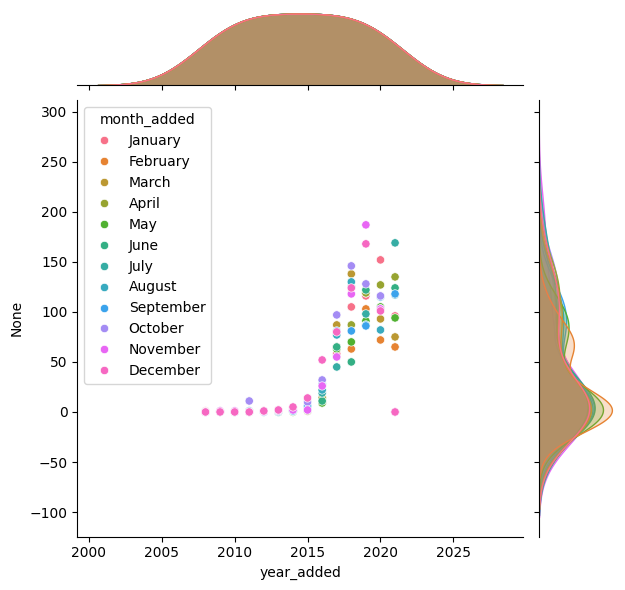

In [346]:
sns.jointplot(dt)
plt.show()

Insights :

The contents are uploaded to the Netflix library as soon the contents rights are acquired in case of movies and for telecasted tvShows or episodes are uploaded within 24 hrs after airing on Television.
It is seen the as the year are progressing the contents varities and uploading rates are too high.

In [347]:
lm_pivot.corr()

weekday      Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
weekday                                                                  
Monday     1.000000  0.525132   0.003530 -0.426081 -0.299351  0.110339   
Tuesday    0.525132  1.000000  -0.355814 -0.532610 -0.231738  0.374016   
Wednesday  0.003530 -0.355814   1.000000 -0.179123  0.031484 -0.175518   
Thursday  -0.426081 -0.532610  -0.179123  1.000000  0.297752 -0.234899   
Friday    -0.299351 -0.231738   0.031484  0.297752  1.000000 -0.492094   
Saturday   0.110339  0.374016  -0.175518 -0.234899 -0.492094  1.000000   
Sunday     0.402699  0.418238  -0.353864  0.057401 -0.189647  0.251742   

weekday      Sunday  
weekday              
Monday     0.402699  
Tuesday    0.418238  
Wednesday -0.353864  
Thursday   0.057401  
Friday    -0.189647  
Saturday   0.251742  
Sunday     1.000000

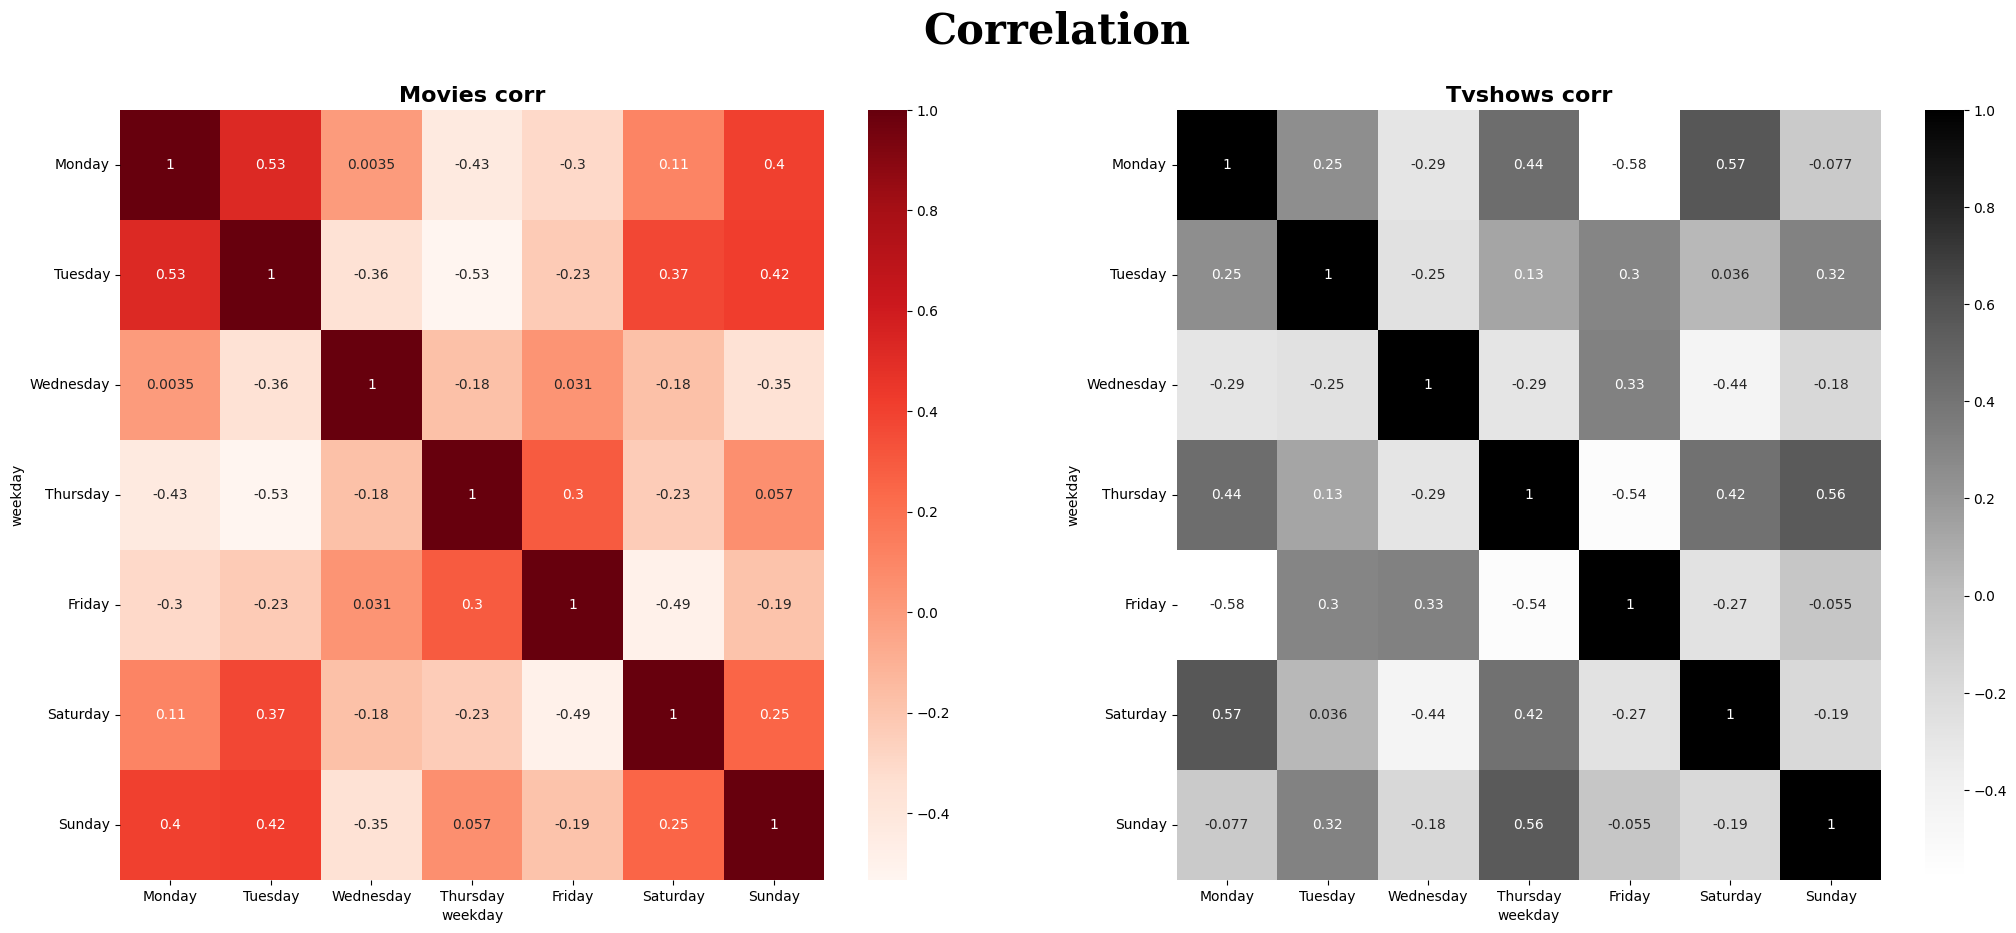

In [348]:
plt.figure(figsize=(25,10))
plt.suptitle('Correlation',fontsize=30,fontfamily='serif',fontweight='bold')

plt.subplot(1,2,1)
sns.heatmap(lm_pivot.corr() ,cmap='Reds',annot=True)
plt.title('Movies corr',fontsize=16,fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.subplot(1,2,2)
sns.heatmap(lt_pivot.corr() ,cmap='Greys',annot=True)
plt.title('Tvshows corr',fontsize=16,fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

Insights:


The correlation are found to nominal and on an average it is found that data has a least Positive Correlation based on the coefficients of Movies and More likely Positively correlated on the TVShow data.
🤔🔖💡Recommendations for Netflix Business Growth:💡🔖🤔

Invest in more original content: Netflix has been very successful with its original content. The company should continue to invest in original content that is both high-quality and appealing to a wide Global audience collaborating with the famous actors,directors to have a successful growth both contentwise and financially.

Expand into new markets: Netflix is already available in over 190 countries, but there are still many markets where the company could expand. The company should focus on expanding into markets where there is a large population of potential subscribers and where there is less competition from other streaming services. Prioritizing the contents rating would attract more subscribers.

Offer a lower-priced ad-supported tier: Netflix could offer a lower-priced ad-supported tier to attract more subscribers. This would allow the company to reach a wider audience and Generate more revenue. These strategic decisions of release date and time would make the viewers count increase rapidly. Having the ANIME contents have shown as an interest for many views.

Personalize the user experience: Netflix could do more to personalize the user experience. This could include recommending content based on a user's viewing history, offering different pricing plans based on a user's needs, and providing more localized content on the similar genre's.

Improve the user interface: Netflix's user interface is generally good, but it could be improved. The company could make it easier to find content, especially when the content that is not as popular. The company could also make it easier to switch between different devices.

Partner with other companies: Netflix could partner with other companies to offer exclusive content or to promote their services say starting their own production house to produce more contents based on likliness of the wide range of audiences and could expand into new genres of content, such as anime, documentaries, or stand-up comedy. This would help the company attract a wider audience.

Invest in technology: Netflix could invest in new technologies, such as virtual reality or augmented reality. This would allow the company to offer new and immersive experiences to their subscribers.

Content Management: Timely release of the contents ensure credibility and earns a good trust among the subscribers. The strategic Decisions of the release weekday , month matters and should be aligned with the viewers expectations.

Netflix is a successful company, but there is always room for improvement.

By following these recommendations & suggestions , NETFLIX can continue to Grow and attract new subscribers & Stratergize in a more effiecient way to stay ahead of its competition........

Netflix's growth has not been without its challenges. In recent years, the company has faced increased competition from other streaming services, such as Disney+, HBO Max, and Amazon Prime Video. This has led to some declines in subscriber growth.

However, Netflix remains one of the *Most Popular Streaming services in the world. The company is well-positioned for future growth, as it continues to invest in original content and expand into new markets.